# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,cohen_kappa_score,confusion_matrix,roc_curve,accuracy_score,roc_auc_score,f1_score,log_loss
from sklearn import tree
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
plt.rcParams['figure.figsize']=[20,10]
plt.rcParams['figure.dpi']=100
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import chi2_contingency, shapiro, mannwhitneyu
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
#!pip install xgboost
from xgboost import XGBClassifier 

## **Reading Dataset and displaying first 5 records**
The Dataset is read and first 5 rows of the dataset is shown so as to understand the dataframe

In [ ]:
df=pd.read_csv('kotak_app_bank_perf_merged_accepted_rejected.csv')
df.head()  #Eye-balling first five rows of DataFrame

,Location_Name,Reference_Number,Company_Category,Residence_Type,Negative_Area,Net_Take_Home,Loan_Applied_Amount,Loan_Applied_tenure,Sanction_Amount,Sanction_Tenure,Disbursement_Amount,Disbursement_Date_x,Bank_Name,Residence_City,System_Approved_Amount,Is_Online_Lead,cust_loan_type,APP_REFCODE,BALANCE_5TH_DAY_MONTH_1,EOM_MONTH_2,BALANCE_10TH_DAY_MONTH_2,BALANCE_20TH_DAY_MONTH_2,EOM_MONTH_3,BALANCE_5TH_DAY_MONTH_2,BALANCE_25TH_DAY_MONTH_2,AVG_MONTH_BAL_1,BALANCE_20TH_DAY_MONTH_3,BALANCE_10TH_DAY_MONTH_1,BALANCE_20TH_DAY_MONTH_1,BALANCE_15TH_DAY_MONTH_2,BALANCE_15TH_DAY_MONTH_1,BALANCE_15TH_DAY_MONTH_3,BALANCE_10TH_DAY_MONTH_3,AVG_MONTH_BAL_3,ACCOUNT_NUM,BANK_NAME,BALANCE_25TH_DAY_MONTH_1,BALANCE_25TH_DAY_MONTH_3,EOM_MONTH_1,BALANCE_5TH_DAY_MONTH_3,AVG_MONTH_BAL_2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Disbursement_Date_y
0,Bangalore,#PLZ9V9GNMR,B,Rented with Family,N,INR 32691,400000.0,5,300000,5,305999,17-APR-17,ICICI Bank,Bangalore,400000,No,accepted,#PLZ9V9GNMR,30917.0,33682.0,377.0,377.0,150.0,8242.0,377.0,9506.166667,405.0,18000.0,2280.0,377.0,5280.0,186.0,9412.0,4456.666667,1.0,1.0,280.0,2905.0,280.0,13682.0,7238.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17-04-2017
1,Hyderabad,#PLZ9UERDAS,B,Rented with Family,N,INR 21259,400000.0,5,380000,3,382400,27-MAR-17,Kotak Mahindra Bank Ltd.,Rangareddy,382662,No,accepted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27-03-2017
2,Delhi,#PLZ9U5SN4A,A,Self Owned,N,INR 117782,100000.0,4,100000,4,100000,29-May-17,Kotak Mahindra Bank Ltd.,Ghaziabad,100000,No,accepted,#PLZ9U5SN4A,775774.0,722635.0,738499.0,748536.0,555902.0,704120.0,740401.0,754977.333333,401800.0,764555.0,756034.0,761775.0,762908.0,484559.0,482804.0,476611.500000,1.0,1.0,755239.0,451800.0,715354.0,482804.0,735994.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-05-2017
3,Mumbai,#PLZ9SL4V4K,-,Rented with Friends,N,INR 23000,300000.0,5,115000,5,111342,25-Sep-17,Indian Overseas Bank,Mumbai,299000,No,accepted,#PLZ9SL4V4K,1.0,48.0,102.0,4998.0,360.0,152.0,48.0,7396.500000,4400.0,100.0,20282.0,5.0,23492.0,28.0,28.0,874.000000,1.0,1.0,282.0,400.0,222.0,28.0,892.166667,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25-09-2017
4,Mumbai,#PLZ9RH6ZWD,A,Self Owned,N,INR 39000,250000.0,5,250000,2,250000,19-AUG-16,Kotak Mahindra Bank Ltd.,Mumbai,250000,Ye,accepted,#PLZ9RH6ZWD,32313.0,129.0,39637.0,231.0,1005.0,49637.0,231.0,6938.000000,3882.0,5807.0,48.0,231.0,1468.0,9137.0,23137.0,12063.333333,1.0,1.0,1021.0,1882.0,971.0,33337.0,15016.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19-08-2016


# **Making the copy of Dataset**

Making a copy of the original dataset so as to kee the original dataset intact and working on the duplicated dataset.

In [ ]:
df1=df.copy()

# **Dataset Description and Modification**
Description of the dataset is done using different in-built methods of pandas and necessary modifications are done.

## **Shape**
Shape of the dataframe is found out using the shape method of the pandas.

In [ ]:
df1.shape

(96540, 66)

## **Information**
Information about the dataframe such as the null values, total enteries, datatype etc. are found out by the function.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96540 entries, 0 to 96539
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Location_Name             96540 non-null  object 
 1   Reference_Number          96540 non-null  object 
 2   Company_Category          96540 non-null  object 
 3   Residence_Type            96540 non-null  object 
 4   Negative_Area             96540 non-null  object 
 5   Net_Take_Home             96540 non-null  object 
 6   Loan_Applied_Amount       96540 non-null  float64
 7   Loan_Applied_tenure       96540 non-null  int64  
 8   Sanction_Amount           96540 non-null  object 
 9   Sanction_Tenure           96540 non-null  object 
 10  Disbursement_Amount       96540 non-null  object 
 11  Disbursement_Date_x       96540 non-null  object 
 12  Bank_Name                 96540 non-null  object 
 13  Residence_City            91299 non-null  object 
 14  System

## **Five point summary/ summary stats of dataset**
**The Five Point Statistical summary gives descriptive statistics of the dataset**

In [ ]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Loan_Applied_Amount,96540.0,618514.109872,4.741105e+05,3.000000e+04,300000.000000,500000.000000,800000.000000,9.687280e+06
Loan_Applied_tenure,96540.0,4.823224,5.965293e-01,1.000000e+00,5.000000,5.000000,5.000000,5.000000e+00
BALANCE_5TH_DAY_MONTH_1,76884.0,49431.752668,6.785879e+05,-9.922370e+05,5588.750000,23221.500000,48441.000000,1.833530e+08
EOM_MONTH_2,79427.0,26252.719390,1.158717e+05,-9.999990e+05,321.000000,2945.000000,17716.500000,1.091696e+07
BALANCE_10TH_DAY_MONTH_2,80513.0,86510.837106,1.408696e+07,-9.836250e+05,3217.000000,13750.000000,34873.000000,3.997062e+09
BALANCE_20TH_DAY_MONTH_2,80043.0,27938.321681,1.311335e+05,-9.954910e+05,799.000000,5092.000000,20371.000000,1.874249e+07
EOM_MONTH_3,78443.0,25469.385416,2.165349e+05,-9.966130e+05,305.000000,2686.000000,16447.000000,5.223017e+07
BALANCE_5TH_DAY_MONTH_2,79810.0,56347.279135,1.543328e+06,-6.487932e+06,6115.000000,23745.500000,49173.500000,3.368833e+08
BALANCE_25TH_DAY_MONTH_2,79640.0,25292.610234,1.082624e+05,-9.957990e+05,463.000000,3524.000000,16776.000000,1.091696e+07
AVG_MONTH_BAL_1,82164.0,42767.915764,2.299944e+06,-9.865780e+05,5108.916667,11610.500000,26540.208333,6.449657e+08


## **Percentage of Null Values**
In this case percentage of null values are found out per columns before treatment as certain column may contain any other values instead of NaN, which may show that there is no null value, but it is incorrect.

In [ ]:
df1.isnull().sum()/len(df1)*100

Location_Name                0.000000
Reference_Number             0.000000
Company_Category             0.000000
Residence_Type               0.000000
Negative_Area                0.000000
Net_Take_Home                0.000000
Loan_Applied_Amount          0.000000
Loan_Applied_tenure          0.000000
Sanction_Amount              0.000000
Sanction_Tenure              0.000000
Disbursement_Amount          0.000000
Disbursement_Date_x          0.000000
Bank_Name                    0.000000
Residence_City               5.428838
System_Approved_Amount       0.000000
Is_Online_Lead               0.000000
cust_loan_type               0.000000
APP_REFCODE                 14.891237
BALANCE_5TH_DAY_MONTH_1     20.360472
EOM_MONTH_2                 17.726331
BALANCE_10TH_DAY_MONTH_2    16.601409
BALANCE_20TH_DAY_MONTH_2    17.088254
EOM_MONTH_3                 18.745598
BALANCE_5TH_DAY_MONTH_2     17.329604
BALANCE_25TH_DAY_MONTH_2    17.505697
AVG_MONTH_BAL_1             14.891237
BALANCE_20TH

## **Columns**
This method potrays out all the columns present in the dataframe.

In [ ]:
df1.columns

Index(['Location_Name', 'Reference_Number', 'Company_Category',
       'Residence_Type', 'Negative_Area', 'Net_Take_Home',
       'Loan_Applied_Amount', 'Loan_Applied_tenure', 'Sanction_Amount',
       'Sanction_Tenure', 'Disbursement_Amount', 'Disbursement_Date_x',
       'Bank_Name', 'Residence_City', 'System_Approved_Amount',
       'Is_Online_Lead', 'cust_loan_type', 'APP_REFCODE',
       'BALANCE_5TH_DAY_MONTH_1', 'EOM_MONTH_2', 'BALANCE_10TH_DAY_MONTH_2',
       'BALANCE_20TH_DAY_MONTH_2', 'EOM_MONTH_3', 'BALANCE_5TH_DAY_MONTH_2',
       'BALANCE_25TH_DAY_MONTH_2', 'AVG_MONTH_BAL_1',
       'BALANCE_20TH_DAY_MONTH_3', 'BALANCE_10TH_DAY_MONTH_1',
       'BALANCE_20TH_DAY_MONTH_1', 'BALANCE_15TH_DAY_MONTH_2',
       'BALANCE_15TH_DAY_MONTH_1', 'BALANCE_15TH_DAY_MONTH_3',
       'BALANCE_10TH_DAY_MONTH_3', 'AVG_MONTH_BAL_3', 'ACCOUNT_NUM',
       'BANK_NAME', 'BALANCE_25TH_DAY_MONTH_1', 'BALANCE_25TH_DAY_MONTH_3',
       'EOM_MONTH_1', 'BALANCE_5TH_DAY_MONTH_3', 'AVG_MONTH_BAL_2', '

# **Dropping columns** 
**1. From index 41 to 64 as those are not relevant one and cannot be used further for analysis**

**2. balance_ columns, APP_REFCODE, Disbursement_Date_x, Sanction_Amount,Reference_Number, ACCOUNT_NUM, BANK_NAME, Disbursement_Date_x  as those are not relevant for further analysis**

In [ ]:
df1.drop(df.iloc[:,41:65],axis=1, inplace= True) 
df1.drop(columns=['BALANCE_5TH_DAY_MONTH_1','BALANCE_10TH_DAY_MONTH_2', 'BALANCE_20TH_DAY_MONTH_2', 'BALANCE_5TH_DAY_MONTH_2', 'BALANCE_25TH_DAY_MONTH_2','BALANCE_20TH_DAY_MONTH_3','BALANCE_10TH_DAY_MONTH_1', 'BALANCE_20TH_DAY_MONTH_1',
                  'BALANCE_15TH_DAY_MONTH_2', 'BALANCE_15TH_DAY_MONTH_1','BALANCE_15TH_DAY_MONTH_3', 'BALANCE_10TH_DAY_MONTH_3','BALANCE_25TH_DAY_MONTH_1', 'BALANCE_25TH_DAY_MONTH_3','BALANCE_5TH_DAY_MONTH_3','APP_REFCODE','Disbursement_Date_x','Sanction_Amount','Reference_Number','ACCOUNT_NUM','BANK_NAME'],axis=1,inplace=True)

# **Data preprocessing**
In given dataset, there are many erroneous data values for features which basically denotes absence of values. for example -, #, etc. In Data preprocessing we are rectifying our dataset and getting rid of erroneous data values.

**1. Replacing all hyphens with NAN values**

**2. Removing the INR from the "Net_Take_Home" for the non-null values.**

**3. Converting the datatype to float** 

**4. Converting the "Disbursement_Date_y" to datetime format for the not null values.**

**5. The data-types of the columns after changing**

**6. Data Cleaning in df1 for some other columns Replacing mispelled data valuewith corrected values.**

In [ ]:
df1.replace(to_replace = '-',value=np.nan,inplace= True)
df1['Net_Take_Home'] = df1[df1['Net_Take_Home'].notnull()]['Net_Take_Home'].apply(lambda x: x.split(' ')[1])
df1['Net_Take_Home'] = df1['Net_Take_Home'].astype('float64')
df1[['Sanction_Tenure','Disbursement_Amount','System_Approved_Amount']] = df1[['Sanction_Tenure','Disbursement_Amount','System_Approved_Amount']].astype('float64')
df1['Disbursement_Date_y'] = pd.to_datetime(df1[df1['Disbursement_Date_y'].notnull()]['Disbursement_Date_y'])
df1.dtypes
Loc_name={'Ahmeda' : 'Ahmedabad', 'Bangal': 'Bangalore', 'Hydera':'Hyderabad','Chenna':'Chennai','Chandi':'Chandigarh'} #Correction-dictionary for 'Location_Name'.
cust_loan={'accepted' : 'approved','unknown':'rejected'} #Correction-dictionary for 'cust_loan_type'.

df1['cust_loan_type'].replace(to_replace=cust_loan,inplace = True)

df1['Is_Online_Lead'].replace(to_replace='Ye',value= 'Yes',inplace = True)

df1['Location_Name'].replace(to_replace=Loc_name,inplace = True) 
df1.head()

,Location_Name,Company_Category,Residence_Type,Negative_Area,Net_Take_Home,Loan_Applied_Amount,Loan_Applied_tenure,Sanction_Tenure,Disbursement_Amount,Bank_Name,Residence_City,System_Approved_Amount,Is_Online_Lead,cust_loan_type,EOM_MONTH_2,EOM_MONTH_3,AVG_MONTH_BAL_1,AVG_MONTH_BAL_3,EOM_MONTH_1,AVG_MONTH_BAL_2,Disbursement_Date_y
0,Bangalore,B,Rented with Family,N,32691.0,400000.0,5,5.0,305999.0,ICICI Bank,Bangalore,400000.0,No,approved,33682.0,150.0,9506.166667,4456.666667,280.0,7238.666667,2017-04-17
1,Hyderabad,B,Rented with Family,N,21259.0,400000.0,5,3.0,382400.0,Kotak Mahindra Bank Ltd.,Rangareddy,382662.0,No,approved,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-27
2,Delhi,A,Self Owned,N,117782.0,100000.0,4,4.0,100000.0,Kotak Mahindra Bank Ltd.,Ghaziabad,100000.0,No,approved,722635.0,555902.0,754977.333333,476611.500000,715354.0,735994.333333,2017-05-29
3,Mumbai,NaN,Rented with Friends,N,23000.0,300000.0,5,5.0,111342.0,Indian Overseas Bank,Mumbai,299000.0,No,approved,48.0,360.0,7396.500000,874.000000,222.0,892.166667,2017-09-25
4,Mumbai,A,Self Owned,N,39000.0,250000.0,5,2.0,250000.0,Kotak Mahindra Bank Ltd.,Mumbai,250000.0,Yes,approved,129.0,1005.0,6938.000000,12063.333333,971.0,15016.000000,2016-08-19


# **Nan Treatment**

**1. Calculating percentage of null-values in each column**

In [ ]:
df1.isnull().sum()/len(df1) * 100 

Location_Name              0.005179
Company_Category          31.666667
Residence_Type             0.006215
Negative_Area              0.000000
Net_Take_Home              0.003108
Loan_Applied_Amount        0.000000
Loan_Applied_tenure        0.000000
Sanction_Tenure           31.136317
Disbursement_Amount       31.295836
Bank_Name                  0.003108
Residence_City             5.428838
System_Approved_Amount     5.601823
Is_Online_Lead             0.000000
cust_loan_type             0.000000
EOM_MONTH_2               17.726331
EOM_MONTH_3               18.745598
AVG_MONTH_BAL_1           14.891237
AVG_MONTH_BAL_3           14.891237
EOM_MONTH_1               18.453491
AVG_MONTH_BAL_2           14.891237
Disbursement_Date_y        1.280298
dtype: float64

**2. Nan Treatment of "Net_Take_Home"**

In [ ]:
df1['Net_Take_Home'].describe()

count     96537.000000
mean      50617.863482
std       38054.697333
min           1.000000
25%       29760.000000
50%       40968.000000
75%       58837.000000
max      937267.000000
Name: Net_Take_Home, dtype: float64

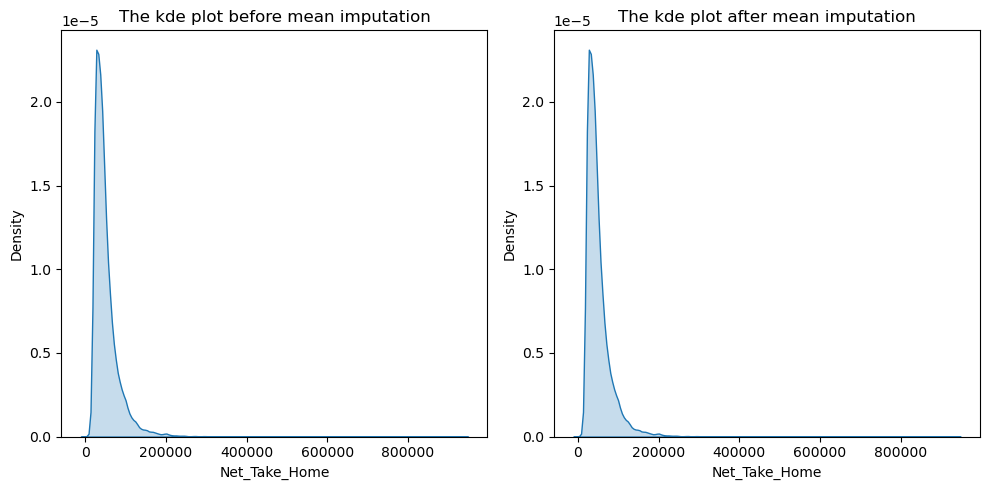

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(10,5))

sns.kdeplot(x=df1['Net_Take_Home'],shade=True,ax=axes[0])
axes[0].set_title('The kde plot before mean imputation')
axes[0].set_xlabel('Net_Take_Home')

df1['Net_Take_Home'] = df1['Net_Take_Home'].fillna(df1['Net_Take_Home'].mean()) #mean imputation

sns.kdeplot(data=df1,x='Net_Take_Home',shade=True,ax=axes[1])
axes[1].set_title('The kde plot after mean imputation')
axes[1].set_xlabel('Net_Take_Home')

plt.tight_layout()

#plt.savefig("Net_Take_Home.png")

plt.show()

**2. Nan Treatment of "Residence_Type"**

In [ ]:
df1['Residence_Type'].value_counts()

Rented with Family                        41377
Parental                                  21966
Self Owned                                19062
Rented with Friends                       12452
Rented - Bachelor Staying alone             968
Company Provided - Staying with family      528
Company Provided - Staying Alone            127
Paying Guest                                 38
Hostel/Guest House/Hotel                     16
Name: Residence_Type, dtype: int64

In [ ]:
df1['Residence_Type'] = df1['Residence_Type'].fillna(df1['Residence_Type'].mode()[0])

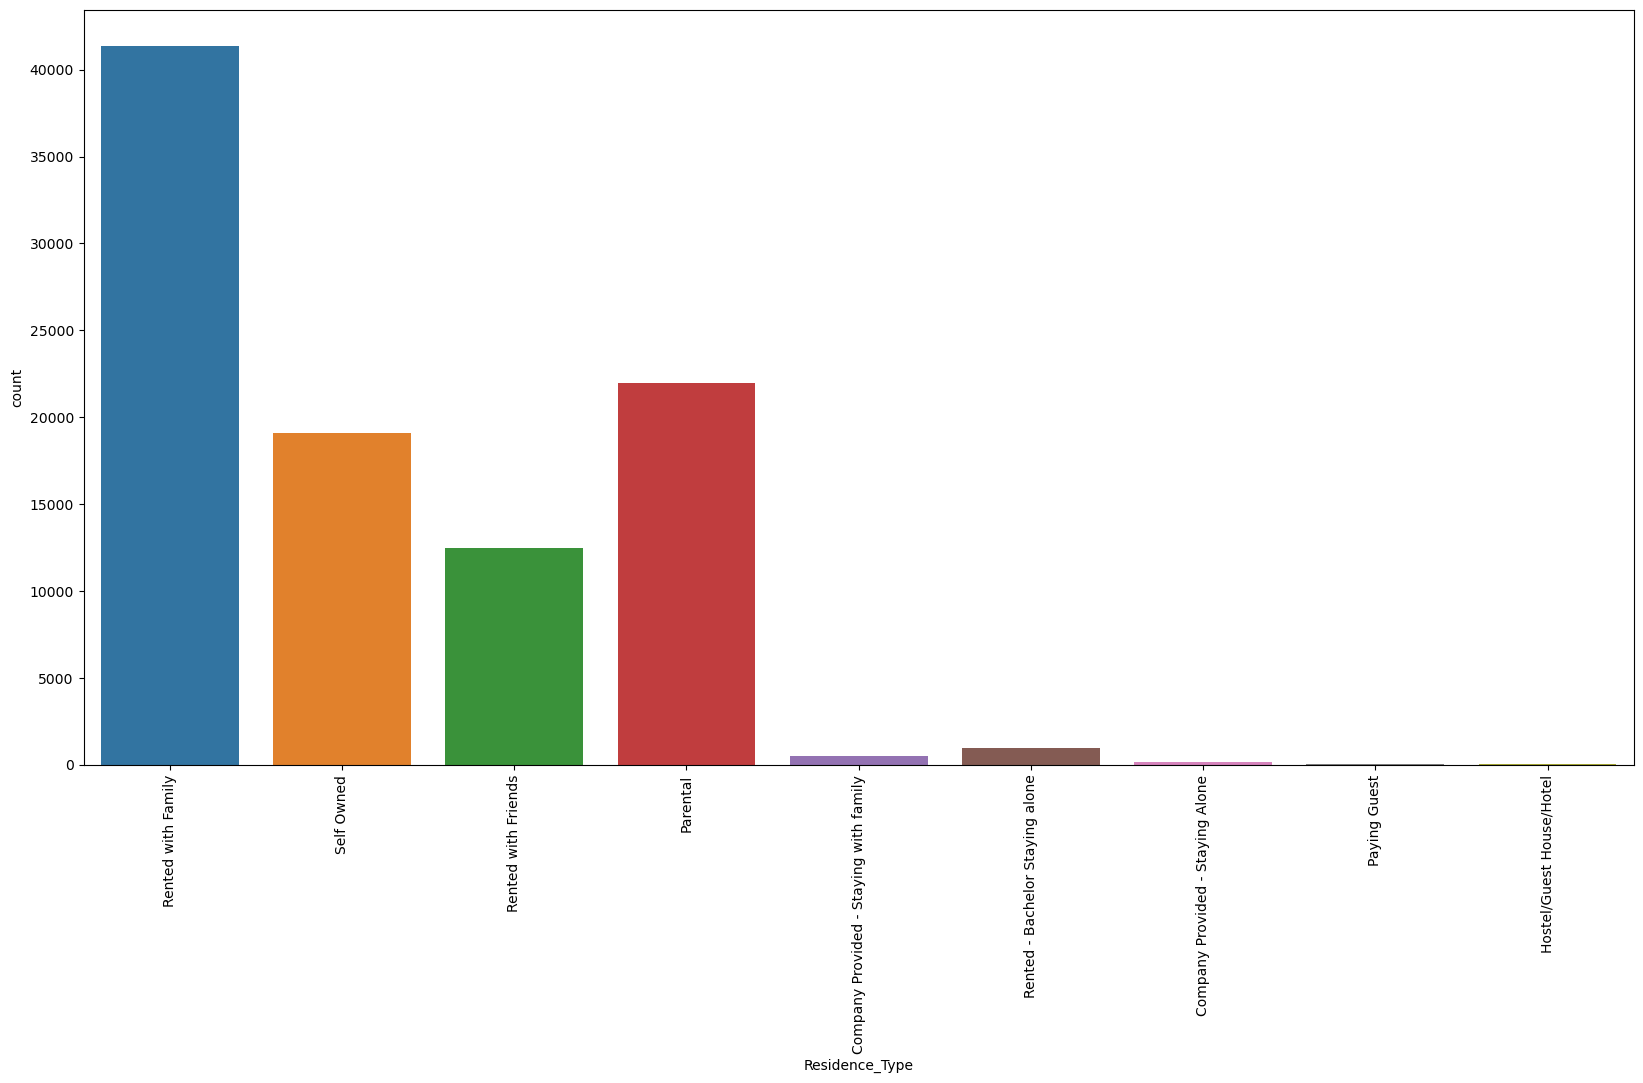

In [ ]:
sns.countplot(df1['Residence_Type'])
plt.xticks(rotation=90)
#plt.savefig("Residence_Type.png")
plt.show()

**3. Nan Treatment of "System_Approved_Amount"**

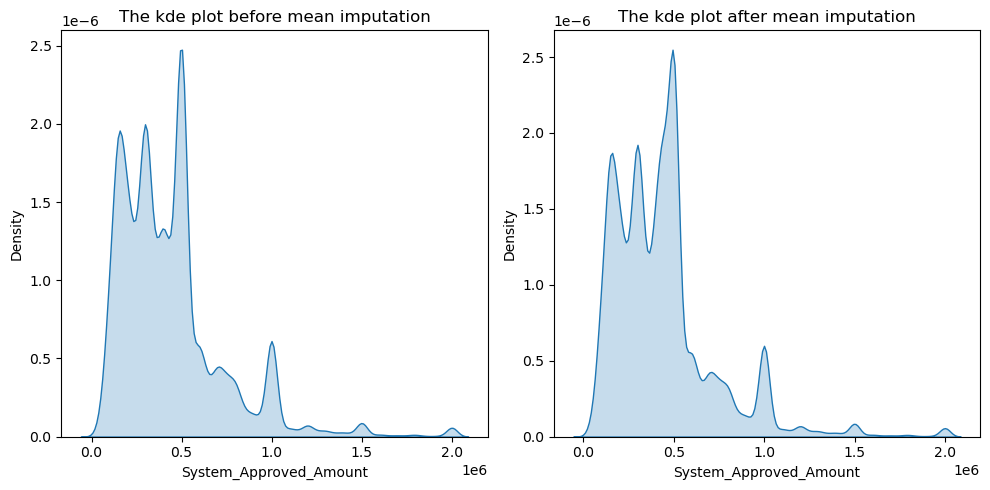

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(10,5))

sns.kdeplot(x=df1['System_Approved_Amount'],shade=True,ax=axes[0])
axes[0].set_title('The kde plot before mean imputation')
axes[0].set_xlabel('System_Approved_Amount')

df1['System_Approved_Amount'] = df1['System_Approved_Amount'].fillna(df1['System_Approved_Amount'].mean()) #mean imputation

sns.kdeplot(data=df1,x='System_Approved_Amount',shade=True,ax=axes[1])
axes[1].set_title('The kde plot after mean imputation')
axes[1].set_xlabel('System_Approved_Amount')

plt.tight_layout()

#plt.savefig("System_Approved_Amount.png")

plt.show()

**4. Nan Treatment of "Company_Category"**

In [ ]:
df1['Company_Category'].value_counts()

A    28641
B    24322
D     9690
C     3316
Name: Company_Category, dtype: int64

In [ ]:
df5 = df1[df1['Company_Category'] == 'B'][['Company_Category','Net_Take_Home']]
df6 = df1[df1['Company_Category'] == 'A'][['Company_Category','Net_Take_Home']]
ind1 = df1[df1['Company_Category'].isnull()].index
ind1

for i  in ind1:
    if (df1.loc[i,'Net_Take_Home'] <= df6['Net_Take_Home'].max()):
        df1.loc[i,'Company_Category'] ='A'  
    else: 
        df1.loc[i,'Company_Category'] ='B'

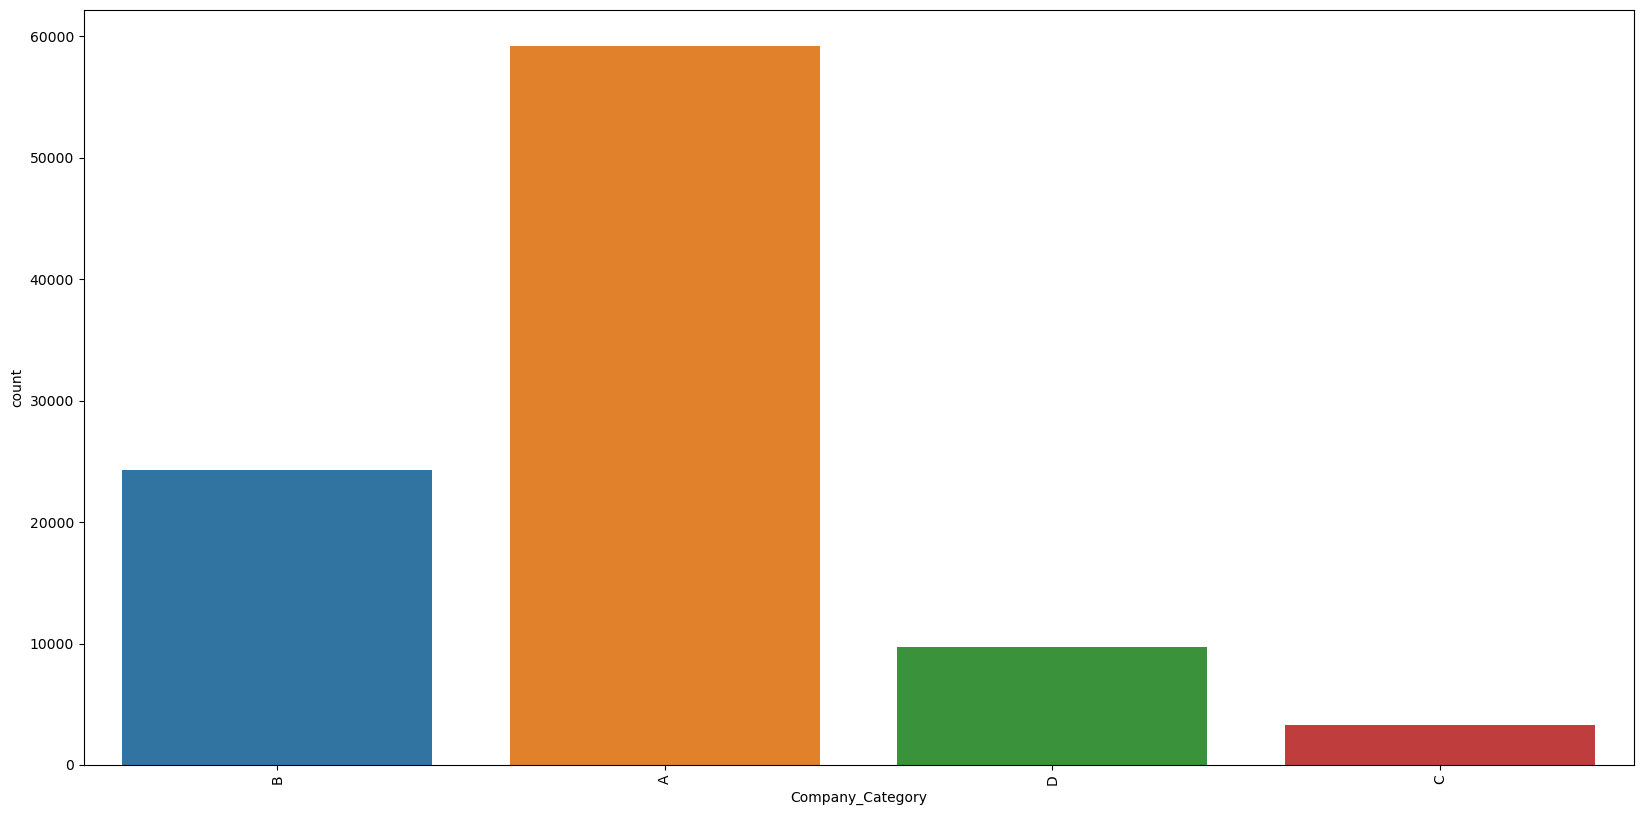

In [ ]:
sns.countplot(df1['Company_Category'])
plt.xticks(rotation=90)
#plt.savefig("Company_Category.png")
plt.show()

**5. Nan Treatment of 'Residence_City'**

In [ ]:
df1['Residence_City'].value_counts()

Bangalore            16141
New Delhi            10884
Chennai              10509
Pune                  9314
Mumbai                8093
Hyderabad             5822
Thane                 5801
Rangareddy            4096
Ahmedabad             3041
Gurgaon               2818
Navi mumbai           2373
Jaipur                2277
Ghaziabad             2021
Kolkata               1883
Noida                 1760
Faridabad             1136
Cochin                 535
Chandigarh             352
Vadodara               352
Medak                  297
Mohali                 247
Howrah                 213
Gandhinagar            199
Hooghly                181
Panchkula              135
Zirakpur               110
Mahesana                78
North 24 Parganas       78
Derabassi               62
Greater Noida           46
Himmatnagar             41
Greater Noi             39
Bharuch                 39
Kharar                  38
Kanchipuram             26
South 24 Parganas       26
North 24 Pa             25
A

In [ ]:
df1['Residence_City'] = df1['Residence_City'].fillna(df1['Residence_City'].mode()[0])

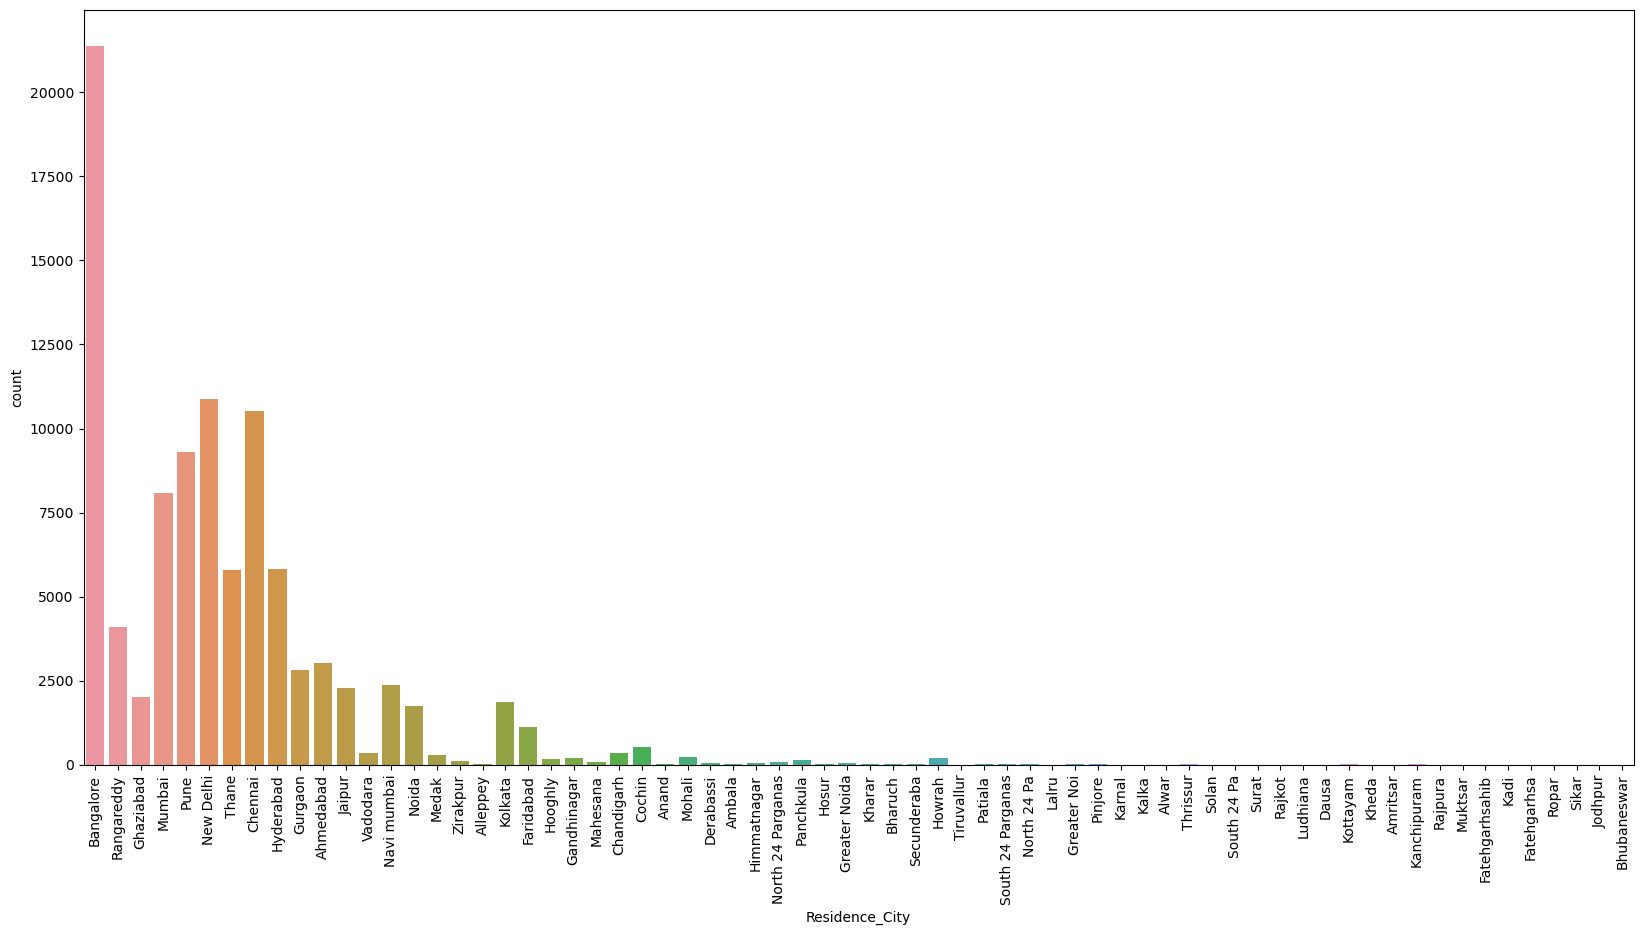

In [ ]:
sns.countplot(df1['Residence_City'])
plt.xticks(rotation=90)
#plt.savefig("Residence_City.png")
plt.show()

**6. Nan Treatment for 'Bank_Name'**

In [ ]:
df1['Bank_Name'].value_counts()

Kotak Mahindra Bank Ltd.          23117
HDFC Bank                         19496
ICICI Bank                        16068
AXIS Bank                          9627
State Bank of India                6542
Citibank N.A.                      4954
Standard Chartered Bank            2290
Other                              1495
IDBI Bank Ltd.                     1444
Yes Bank                           1225
Canara Bank                         773
Punjab National Bank                679
IndusInd Bank Ltd.                  642
Bank of Baroda                      597
Syndicate Bank                      549
Bank of India                       544
Corporation Bank                    534
Union Bank of India                 506
HSBC Bank                           451
Indian Overseas Bank                371
Indian Bank                         361
Oriental Bank of Commerce           335
State Bank of Bikaner ; Jaipur      329
Bank of Maharashtra                 306
Andhra Bank                         296


In [ ]:
df1['Bank_Name'] = df1['Bank_Name'].fillna(df1['Bank_Name'].mode()[0])

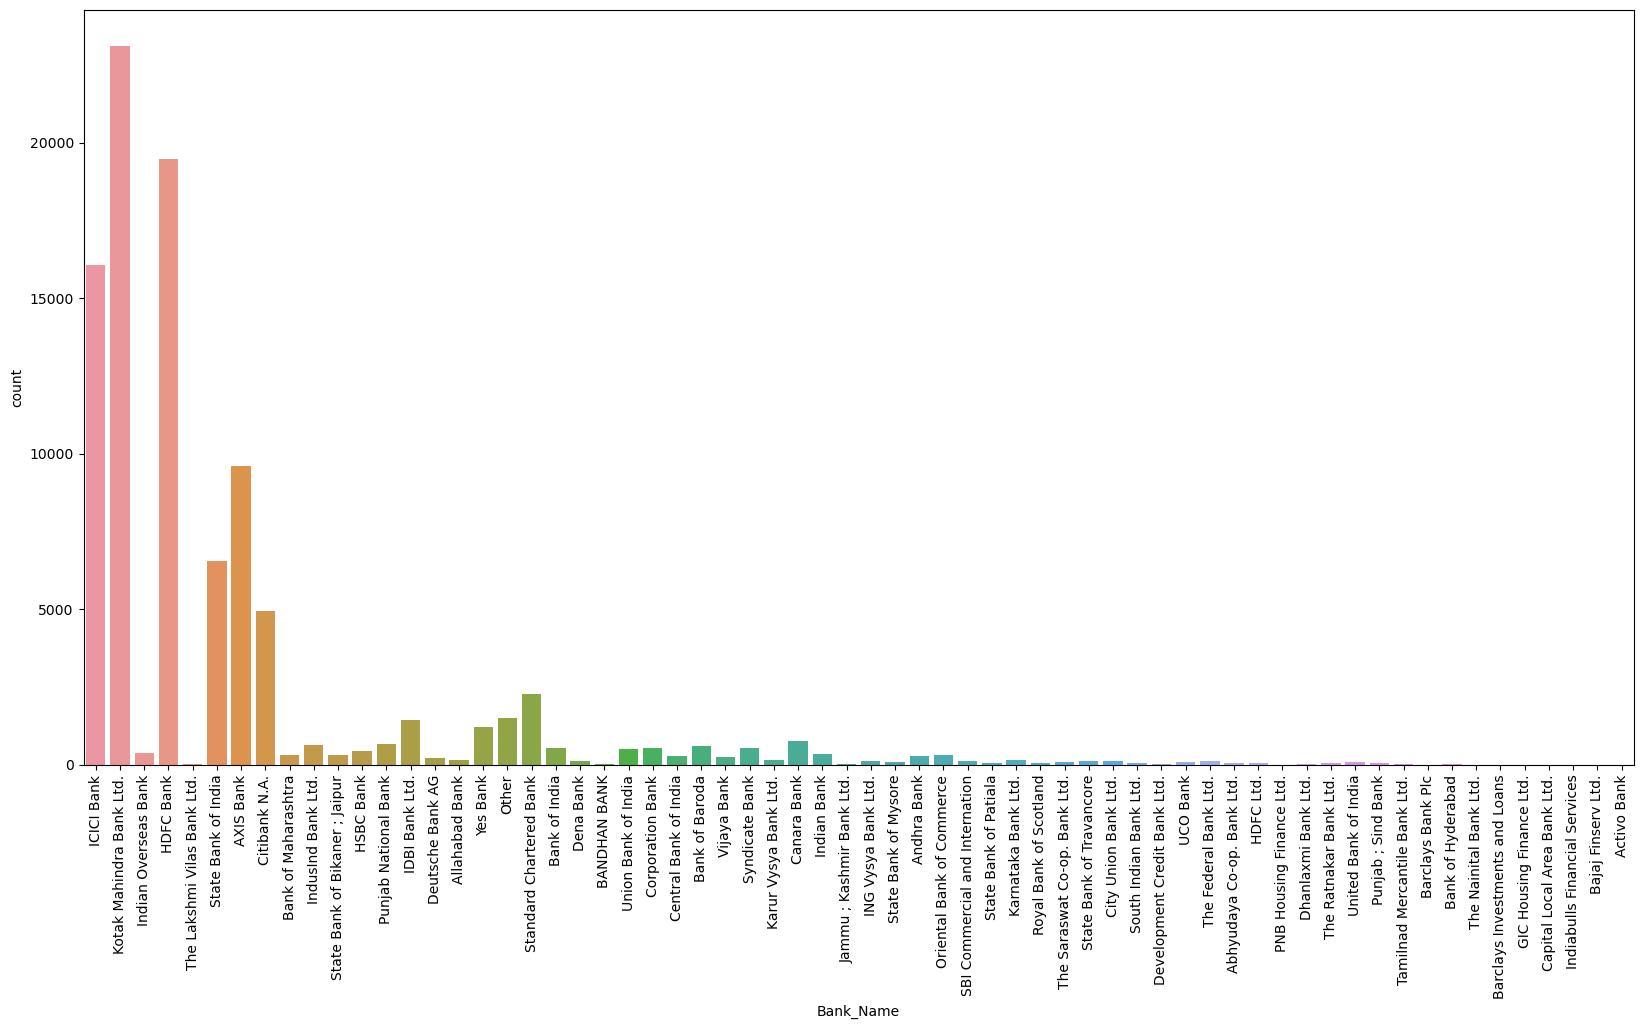

In [ ]:
sns.countplot(df1['Bank_Name'])
plt.xticks(rotation=90)
#plt.savefig("Bank_Name.png")
plt.show()

**7. Null value imputation of Location Name with mode value**

In [ ]:
df1['Location_Name'].value_counts()

Delhi         19121
Bangalore     17284
Mumbai        17152
Chennai       11153
Hyderabad     10677
Pune           9912
Ahmedabad      3581
Jaipur         2432
Calcutta       1286
Calcut         1244
Chandigarh     1067
GURGAON         622
Cochin          582
Baroda          395
THANE            27
Name: Location_Name, dtype: int64

In [ ]:
df1['Location_Name'] = df1['Location_Name'].fillna(df1['Location_Name'].mode()[0])

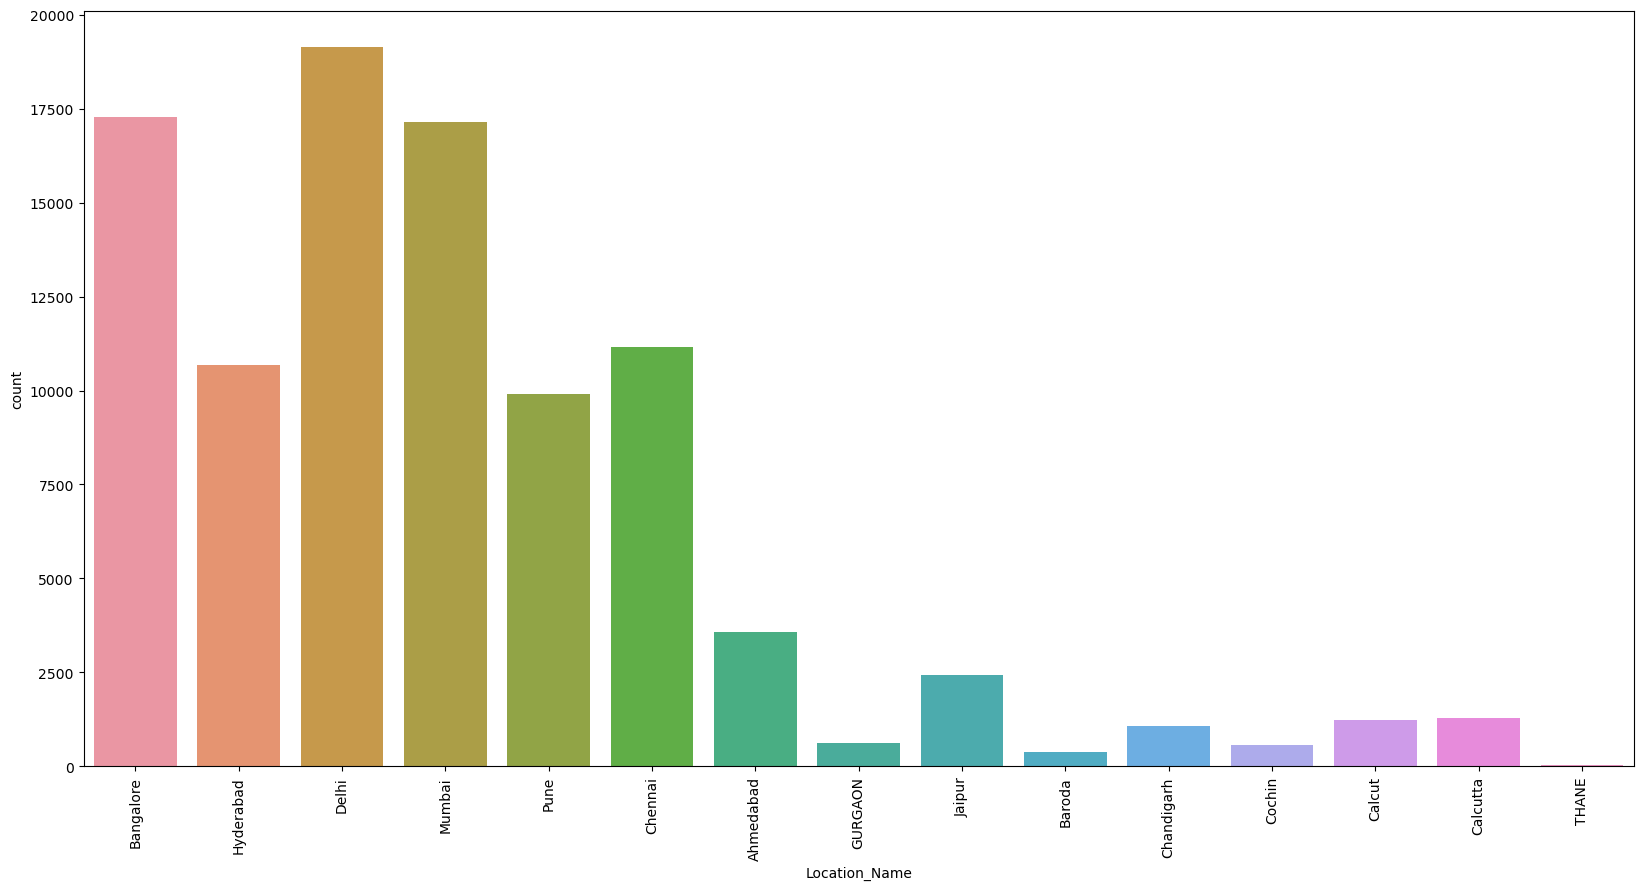

In [ ]:
sns.countplot(df1['Location_Name'])
plt.xticks(rotation=90)
#plt.savefig("Location_Name.png")
plt.show()

**8. Nan Treatment of "Disbursement_Date_y"**

In [ ]:
df1['Disbursement_Date_y'] = df1['Disbursement_Date_y'].fillna(df1['Disbursement_Date_y'].mode()[0])
df1.head()

,Location_Name,Company_Category,Residence_Type,Negative_Area,Net_Take_Home,Loan_Applied_Amount,Loan_Applied_tenure,Sanction_Tenure,Disbursement_Amount,Bank_Name,Residence_City,System_Approved_Amount,Is_Online_Lead,cust_loan_type,EOM_MONTH_2,EOM_MONTH_3,AVG_MONTH_BAL_1,AVG_MONTH_BAL_3,EOM_MONTH_1,AVG_MONTH_BAL_2,Disbursement_Date_y
0,Bangalore,B,Rented with Family,N,32691.0,400000.0,5,5.0,305999.0,ICICI Bank,Bangalore,400000.0,No,approved,33682.0,150.0,9506.166667,4456.666667,280.0,7238.666667,2017-04-17
1,Hyderabad,B,Rented with Family,N,21259.0,400000.0,5,3.0,382400.0,Kotak Mahindra Bank Ltd.,Rangareddy,382662.0,No,approved,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-27
2,Delhi,A,Self Owned,N,117782.0,100000.0,4,4.0,100000.0,Kotak Mahindra Bank Ltd.,Ghaziabad,100000.0,No,approved,722635.0,555902.0,754977.333333,476611.500000,715354.0,735994.333333,2017-05-29
3,Mumbai,A,Rented with Friends,N,23000.0,300000.0,5,5.0,111342.0,Indian Overseas Bank,Mumbai,299000.0,No,approved,48.0,360.0,7396.500000,874.000000,222.0,892.166667,2017-09-25
4,Mumbai,A,Self Owned,N,39000.0,250000.0,5,2.0,250000.0,Kotak Mahindra Bank Ltd.,Mumbai,250000.0,Yes,approved,129.0,1005.0,6938.000000,12063.333333,971.0,15016.000000,2016-08-19


**9. Nan Treatment for 'Disbursement_Amount'**

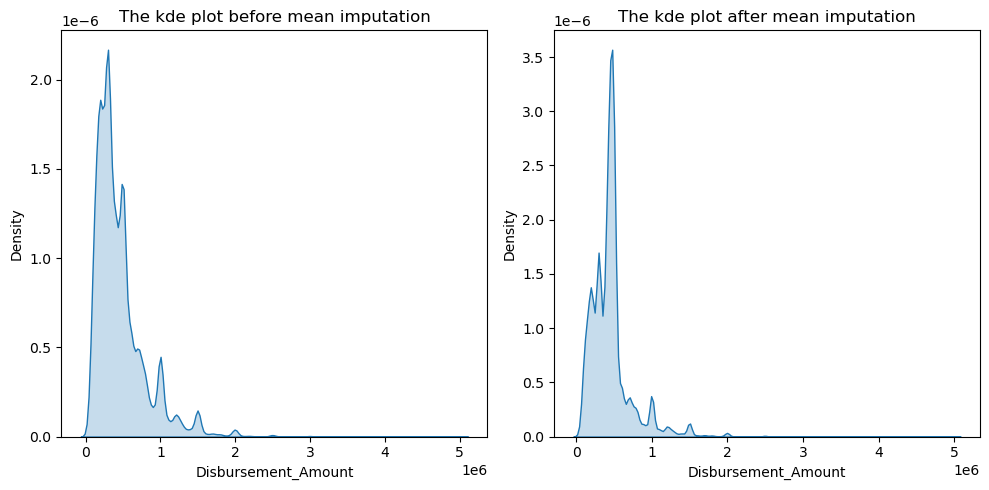

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(10,5))

sns.kdeplot(x=df1['Disbursement_Amount'],shade=True,ax=axes[0])
axes[0].set_title('The kde plot before mean imputation')
axes[0].set_xlabel('Disbursement_Amount')

#mean imputation
df1['Disbursement_Amount'] = df1['Disbursement_Amount'].fillna(df1.groupby('Residence_City')['Disbursement_Amount'].transform('mean'))
df1['Disbursement_Amount'] = df1['Disbursement_Amount'].fillna(df1['Disbursement_Amount'].mean())

sns.kdeplot(data=df1,x='Disbursement_Amount',shade=True,ax=axes[1])
axes[1].set_title('The kde plot after mean imputation')
axes[1].set_xlabel('Disbursement_Amount')

plt.tight_layout()

#plt.savefig("Disbursement_Amount.png")

plt.show()

**10. Nan Treatment for 'Sanction_Tenure'**

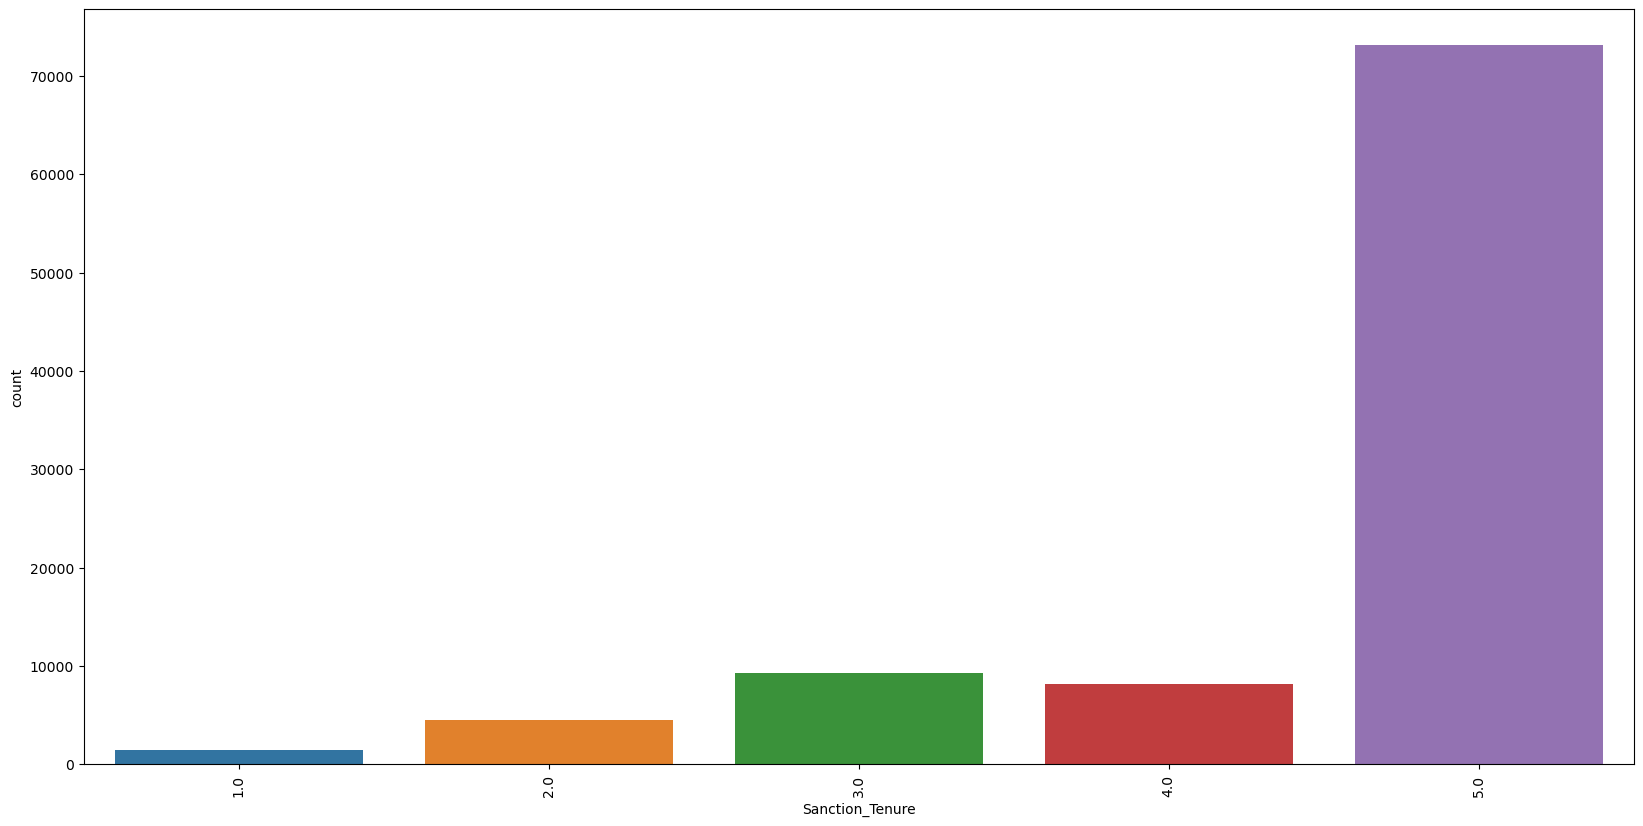

In [ ]:
df1['Sanction_Tenure'] = df1['Sanction_Tenure'].fillna(df1['Loan_Applied_tenure'])

sns.countplot(df1['Sanction_Tenure'])
plt.xticks(rotation=90)
#plt.savefig("Sanction_Tenure.png")
plt.show()

In [ ]:
df1.isnull().sum()

Location_Name                 0
Company_Category              0
Residence_Type                0
Negative_Area                 0
Net_Take_Home                 0
Loan_Applied_Amount           0
Loan_Applied_tenure           0
Sanction_Tenure               0
Disbursement_Amount           0
Bank_Name                     0
Residence_City                0
System_Approved_Amount        0
Is_Online_Lead                0
cust_loan_type                0
EOM_MONTH_2               17113
EOM_MONTH_3               18097
AVG_MONTH_BAL_1           14376
AVG_MONTH_BAL_3           14376
EOM_MONTH_1               17815
AVG_MONTH_BAL_2           14376
Disbursement_Date_y           0
dtype: int64

# Feature Engineering

**1. Engineering 'month_of_date' and 'Quarter' from 'Disbursement_Date_y'**

In [ ]:
def quarter(val1):
    if (val1>=1) and (val1<=3):
        return 1
    elif  (val1>=4) and (val1<=6):
        return 2
    elif  (val1>=7) and (val1<=9):
        return 3  
    else:
        return 4     

df1['month_of_date'] = df1['Disbursement_Date_y'].dt.month
df1['Quarter'] = df1['month_of_date'].apply(quarter)
df1.drop(columns=['Disbursement_Date_y'],inplace=True)
df1.head()

,Location_Name,Company_Category,Residence_Type,Negative_Area,Net_Take_Home,Loan_Applied_Amount,Loan_Applied_tenure,Sanction_Tenure,Disbursement_Amount,Bank_Name,Residence_City,System_Approved_Amount,Is_Online_Lead,cust_loan_type,EOM_MONTH_2,EOM_MONTH_3,AVG_MONTH_BAL_1,AVG_MONTH_BAL_3,EOM_MONTH_1,AVG_MONTH_BAL_2,month_of_date,Quarter
0,Bangalore,B,Rented with Family,N,32691.0,400000.0,5,5.0,305999.0,ICICI Bank,Bangalore,400000.0,No,approved,33682.0,150.0,9506.166667,4456.666667,280.0,7238.666667,4,2
1,Hyderabad,B,Rented with Family,N,21259.0,400000.0,5,3.0,382400.0,Kotak Mahindra Bank Ltd.,Rangareddy,382662.0,No,approved,NaN,NaN,NaN,NaN,NaN,NaN,3,1
2,Delhi,A,Self Owned,N,117782.0,100000.0,4,4.0,100000.0,Kotak Mahindra Bank Ltd.,Ghaziabad,100000.0,No,approved,722635.0,555902.0,754977.333333,476611.500000,715354.0,735994.333333,5,2
3,Mumbai,A,Rented with Friends,N,23000.0,300000.0,5,5.0,111342.0,Indian Overseas Bank,Mumbai,299000.0,No,approved,48.0,360.0,7396.500000,874.000000,222.0,892.166667,9,3
4,Mumbai,A,Self Owned,N,39000.0,250000.0,5,2.0,250000.0,Kotak Mahindra Bank Ltd.,Mumbai,250000.0,Yes,approved,129.0,1005.0,6938.000000,12063.333333,971.0,15016.000000,8,3


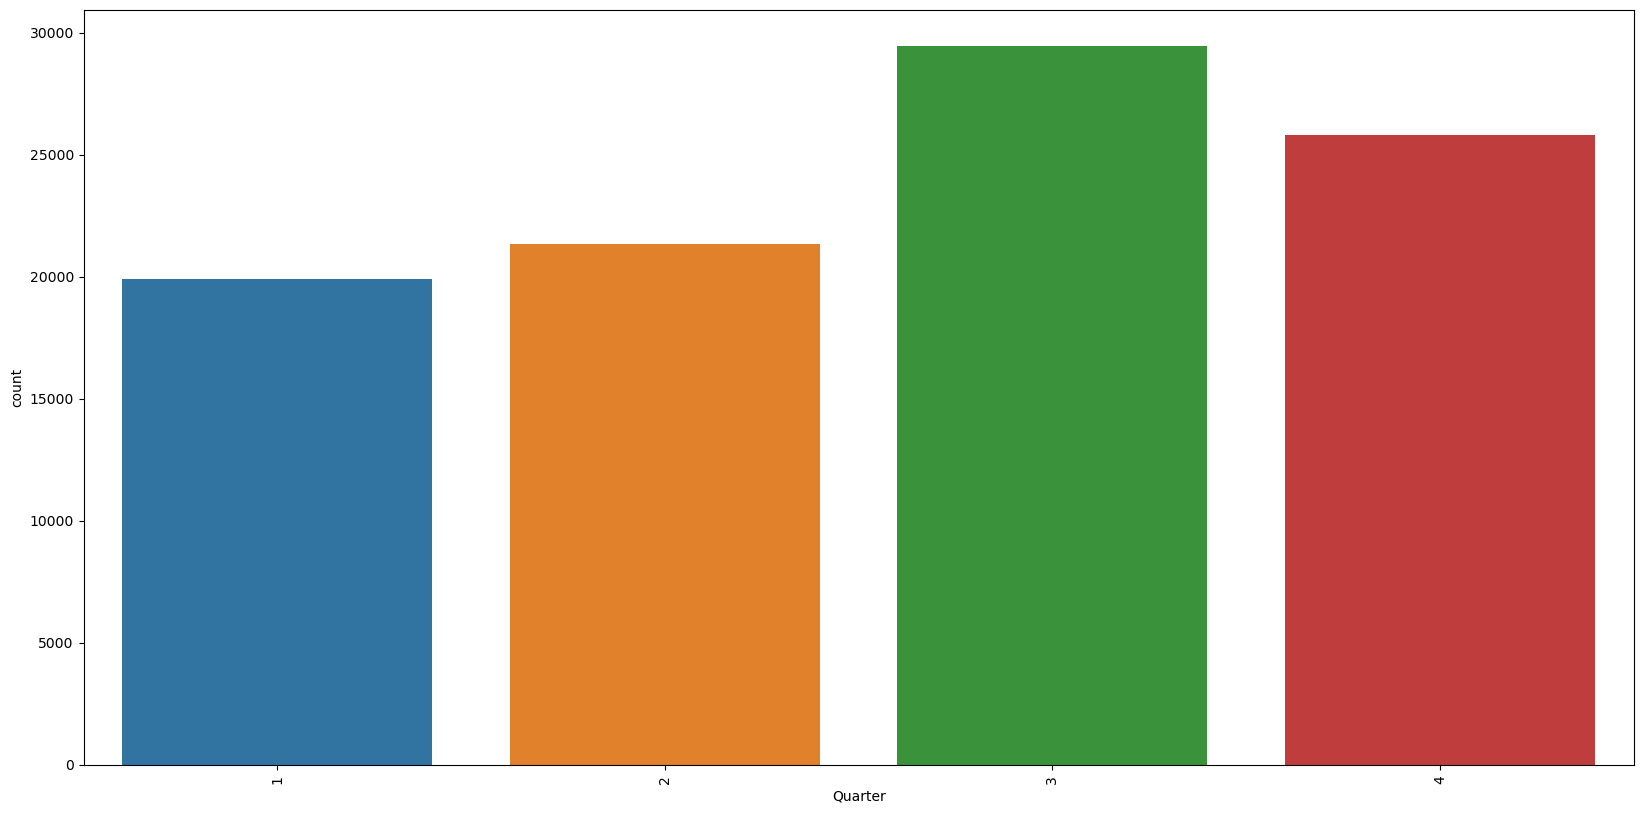

In [ ]:
sns.countplot(df1['Quarter'])
plt.xticks(rotation=90)
#plt.savefig("Quarter.png")
plt.show()

**2. Engineering columns :**  <br><br>
    1. 'avg_monthly_bal(quaterly)'<br>
    2. 'avg_EOM_bal(quaterly)'<br>
    3. 'change_avg_bal(quaterly)'<br>
    4. 'change_EOM_bal(quaterly)'<br>
    
**from columns :** <br><br>
    1. 'AVG_MONTH_BAL_1'<br>
    2. 'AVG_MONTH_BAL_2'<br>
    3. 'AVG_MONTH_BAL_3'<br>
    4. 'EOM_MONTH_1'<br>
    5. 'EOM_MONTH_2'<br>
    6. 'EOM_MONTH_3'<br>

In [ ]:
df1['avg_monthy_bal(quaterly)'] = (df1['AVG_MONTH_BAL_1'] + df1['AVG_MONTH_BAL_2'] + df1['AVG_MONTH_BAL_3'])/3
df1['avg_EOM_bal(quaterly)'] = (df1['EOM_MONTH_1'] + df1['EOM_MONTH_2'] + df1['EOM_MONTH_3'])/3

df1['change_avg_bal(quaterly)'] = np.abs((df1['AVG_MONTH_BAL_3']-df1['AVG_MONTH_BAL_1'])/3)
df1['change_EOM_bal(quaterly)'] = np.abs((df1['EOM_MONTH_3']-df1['EOM_MONTH_1'])/3)

df3 = df1.drop(columns=['AVG_MONTH_BAL_1','AVG_MONTH_BAL_2','AVG_MONTH_BAL_3','EOM_MONTH_1','EOM_MONTH_2','EOM_MONTH_3'],axis=1)

df1.head()

,Location_Name,Company_Category,Residence_Type,Negative_Area,Net_Take_Home,Loan_Applied_Amount,Loan_Applied_tenure,Sanction_Tenure,Disbursement_Amount,Bank_Name,Residence_City,System_Approved_Amount,Is_Online_Lead,cust_loan_type,EOM_MONTH_2,EOM_MONTH_3,AVG_MONTH_BAL_1,AVG_MONTH_BAL_3,EOM_MONTH_1,AVG_MONTH_BAL_2,month_of_date,Quarter,avg_monthy_bal(quaterly),avg_EOM_bal(quaterly),change_avg_bal(quaterly),change_EOM_bal(quaterly)
0,Bangalore,B,Rented with Family,N,32691.0,400000.0,5,5.0,305999.0,ICICI Bank,Bangalore,400000.0,No,approved,33682.0,150.0,9506.166667,4456.666667,280.0,7238.666667,4,2,7067.166667,11370.666667,1683.166667,43.333333
1,Hyderabad,B,Rented with Family,N,21259.0,400000.0,5,3.0,382400.0,Kotak Mahindra Bank Ltd.,Rangareddy,382662.0,No,approved,NaN,NaN,NaN,NaN,NaN,NaN,3,1,NaN,NaN,NaN,NaN
2,Delhi,A,Self Owned,N,117782.0,100000.0,4,4.0,100000.0,Kotak Mahindra Bank Ltd.,Ghaziabad,100000.0,No,approved,722635.0,555902.0,754977.333333,476611.500000,715354.0,735994.333333,5,2,655861.055556,664630.333333,92788.611111,53150.666667
3,Mumbai,A,Rented with Friends,N,23000.0,300000.0,5,5.0,111342.0,Indian Overseas Bank,Mumbai,299000.0,No,approved,48.0,360.0,7396.500000,874.000000,222.0,892.166667,9,3,3054.222222,210.000000,2174.166667,46.000000
4,Mumbai,A,Self Owned,N,39000.0,250000.0,5,2.0,250000.0,Kotak Mahindra Bank Ltd.,Mumbai,250000.0,Yes,approved,129.0,1005.0,6938.000000,12063.333333,971.0,15016.000000,8,3,11339.111111,701.666667,1708.444444,11.333333


**2.1 Nan Treatment of Engineered Features**

In [ ]:
df3.isnull().sum()/len(df3) * 100

Location_Name                0.000000
Company_Category             0.000000
Residence_Type               0.000000
Negative_Area                0.000000
Net_Take_Home                0.000000
Loan_Applied_Amount          0.000000
Loan_Applied_tenure          0.000000
Sanction_Tenure              0.000000
Disbursement_Amount          0.000000
Bank_Name                    0.000000
Residence_City               0.000000
System_Approved_Amount       0.000000
Is_Online_Lead               0.000000
cust_loan_type               0.000000
month_of_date                0.000000
Quarter                      0.000000
avg_monthy_bal(quaterly)    14.891237
avg_EOM_bal(quaterly)       22.721152
change_avg_bal(quaterly)    14.891237
change_EOM_bal(quaterly)    21.444997
dtype: float64

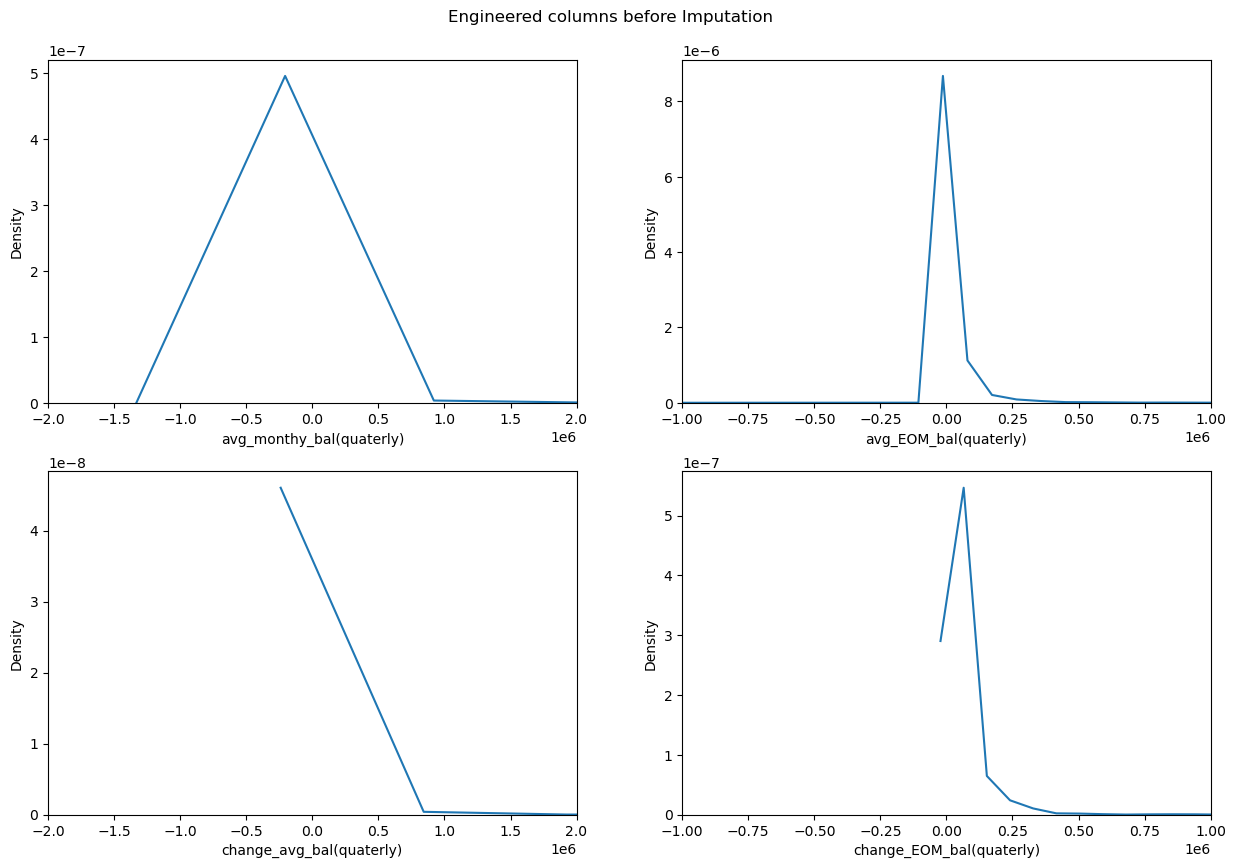

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
plt.suptitle("Engineered columns before Imputation",y=0.93)
sns.kdeplot(x= df3['avg_monthy_bal(quaterly)'],ax=axes[0,0])
axes[0,0].set_xlim(-0.2e7,0.2e7)
sns.kdeplot(x= df3['avg_EOM_bal(quaterly)'],ax=axes[0,1])
axes[0,1].set_xlim(-0.1e7,0.1e7)
sns.kdeplot(df3['change_avg_bal(quaterly)'],ax= axes[1,0])
axes[1,0].set_xlim(-0.2e7,0.2e7)
sns.kdeplot(df3['change_EOM_bal(quaterly)'],ax=axes[1,1])
axes[1,1].set_xlim(-0.1e7,0.1e7)
#plt.savefig("Engineered_col_before_imp.png")
plt.show()

In [ ]:
#Imputation
df3['avg_EOM_bal(quaterly)'] = df3['avg_EOM_bal(quaterly)'].fillna(df3['avg_EOM_bal(quaterly)'].mean())
df3['avg_monthy_bal(quaterly)'] = df3['avg_monthy_bal(quaterly)'].fillna(df3['avg_monthy_bal(quaterly)'].mean())
df3['change_EOM_bal(quaterly)'] = df3['change_EOM_bal(quaterly)'].fillna(df3['change_EOM_bal(quaterly)'].mean())
df3['change_avg_bal(quaterly)'] =df3['change_avg_bal(quaterly)'].fillna(df3['change_avg_bal(quaterly)'].mean())

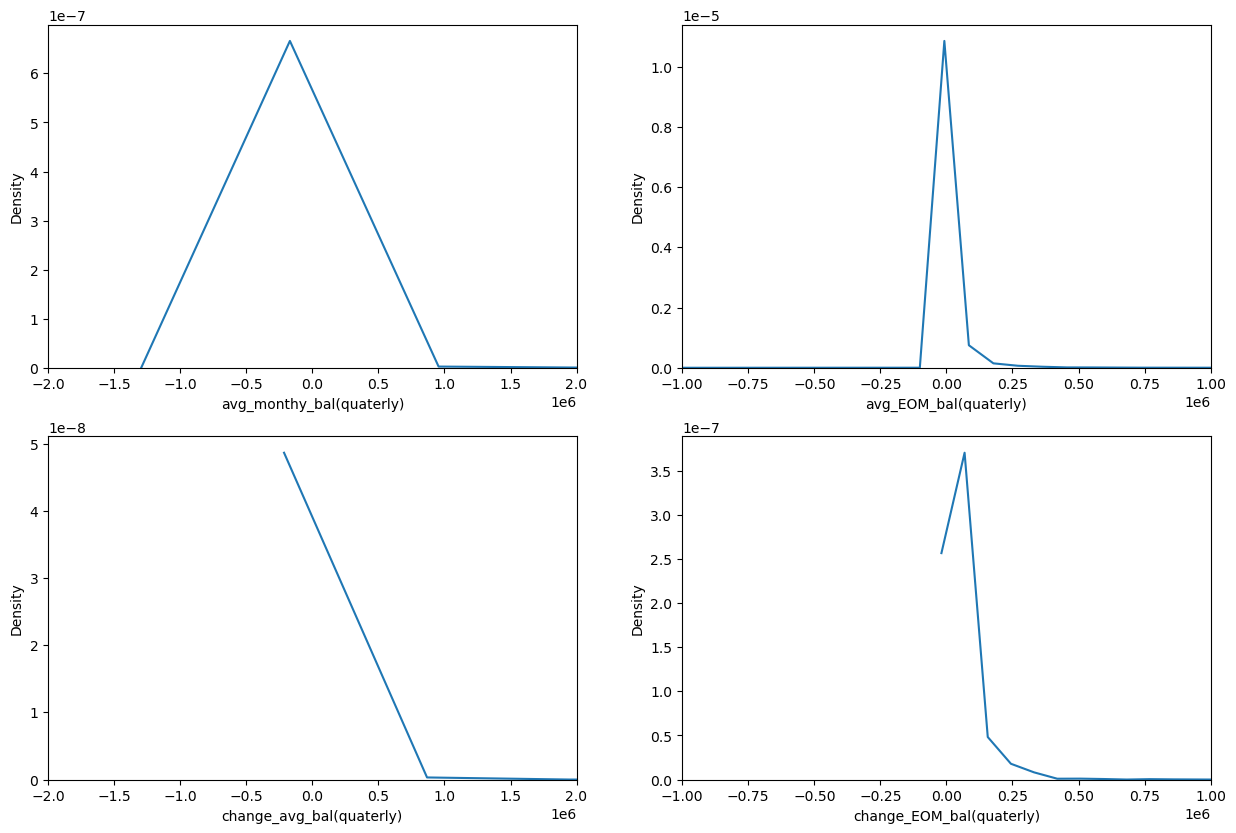

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
sns.kdeplot(x= df3['avg_monthy_bal(quaterly)'],ax=axes[0,0])
axes[0,1].set_xlim(-0.1e7,0.1e7)
sns.kdeplot(x= df3['avg_EOM_bal(quaterly)'],ax=axes[0,1])
axes[0,0].set_xlim(-0.2e7,0.2e7)
sns.kdeplot(df3['change_avg_bal(quaterly)'],ax=axes[1,0])
axes[1,1].set_xlim(-0.1e7,0.1e7)
sns.kdeplot(df3['change_EOM_bal(quaterly)'],ax= axes[1,1])
axes[1,0].set_xlim(-0.2e7,0.2e7)
#plt.savefig("Engineered_col_after_imp.png")
plt.show()

# Bivariate Analysis 

Statistical analysis of the columns:-
1. numerical ~ categorical analysis
2. categorical~categorical analysis

In [ ]:
#Segrigating  numerical and categorical columns 

num=[col for col in df3.select_dtypes("number") ]
cat=[col for col in df3.select_dtypes('object')]

num,cat

(['Net_Take_Home',
  'Loan_Applied_Amount',
  'Loan_Applied_tenure',
  'Sanction_Tenure',
  'Disbursement_Amount',
  'System_Approved_Amount',
  'month_of_date',
  'Quarter',
  'avg_monthy_bal(quaterly)',
  'avg_EOM_bal(quaterly)',
  'change_avg_bal(quaterly)',
  'change_EOM_bal(quaterly)'],
 ['Location_Name',
  'Company_Category',
  'Residence_Type',
  'Negative_Area',
  'Bank_Name',
  'Residence_City',
  'Is_Online_Lead',
  'cust_loan_type'])

### A. For <u>*categorical~categorical analysis*</u> we will be using proportions :
1. Proportion_ztest 
2. chisquare test or chi2_contingency 

### based on the levels of categorical columns we consider w.r.t. to the target column.

#### 1. Location_Name *v/s* cust_loan_type 

In [ ]:
ct1 = pd.crosstab(df3['Location_Name'],df3['cust_loan_type'])
ct1

cust_loan_type,approved,rejected
Location_Name,,
Ahmedabad,2854,727
Bangalore,12042,5242
Baroda,365,30
Calcut,763,481
Calcutta,1137,149
Chandigarh,808,259
Chennai,7893,3260
Cochin,510,72
Delhi,11492,7634


### Hypothesis :

**Null Hypothesis (Ho)** : *'Location_Name' has **no effect** on 'cust_loan_type'*

**Alternate Hypothesis (Ha)** : *'Location_Name' **has effect** on 'cust_loan_type'*

In [ ]:
chi_sta, p_val,dof, expect_val = chi2_contingency(ct1)
print('The chi square statistical value',chi_sta)
print('\nP value:',p_val)

The chi square statistical value 1794.6146582107135

P value: 0.0


### Conclusion : 

#### Since the p_value is < 0.05 we reject the null hypothesis concluding that 'Location_Name' has effect on 'cust_loan_type'.

#### 2. Company_Category *v/s* cust_loan_type 

In [ ]:
ct2 = pd.crosstab(df3['Company_Category'],df3['cust_loan_type'])
ct2

cust_loan_type,approved,rejected
Company_Category,,
A,38561,20648
B,17890,6435
C,2014,1302
D,7575,2115


### Hypothesis :

**Null Hypothesis (Ho)** : *'Company_Category' has **no effect** on 'cust_loan_type'*

**Alternate Hypothesis (Ha)** : *'Company_Category' **has effect** on 'cust_loan_type'*

In [ ]:
chi_sta, p_val,dof, expect_val = chi2_contingency(ct2)
print('The chi square statistical value',chi_sta)
print('\nP value:',p_val)

The chi square statistical value 1109.9239219371984

P value: 2.558940030378701e-240


### Conclusion : 

#### Since the p_value  is < 0.05 we reject the null hypothesis concluding that 'Company_Category' has effect on 'cust_loan_type'.

#### 3. Residence_Type *v/s* cust_loan_type 

In [ ]:
ct3 = pd.crosstab(df3['Residence_Type'],df3['cust_loan_type'])
ct3

cust_loan_type,approved,rejected
Residence_Type,,
Company Provided - Staying Alone,96,31
Company Provided - Staying with family,352,176
Hostel/Guest House/Hotel,7,9
Parental,15399,6567
Paying Guest,35,3
Rented - Bachelor Staying alone,863,105
Rented with Family,28447,12936
Rented with Friends,8947,3505
Self Owned,11894,7168


### Hypothesis :

**Null Hypothesis (Ho)** : *'Residence_Type' has **no effect** on 'cust_loan_type'*

**Alternate Hypothesis (Ha)** : *'Residence_Type' **has effect** on 'cust_loan_type'*

In [ ]:
### Conclusion : 

#### Since the p_value 0.0 is < 0.05 we reject the null hypothesis concluding that 'Location_Name' has effect on 'cust_loan_type'.chi_sta, p_val,dof, expect_val = chi2_contingency(ct3)
print('The chi square statistical value',chi_sta)
print('\nP value:',p_val)

The chi square statistical value 1109.9239219371984

P value: 2.558940030378701e-240


### Conclusion : 

#### Since the p_value is < 0.05 we reject the null hypothesis concluding that 'Residence_Type' has effect on 'cust_loan_type'.

#### 4. Negative_Area *v/s* cust_loan_type 

In [ ]:
ct4 = pd.crosstab(df3['Negative_Area'],df3['cust_loan_type'])
ct4

cust_loan_type,approved,rejected
Negative_Area,,
N,65833,30424
Y,207,76


### Hypothesis :

**Null Hypothesis (Ho)** : *'Negative_Area' has **no effect** on 'cust_loan_type'*

**Alternate Hypothesis (Ha)** : *'Negative_Area' **has effect** on 'cust_loan_type'*

In [ ]:
chi_sta, p_val,dof, expect_val = chi2_contingency(ct4)
print('The chi square statistical value',chi_sta)
print('\nP value:',p_val)

The chi square statistical value 2.73243699590725

P value: 0.09832914014280295


### Conclusion : 

#### Since the p_value  is > 0.05 we fail to reject the null hypothesis concluding that 'Negative_Area' has no effect on 'cust_loan_type'.

#### 5. Bank_Name *v/s* cust_loan_type 

In [1]:
ct5 = pd.crosstab(df3['Bank_Name'],df3['cust_loan_type'])
ct5

NameError: ignored

### Hypothesis :

**Null Hypothesis (Ho)** : *'Bank_Name' has **no effect** on 'cust_loan_type'*

**Alternate Hypothesis (Ha)** : *'Bank_Name' **has effect** on 'cust_loan_type'*

In [ ]:
chi_sta, p_val,dof, expect_val = chi2_contingency(ct5)
print('The chi square statistical value',chi_sta)
print('\nP value:',p_val)

The chi square statistical value 3723.170256916444

P value: 0.0


### Conclusion : 

#### Since the p_value  is < 0.05 we reject the null hypothesis concluding that 'Bank_Name' has effect on 'cust_loan_type'.

#### 6. Residence_City *v/s* cust_loan_type 

In [ ]:
ct6 = pd.crosstab(df3['Residence_City'],df3['cust_loan_type'])
ct6

cust_loan_type,approved,rejected
Residence_City,,
Ahmedabad,2440,601
Alleppey,19,1
Alwar,2,0
Ambala,7,13
Amritsar,2,0
Anand,12,2
Bangalore,14248,7134
Bharuch,39,0
Bhubaneswar,0,1


### Hypothesis :

**Null Hypothesis (Ho)** : *'Residence_City' has **no effect** on 'cust_loan_type'*

**Alternate Hypothesis (Ha)** : *'Residence_City' **has effect** on 'cust_loan_type'*

In [ ]:
chi_sta, p_val,dof, expect_val = chi2_contingency(ct6)
print('The chi square statistical value',chi_sta)
print('\nP value:',p_val)

The chi square statistical value 1351.1397594026146

P value: 2.5799275864807164e-238


### Conclusion : 

#### Since the p_value is < 0.05 we reject the null hypothesis concluding that 'Residence_City' has effect on 'cust_loan_type'.

#### 7. Is_Online_Lead *v/s* cust_loan_type 

In [ ]:
ct7 = pd.crosstab(df3['Is_Online_Lead'],df3['cust_loan_type'])
ct7

cust_loan_type,approved,rejected
Is_Online_Lead,,
No,63143,29503
Yes,2897,997


### Hypothesis :

**Null Hypothesis (Ho)** : *'Is_Online_Lead' has **no effect** on 'cust_loan_type'*

**Alternate Hypothesis (Ha)** : *'Is_Online_Lead' **has effect** on 'cust_loan_type'*

In [ ]:
chi_sta, p_val,dof, expect_val = chi2_contingency(ct7)
print('The chi square statistical value',chi_sta)
print('\nP value:',p_val)

The chi square statistical value 67.06873744861133

P value: 2.622035859446722e-16


### Conclusion : 

#### Since the p_value is < 0.05 we reject the null hypothesis concluding that 'Is_Online_Lead' has effect on 'cust_loan_type'.

### B. For <u>*numerical~categorical analysis*</u> we will be using following sequence of tests :

1. We have divided the numerical columns into two groups based on the target column 'cust_loan_type', namely--<br>
    a. approved group<br>
    b. rejected group
2. Then we are going to check the normality of the groups using shapiro test.
3. As the groups we are analysing are independent and non-parametric then we will do mannwhitneyu test.

#### 8. Net_Take_Home *v/s* cust_loan_type 

In [ ]:
g00 = df3[df3['cust_loan_type']=='approved']['Net_Take_Home']
g01 = df3[df3['cust_loan_type']=='rejected']['Net_Take_Home']

### Hypothesis : for *shapiro-test*

**Null Hypothesis (Ho)** : Data **is** normally distributed

**Alternate Hypothesis (Ha)** : Data **is not** normally distributed

In [ ]:
print(shapiro(g00))
print(shapiro(g01))

ShapiroResult(statistic=0.6183357834815979, pvalue=0.0)
ShapiroResult(statistic=0.6028474569320679, pvalue=0.0)


### Hypothesis : for *mannwhitneyu-test*

**Null Hypothesis (Ho)** : *'Net_Take_Home' has **no effect** on 'cust_loan_type'*

**Alternate Hypothesis (Ha)** : *'Net_Take_Home' **has effect** on 'cust_loan_type'*

In [ ]:
mannwhitneyu(g00,g01)

MannwhitneyuResult(statistic=920621719.5, pvalue=1.0716350451832525e-102)

### Conclusion : 

#### Since the p_value  is < 0.05 we reject the null hypothesis concluding that 'Net_Take_Home' has effect on 'cust_loan_type'.

#### 9. Loan_Applied_Amount *v/s* cust_loan_type 

In [ ]:
g1 = df3[df3['cust_loan_type']=='approved']['Loan_Applied_Amount']
g2 = df3[df3['cust_loan_type']=='rejected']['Loan_Applied_Amount']

### Hypothesis : for *shapiro-test*

**Null Hypothesis (Ho)** : Data **is** normally distributed

**Alternate Hypothesis (Ha)** : Data **is not** normally distributed

In [ ]:
print(shapiro(g1))
print(shapiro(g2))

ShapiroResult(statistic=0.7537659406661987, pvalue=0.0)
ShapiroResult(statistic=0.7543257474899292, pvalue=0.0)


### Hypothesis : for *mannwhitneyu-test*

**Null Hypothesis (Ho)** : *'Loan_Applied_Amount' has **no effect** on 'cust_loan_type'*

**Alternate Hypothesis (Ha)** : *'Loan_Applied_Amount' **has effect** on 'cust_loan_type'*

In [ ]:
mannwhitneyu(g1,g2)

MannwhitneyuResult(statistic=937888872.0, pvalue=3.0613644816991386e-67)

### Conclusion : 

#### Since the p_value  is < 0.05 we reject the null hypothesis concluding that 'Loan_Applied_Amount' has effect on 'cust_loan_type'.

#### 10. Loan_Applied_tenure *v/s* cust_loan_type 

In [ ]:
g3 = df3[df3['cust_loan_type']=='approved']['Loan_Applied_tenure']
g4 = df3[df3['cust_loan_type']=='rejected']['Loan_Applied_tenure']

### Hypothesis : for *shapiro-test*

**Null Hypothesis (Ho)** : Data **is** normally distributed

**Alternate Hypothesis (Ha)** : Data **is not** normally distributed

In [ ]:
print(shapiro(g3))
print(shapiro(g4))

ShapiroResult(statistic=0.3449726104736328, pvalue=0.0)
ShapiroResult(statistic=0.3067152500152588, pvalue=0.0)


### Hypothesis : for *mannwhitneyu-test*

**Null Hypothesis (Ho)** : *'Loan_Applied_tenure' has **no effect** on 'cust_loan_type'*

**Alternate Hypothesis (Ha)** : *'Loan_Applied_tenure' **has effect** on 'cust_loan_type'*

In [ ]:
mannwhitneyu(g3,g4)

MannwhitneyuResult(statistic=985852130.5, pvalue=5.337146977386835e-24)

### Conclusion : 

#### Since the p_value  is < 0.05 we reject the null hypothesis concluding that 'Loan_Applied_tenure' has effect on 'cust_loan_type'.

#### 11. Sanction_Tenure *v/s* cust_loan_type 

In [ ]:
g5 = df3[df3['cust_loan_type']=='approved']['Sanction_Tenure']
g6 = df3[df3['cust_loan_type']=='rejected']['Sanction_Tenure']

### Hypothesis : for *shapiro-test*

**Null Hypothesis (Ho)** : Data **is** normally distributed

**Alternate Hypothesis (Ha)** : Data **is not** normally distributed

In [ ]:
print(shapiro(g5))
print(shapiro(g6))

ShapiroResult(statistic=0.643206000328064, pvalue=0.0)
ShapiroResult(statistic=0.31183427572250366, pvalue=0.0)


### Hypothesis : for *mannwhitneyu-test*

**Null Hypothesis (Ho)** : *'Sanction_Tenure' has **no effect** on 'cust_loan_type'*

**Alternate Hypothesis (Ha)** : *'Sanction_Tenure' **has effect** on 'cust_loan_type'*

In [ ]:
mannwhitneyu(g5,g6)

MannwhitneyuResult(statistic=774627071.0, pvalue=0.0)

### Conclusion : 

#### Since the p_value  is < 0.05 we reject the null hypothesis concluding that 'Sanction_Tenure' has effect on 'cust_loan_type'.

#### 12. Disbursement_Amount *v/s* cust_loan_type 

In [ ]:
g7 = df3[df3['cust_loan_type']=='approved']['Disbursement_Amount']
g8 = df3[df3['cust_loan_type']=='rejected']['Disbursement_Amount']

### Hypothesis : for *shapiro-test*

**Null Hypothesis (Ho)** : Data **is** normally distributed

**Alternate Hypothesis (Ha)** : Data **is not** normally distributed

In [ ]:
print(shapiro(g7))
print(shapiro(g8))

ShapiroResult(statistic=0.8016078472137451, pvalue=0.0)
ShapiroResult(statistic=0.778755784034729, pvalue=0.0)


### Hypothesis : for *mannwhitneyu-test*

**Null Hypothesis (Ho)** : *'Disbursement_Amount' has **no effect** on 'cust_loan_type'*

**Alternate Hypothesis (Ha)** : *'Disbursement_Amount' **has effect** on 'cust_loan_type'*

In [ ]:
mannwhitneyu(g7,g8)

MannwhitneyuResult(statistic=774642524.5, pvalue=0.0)

### Conclusion : 

#### Since the p_value  is < 0.05 we reject the null hypothesis concluding that 'Disbursement_Amount' has effect on 'cust_loan_type'.

#### 13. System_Approved_Amount *v/s* cust_loan_type 

In [ ]:
g9 = df3[df3['cust_loan_type']=='approved']['System_Approved_Amount']
g10 = df3[df3['cust_loan_type']=='rejected']['System_Approved_Amount']

### Hypothesis : for *shapiro-test*

**Null Hypothesis (Ho)** : Data **is** normally distributed

**Alternate Hypothesis (Ha)** : Data **is not** normally distributed

In [ ]:
print(shapiro(g9))
print(shapiro(g10))

ShapiroResult(statistic=0.8490411639213562, pvalue=0.0)
ShapiroResult(statistic=0.8576810359954834, pvalue=0.0)


### Hypothesis : for *mannwhitneyu-test*

**Null Hypothesis (Ho)** : *'System_Approved_Amount' has **no effect** on 'cust_loan_type'*

**Alternate Hypothesis (Ha)** : *'System_Approved_Amount' **has effect** on 'cust_loan_type'*

In [ ]:
mannwhitneyu(g9,g10)

MannwhitneyuResult(statistic=994959176.0, pvalue=0.0012462380003412847)

### Conclusion : 

#### Since the p_value  is < 0.05 we reject the null hypothesis concluding that 'System_Approved_Amount' has effect on 'cust_loan_type'.

#### 13. Quarter *v/s* cust_loan_type 

In [ ]:
g11 = df3[df3['cust_loan_type']=='approved']['Quarter']
g12 = df3[df3['cust_loan_type']=='rejected']['Quarter']

### Hypothesis : for *shapiro-test*

**Null Hypothesis (Ho)** : Data **is** normally distributed

**Alternate Hypothesis (Ha)** : Data **is not** normally distributed

In [ ]:
print(shapiro(g11))
print(shapiro(g12))

ShapiroResult(statistic=0.8489060997962952, pvalue=0.0)
ShapiroResult(statistic=0.8695390224456787, pvalue=0.0)


### Hypothesis : for *mannwhitneyu-test*

**Null Hypothesis (Ho)** : *'Quarter' has **no effect** on 'cust_loan_type'*

**Alternate Hypothesis (Ha)** : *'Quarter' **has effect** on 'cust_loan_type'*

In [ ]:
mannwhitneyu(g11,g12)

MannwhitneyuResult(statistic=837648104.0, pvalue=0.0)

### Conclusion : 

#### Since the p_value  is < 0.05 we reject the null hypothesis concluding that 'Quarter' has effect on 'cust_loan_type'.

In [ ]:
df3.head()

,Location_Name,Company_Category,Residence_Type,Negative_Area,Net_Take_Home,Loan_Applied_Amount,Loan_Applied_tenure,Sanction_Tenure,Disbursement_Amount,Bank_Name,Residence_City,System_Approved_Amount,Is_Online_Lead,cust_loan_type,month_of_date,Quarter,avg_monthy_bal(quaterly),avg_EOM_bal(quaterly),change_avg_bal(quaterly),change_EOM_bal(quaterly)
0,Bangalore,B,Rented with Family,N,32691.0,400000.0,5,5.0,305999.0,ICICI Bank,Bangalore,400000.0,No,approved,4,2,7067.166667,11370.666667,1683.166667,43.333333
1,Hyderabad,B,Rented with Family,N,21259.0,400000.0,5,3.0,382400.0,Kotak Mahindra Bank Ltd.,Rangareddy,382662.0,No,approved,3,1,38653.714398,26867.615634,11995.459238,8920.345967
2,Delhi,A,Self Owned,N,117782.0,100000.0,4,4.0,100000.0,Kotak Mahindra Bank Ltd.,Ghaziabad,100000.0,No,approved,5,2,655861.055556,664630.333333,92788.611111,53150.666667
3,Mumbai,A,Rented with Friends,N,23000.0,300000.0,5,5.0,111342.0,Indian Overseas Bank,Mumbai,299000.0,No,approved,9,3,3054.222222,210.000000,2174.166667,46.000000
4,Mumbai,A,Self Owned,N,39000.0,250000.0,5,2.0,250000.0,Kotak Mahindra Bank Ltd.,Mumbai,250000.0,Yes,approved,8,3,11339.111111,701.666667,1708.444444,11.333333


# Bartlett's Sphericity Test

**Ho : Correlation matrix is an identity matrix**

**Ha : Correlation matrix is not an identity matrix** 

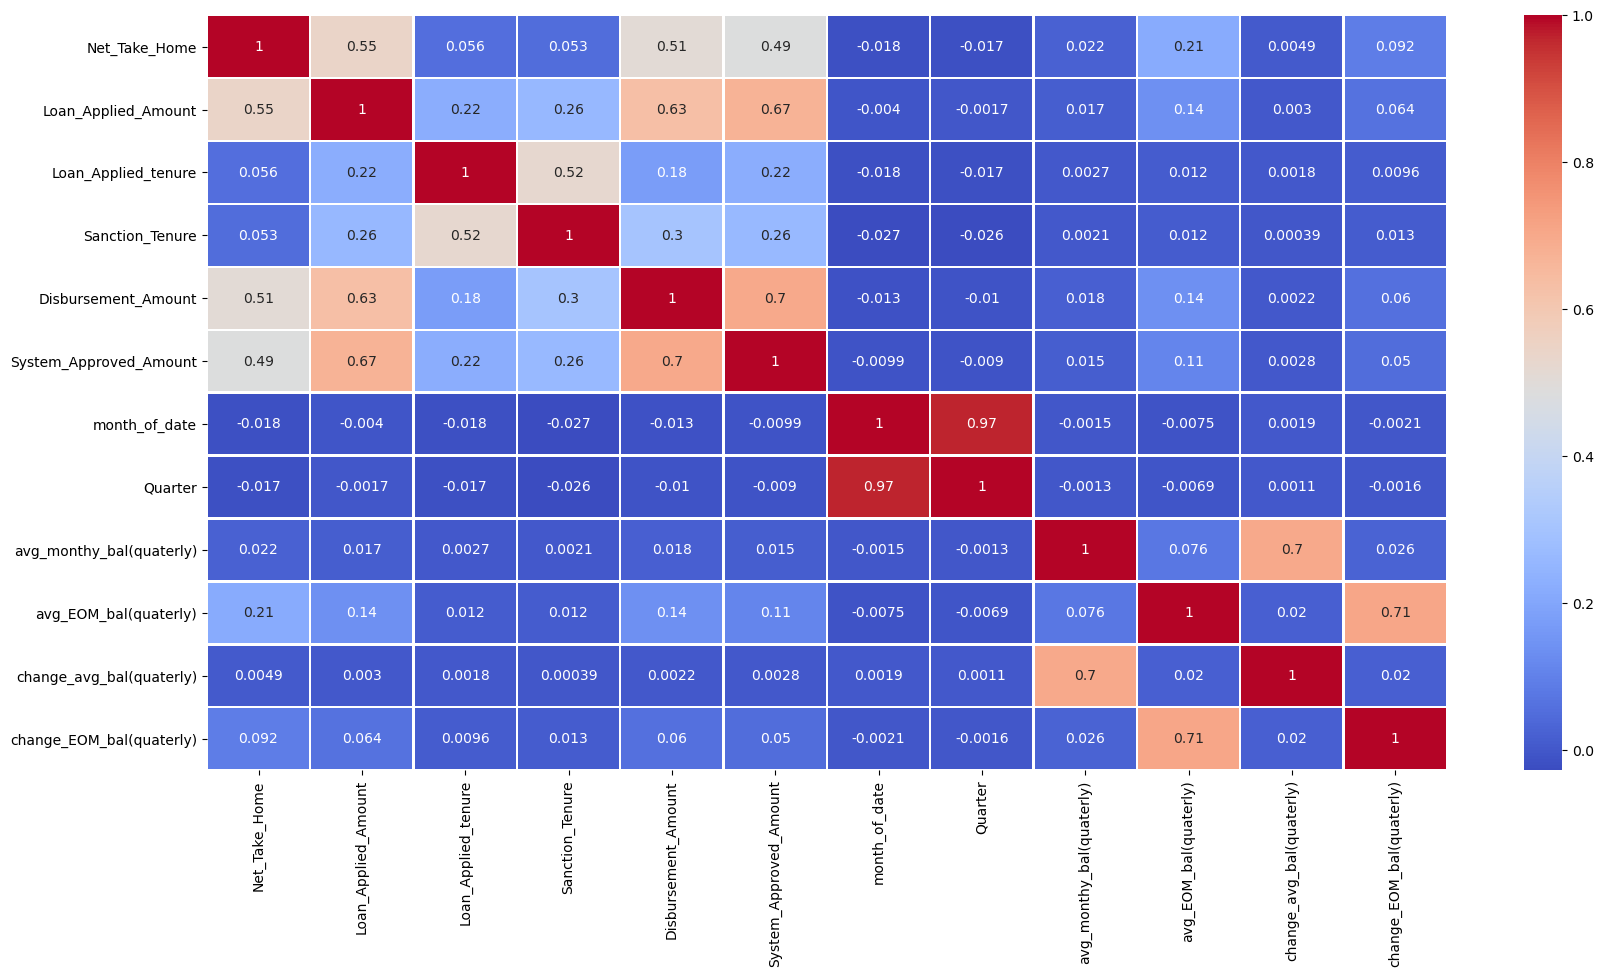

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df3.corr(),linewidths=1,annot= True, cmap = 'coolwarm')
#plt.savefig("df3_heatmap.png")
plt.show()

In [ ]:
num_df = df3.select_dtypes(include=np.number) #extracting numerical columns for Bartlett's Test

#Bartlett's Sphricity Test implementation
#chi_square_value, p_value = calculate_bartlett_sphericity(num_df)
#print(f"chi-square : {chi_square_value}\np-value : {p_value}")

### Conclusion and Insights : <br>
1. As p-value<5% we don't have significant statistical evidence to accept null hypothesis.
<br>
<br>
2. As observed from the correlation matrix *'Quarter'* and *'month_of_date'* have very high correlation and hence   
   contributing to redundancy. Thus we are dropping one of the 2 columns namely -- *month_of_date*.
<br>
<br>
3. From categorical~categorical analysis *'Negative_Area'* does not have an effect on the target, we are dropping it. 

In [ ]:
#dropping irrelevant columns.
df3=df3.drop(columns=['Negative_Area','month_of_date'],axis=1)
df3.head()

,Location_Name,Company_Category,Residence_Type,Net_Take_Home,Loan_Applied_Amount,Loan_Applied_tenure,Sanction_Tenure,Disbursement_Amount,Bank_Name,Residence_City,System_Approved_Amount,Is_Online_Lead,cust_loan_type,Quarter,avg_monthy_bal(quaterly),avg_EOM_bal(quaterly),change_avg_bal(quaterly),change_EOM_bal(quaterly)
0,Bangalore,B,Rented with Family,32691.0,400000.0,5,5.0,305999.0,ICICI Bank,Bangalore,400000.0,No,approved,2,7067.166667,11370.666667,1683.166667,43.333333
1,Hyderabad,B,Rented with Family,21259.0,400000.0,5,3.0,382400.0,Kotak Mahindra Bank Ltd.,Rangareddy,382662.0,No,approved,1,38653.714398,26867.615634,11995.459238,8920.345967
2,Delhi,A,Self Owned,117782.0,100000.0,4,4.0,100000.0,Kotak Mahindra Bank Ltd.,Ghaziabad,100000.0,No,approved,2,655861.055556,664630.333333,92788.611111,53150.666667
3,Mumbai,A,Rented with Friends,23000.0,300000.0,5,5.0,111342.0,Indian Overseas Bank,Mumbai,299000.0,No,approved,3,3054.222222,210.000000,2174.166667,46.000000
4,Mumbai,A,Self Owned,39000.0,250000.0,5,2.0,250000.0,Kotak Mahindra Bank Ltd.,Mumbai,250000.0,Yes,approved,3,11339.111111,701.666667,1708.444444,11.333333


# Label  Encoding

In [ ]:
cat_df = df3.select_dtypes(include='object') #Extracting categorical columns for label encoding

#LabelEncoding

cat_df['Location_Name']=LabelEncoder().fit_transform(cat_df['Location_Name'])
cat_df['Company_Category'] =LabelEncoder().fit_transform(cat_df['Company_Category'])
cat_df['Residence_Type'] =LabelEncoder().fit_transform(cat_df['Residence_Type'])
#cat_df['Negative_Area'] =LabelEncoder().fit_transform(cat_df['Negative_Area'])
cat_df['Residence_City'] =LabelEncoder().fit_transform(cat_df['Residence_City'])
cat_df['Is_Online_Lead'] = LabelEncoder().fit_transform(cat_df['Is_Online_Lead'])
cat_df['Bank_Name'] = LabelEncoder().fit_transform(cat_df['Bank_Name'])
cat_df['cust_loan_type'] = LabelEncoder().fit_transform(cat_df['cust_loan_type'])

In [ ]:
# Standard Scaling

In [ ]:
num_df[['Net_Take_Home', 'Loan_Applied_Amount', 'Loan_Applied_tenure',
       'Sanction_Tenure', 'Disbursement_Amount', 'System_Approved_Amount',
        'Quarter', 'avg_monthy_bal(quaterly)',
       'avg_EOM_bal(quaterly)', 'change_avg_bal(quaterly)',
       'change_EOM_bal(quaterly)']] = StandardScaler().fit_transform(num_df[['Net_Take_Home', 'Loan_Applied_Amount', 'Loan_Applied_tenure',
       'Sanction_Tenure', 'Disbursement_Amount', 'System_Approved_Amount',
        'Quarter', 'avg_monthy_bal(quaterly)',
       'avg_EOM_bal(quaterly)', 'change_avg_bal(quaterly)',
       'change_EOM_bal(quaterly)']])

# Final DataFrame after concatention

In [ ]:
df2 = pd.concat([num_df,cat_df],axis=1) #Concatenating label encoded categorical features and standard scales numerical features
df2.head()

,Net_Take_Home,Loan_Applied_Amount,Loan_Applied_tenure,Sanction_Tenure,Disbursement_Amount,System_Approved_Amount,month_of_date,Quarter,avg_monthy_bal(quaterly),avg_EOM_bal(quaterly),change_avg_bal(quaterly),change_EOM_bal(quaterly),Location_Name,Company_Category,Residence_Type,Bank_Name,Residence_City,Is_Online_Lead,cust_loan_type
0,-0.471091,-0.460895,0.296343,0.502420,-0.522435,-0.136945,4,-0.583748,-3.115531e-02,-1.519095e-01,-1.453783e-02,-1.411481e-01,1,1,6,27,6,0,0
1,-0.771507,-0.460895,0.296343,-1.596396,-0.255734,-0.197647,3,-1.504641,2.583584e-16,-2.496300e-16,2.359188e-16,4.049174e-16,10,1,6,37,55,0,0
2,1.764973,-1.093662,-1.380029,-0.546988,-1.241540,-1.187277,5,-0.583748,6.087809e-01,6.251695e+00,1.138988e-01,7.032800e-01,8,0,8,37,18,0,0
3,-0.725756,-0.671818,0.296343,0.502420,-1.201947,-0.490557,9,0.337146,-3.511347e-02,-2.613124e-01,-1.384564e-02,-1.411057e-01,12,0,7,32,43,0,0
4,-0.305300,-0.777279,0.296343,-2.645804,-0.717918,-0.662111,8,0.337146,-2.694169e-02,-2.564928e-01,-1.450220e-02,-1.416569e-01,12,0,8,37,43,1,0


# Reduction of Imbalanced classes

In [ ]:
X=df2.iloc[:,0:-1]
y=df2.iloc[:,-1]

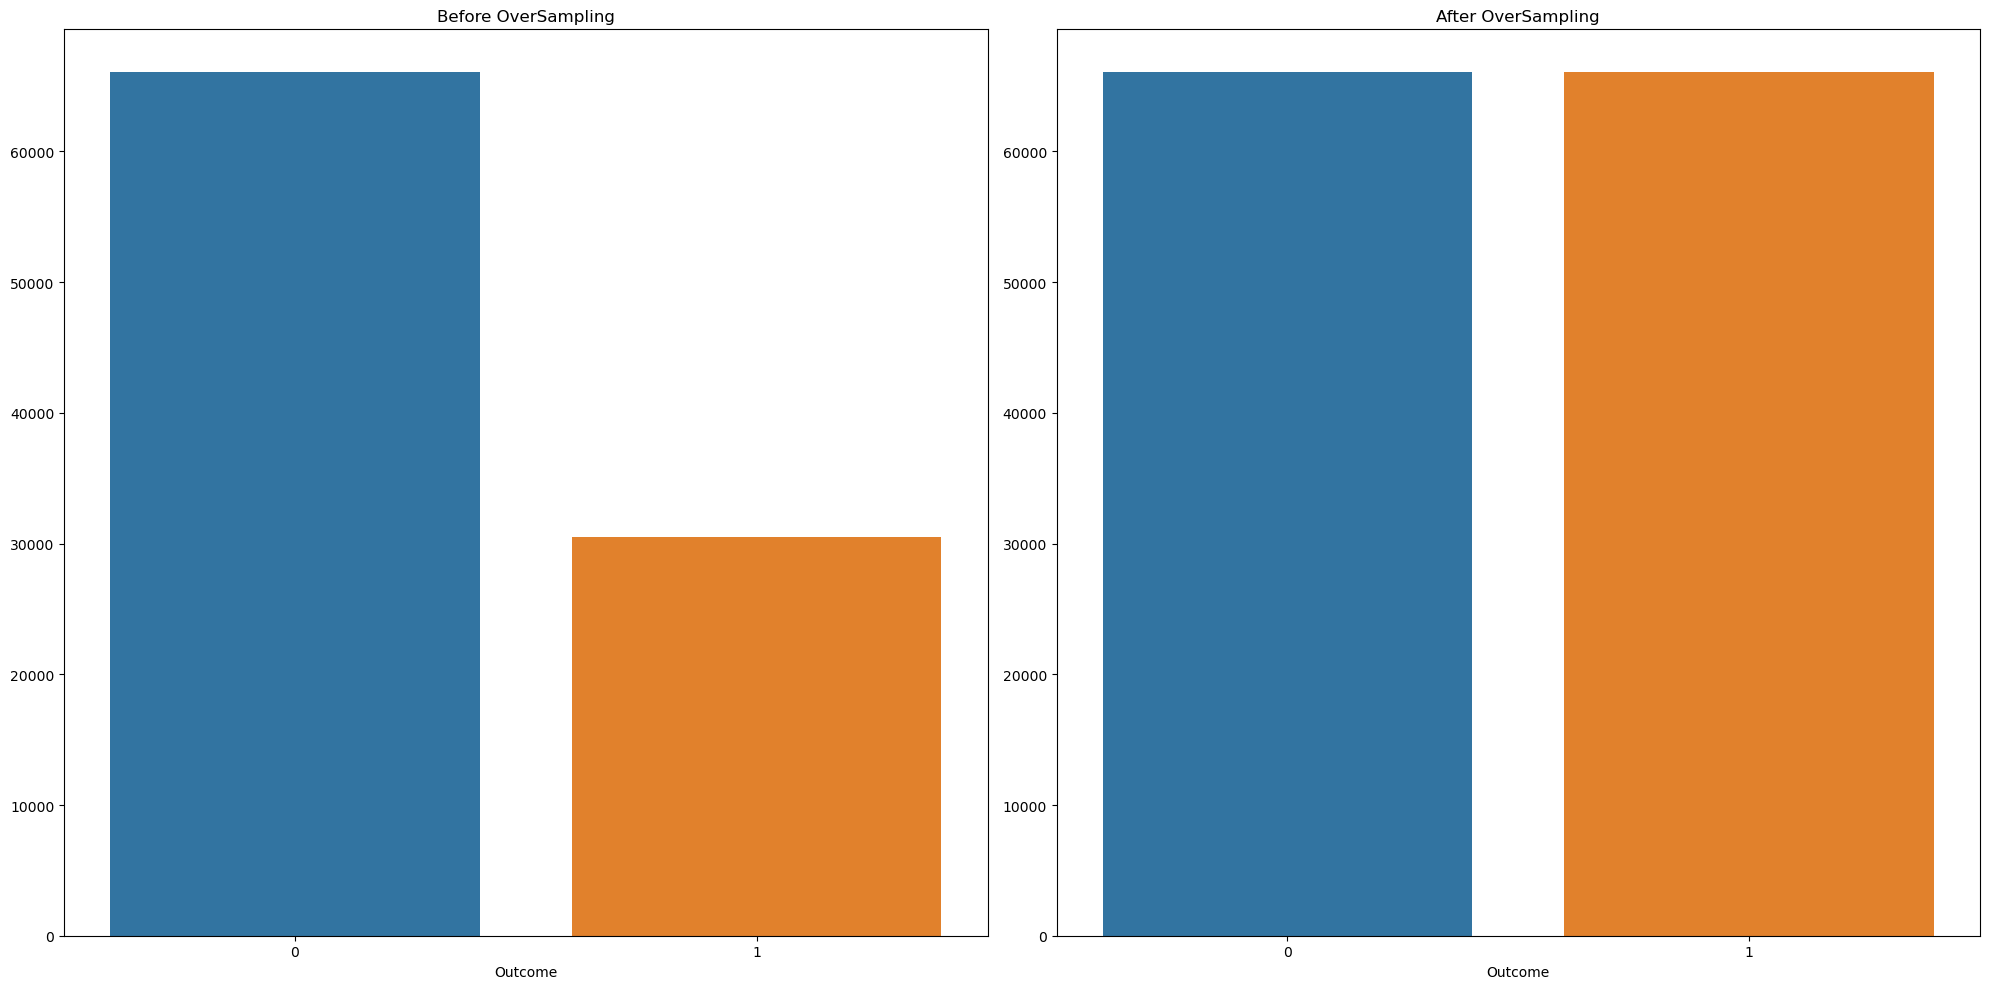

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot(x=['0','1'],y=[sum(y==0),sum(y==1)],ax=ax[0])
ax[0].set_title("Before OverSampling")
ax[0].set_xlabel("Outcome")
sm=SMOTE(random_state=1)
X,y=sm.fit_resample(X,y)
sns.barplot(x=['0','1'],y=[sum(y==0),sum(y==1)],ax=ax[1])
ax[1].set_title("After OverSampling")
ax[1].set_xlabel("Outcome")
plt.tight_layout()
plt.savefig("SMOTE.png")
plt.show()

# Train-Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Model Building -- Decision Tree


**1. Decision Tree building**

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=1,max_depth=5,max_leaf_nodes=5)
decision_tree = decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(f'Accuracy score : {accuracy_score(y_test,y_pred)*100:.2f}%')

Accuracy score : 89.78%


**2. Generation of Confusion Matrix**

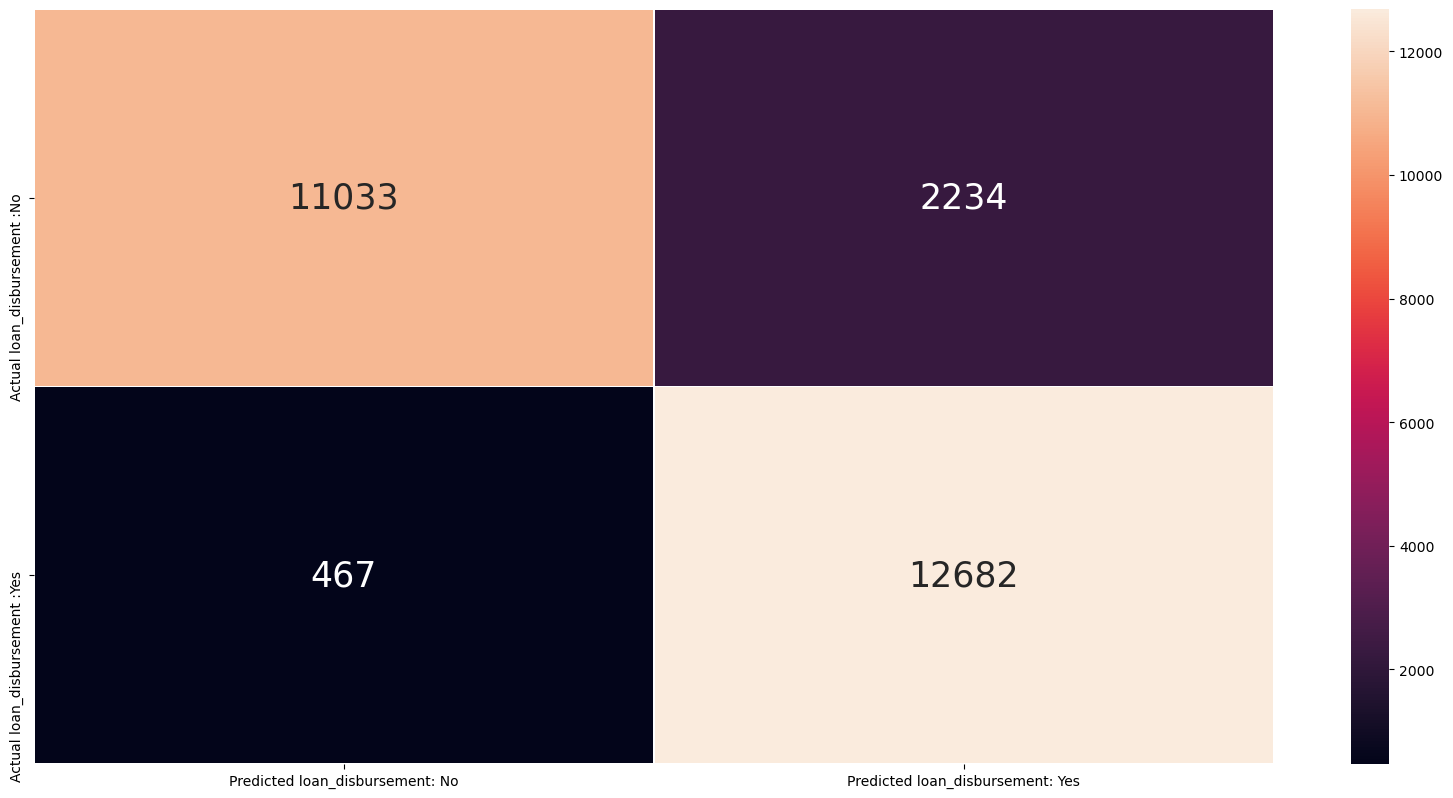

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted loan_disbursement: No','Predicted loan_disbursement: Yes'],index = ['Actual loan_disbursement :No','Actual loan_disbursement :Yes'])
sns.heatmap(conf_matrix, annot=True, annot_kws = {'size':25}, fmt = 'd',linewidths = 0.3, cbar = True)
plt.savefig("Confusion_matrix_Decision_tree.png")
plt.show()

**3. Plotting of ROC-AUC curve**

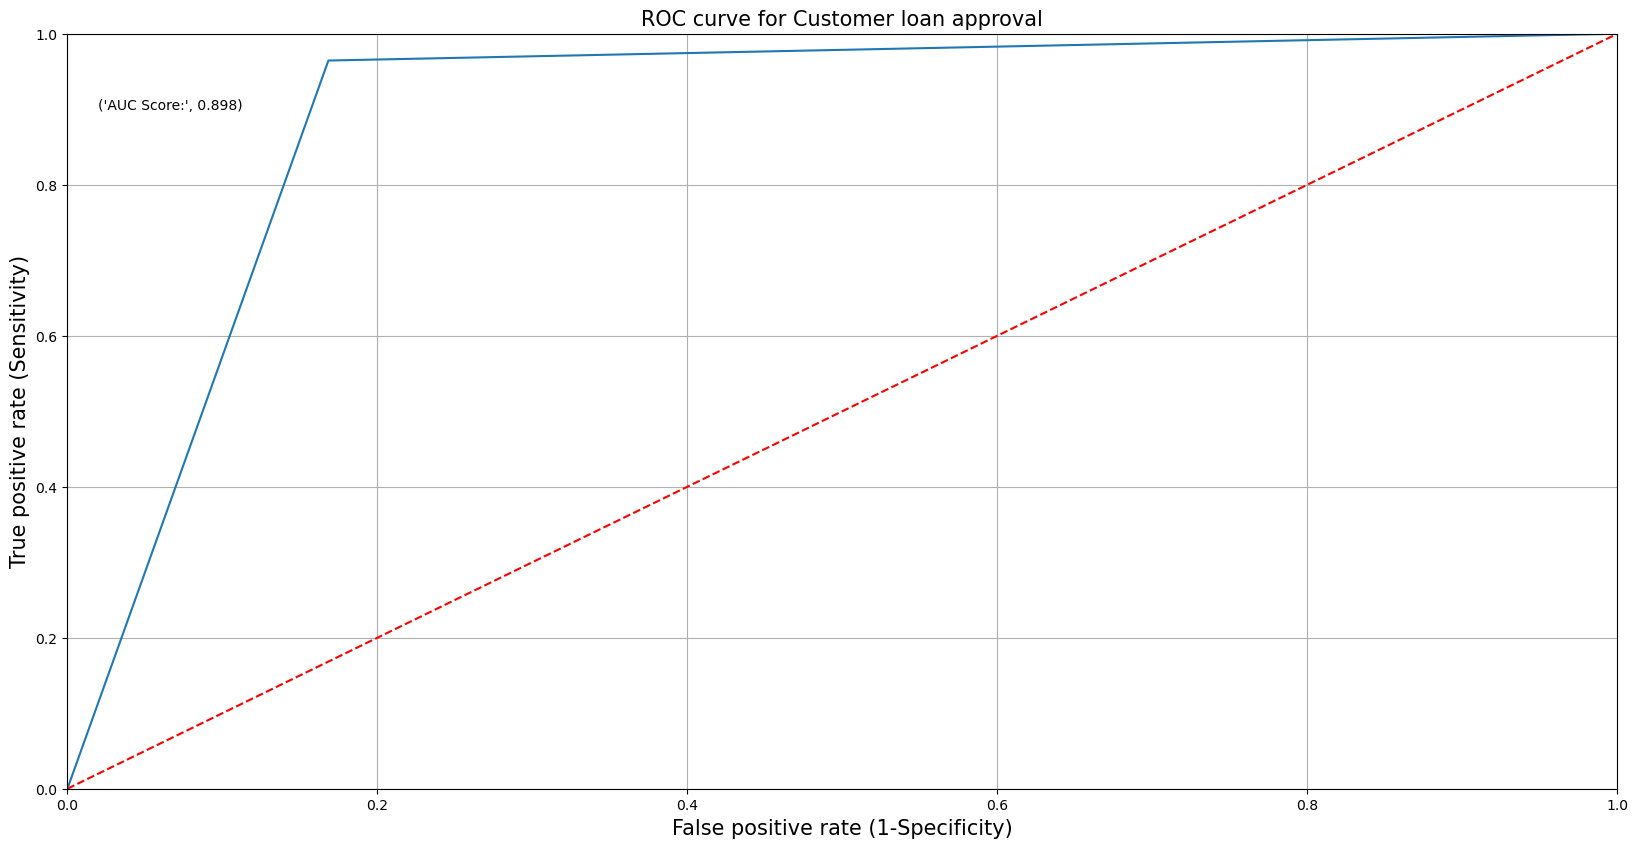

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer loan approval', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,  y_pred),4)))
plt.grid(True)
plt.savefig("ROC_AUC_Decision_Tree.png")
plt.show()

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP / (TP+FN)
specificity = TN / (TN+FP)
misclassified=(FP+FN)/(TN+TP+FP+FN)
correct_classified=(TP+TN)/(TN+TP+FP+FN)
print(f"\n\nTrue Positive (TP)={TP}\n\nTrue Negative (TN)={TN}\n\nFalse Positive (FP)={FP}\n\nFalse Negative (FN)={FN}\n\nSensitivity={sensitivity:0.2f}\n\nSpecificity={specificity:0.2f}\n\nMisclassified={misclassified:0.2f}\n\nCorrectly Classified={correct_classified:0.2f}\n\n")



True Positive (TP)=12682

True Negative (TN)=11033

False Positive (FP)=2234

False Negative (FN)=467

Sensitivity=0.96

Specificity=0.83

Misclassified=0.10

Correctly Classified=0.90




**4. Classification Report**

In [ ]:
print(f'Classification Report:\n {classification_report(y_test,y_pred)}')

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89     13267
           1       0.85      0.96      0.90     13149

    accuracy                           0.90     26416
   macro avg       0.90      0.90      0.90     26416
weighted avg       0.91      0.90      0.90     26416



**5. Decision Tree Plotting**

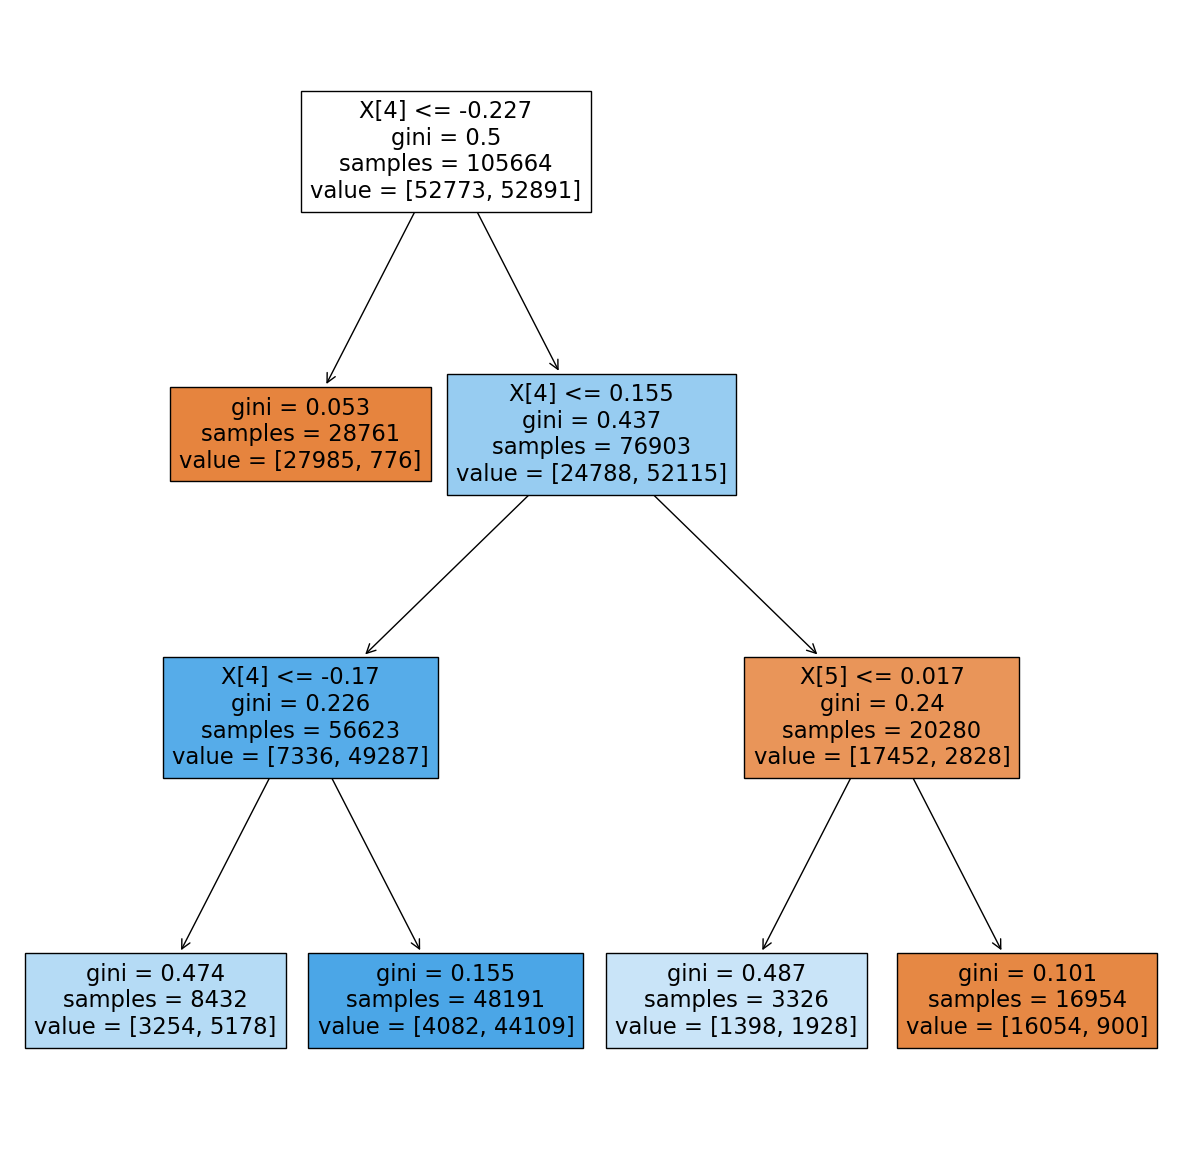

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(decision_tree,filled=True)
plt.savefig("Decision_tree.png")
plt.show()

# Model Building-Random Forest

In [ ]:
X=df2.iloc[:,0:-1]
y=df2.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
rf_classification=RandomForestClassifier(n_estimators=10,random_state=10)
rf_model=rf_classification.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print(classification_report(y_test,y_pred))
print(f'Accuracy score : {accuracy_score(y_test,y_pred)*100:.2f}%')

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13289
           1       0.96      0.96      0.96      6019

    accuracy                           0.98     19308
   macro avg       0.97      0.97      0.97     19308
weighted avg       0.98      0.98      0.98     19308

Accuracy score : 97.67%


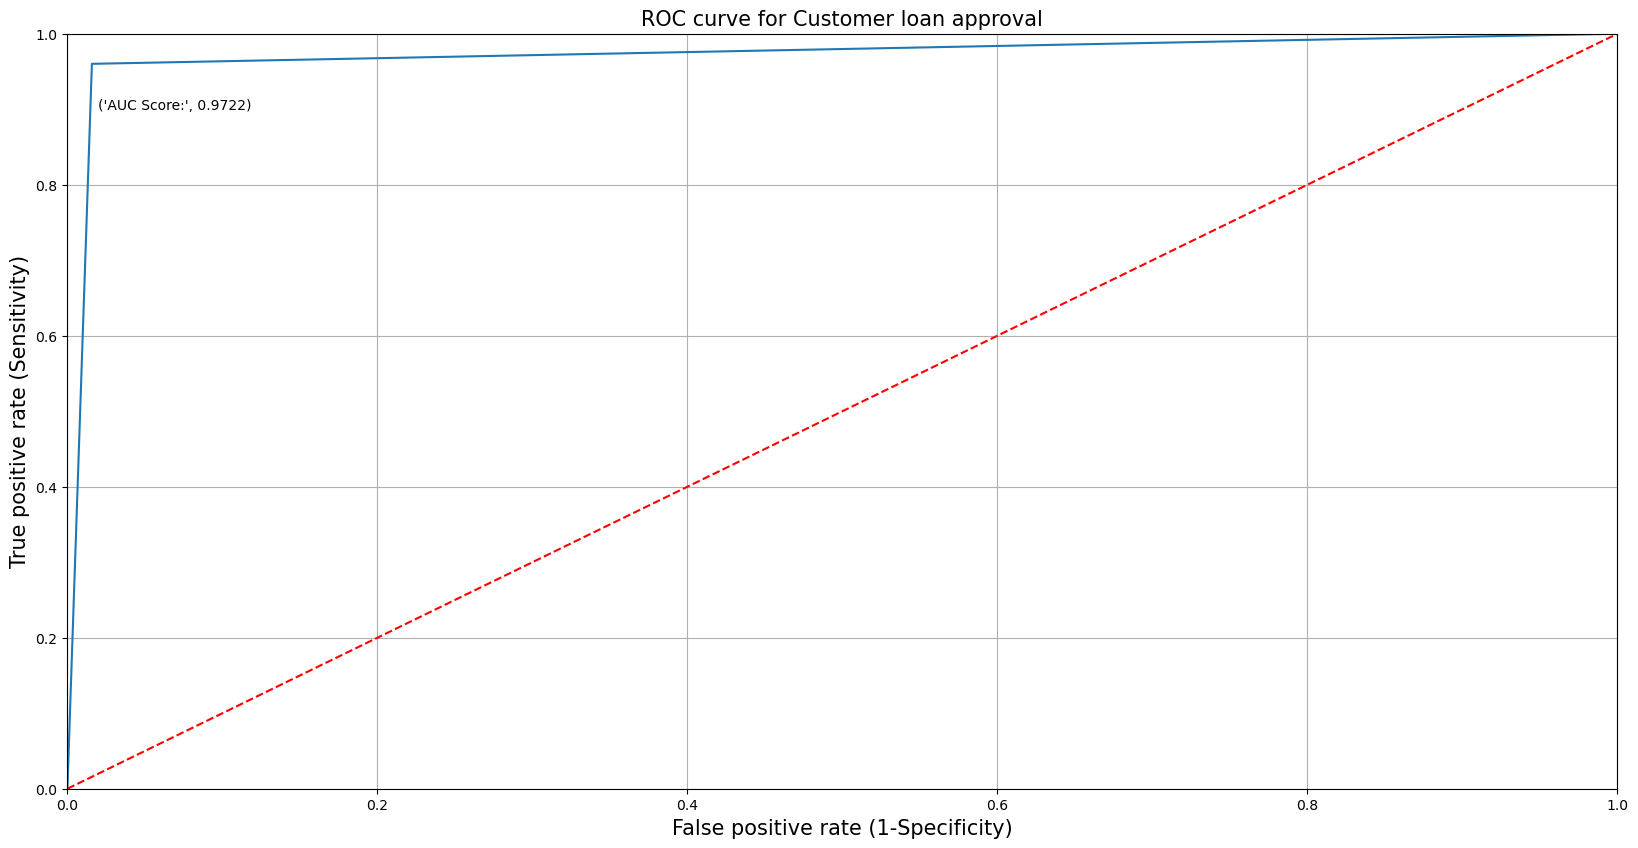

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer loan approval', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,  y_pred),4)))
plt.grid(True)
plt.savefig("ROC_AUC_RF.png")
plt.show()

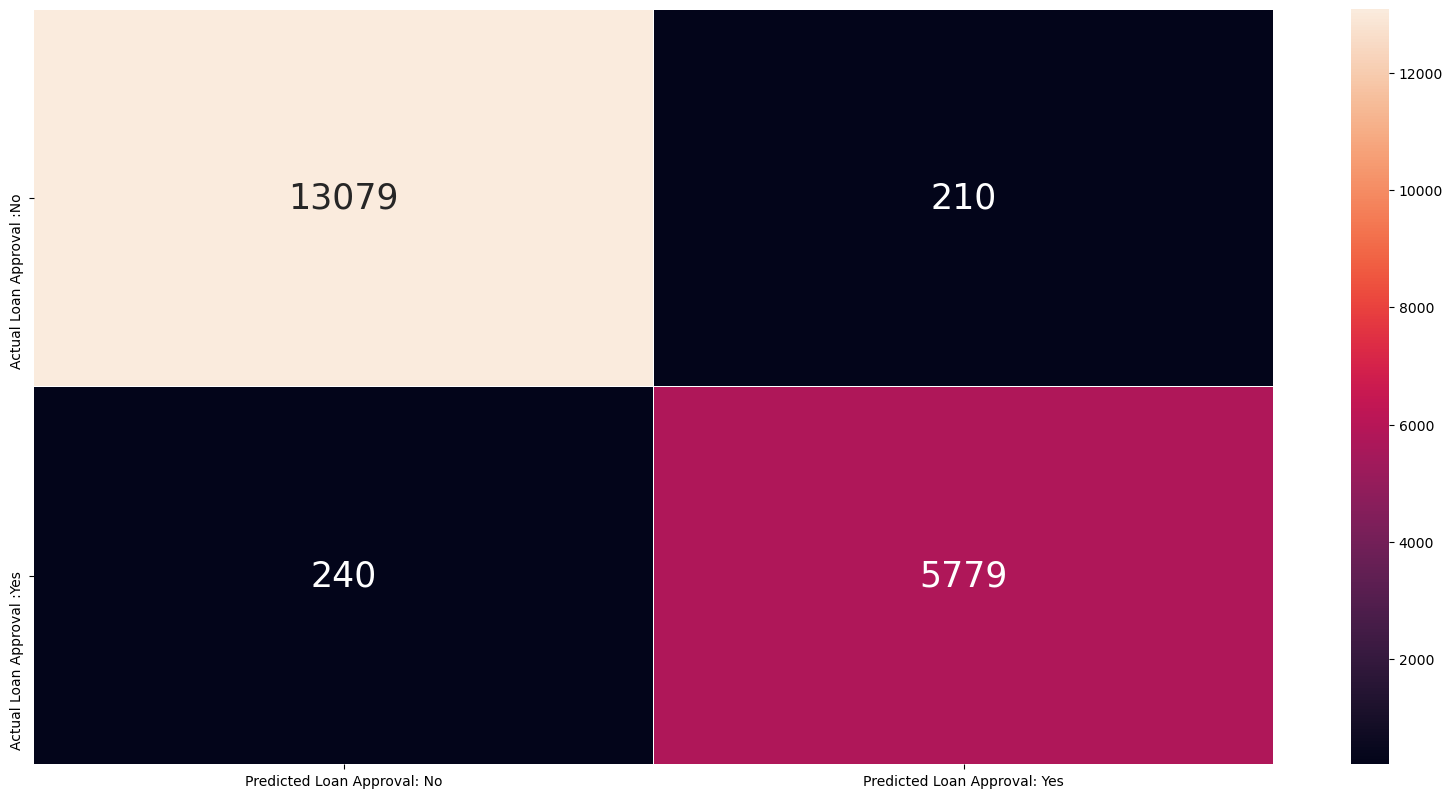

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Loan Approval: No','Predicted Loan Approval: Yes'],index = ['Actual Loan Approval :No','Actual Loan Approval :Yes'])
sns.heatmap(conf_matrix, annot=True, annot_kws = {'size':25}, fmt = 'd',linewidths = 0.3, cbar = True)
plt.savefig("conf_mat_RF.png")
plt.show()

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP / (TP+FN)
specificity = TN / (TN+FP)
misclassified=(FP+FN)/(TN+TP+FP+FN)
correct_classified=(TP+TN)/(TN+TP+FP+FN)
print(f"\n\nTrue Positive (TP)={TP}\n\nTrue Negative (TN)={TN}\n\nFalse Positive (FP)={FP}\n\nFalse Negative (FN)={FN}\n\nSensitivity={sensitivity:0.2f}\n\nSpecificity={specificity:0.2f}\n\nMisclassified={misclassified:0.2f}\n\nCorrectly Classified={correct_classified:0.2f}\n\n")



True Positive (TP)=5779

True Negative (TN)=13079

False Positive (FP)=210

False Negative (FN)=240

Sensitivity=0.96

Specificity=0.98

Misclassified=0.02

Correctly Classified=0.98




In [ ]:
print(f'Classification Report:\n {classification_report(y_test,y_pred)}')

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     13289
           1       0.96      0.96      0.96      6019

    accuracy                           0.98     19308
   macro avg       0.97      0.97      0.97     19308
weighted avg       0.98      0.98      0.98     19308



# Model Building- PCA

In [ ]:
X=df2.iloc[:,0:-1]
y=df2.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
cov_matrix=np.cov(X.T)
print(f"The covariance matrix is\n\n{cov_matrix}")

The covariance matrix is

[[ 1.00001036e+00  5.45434498e-01  5.56354703e-02  5.29291051e-02
   5.07952947e-01  4.86181218e-01 -6.17578829e-02 -1.72184629e-02
   2.15412861e-02  2.13599883e-01  4.91626147e-03  9.18437946e-02
   2.16405219e-01 -3.93647555e-02  1.61195241e-01 -7.36680755e-01
   8.52584676e-01 -1.14705922e-02]
 [ 5.45434498e-01  1.00001036e+00  2.22788652e-01  2.60685197e-01
   6.32313762e-01  6.71643147e-01 -1.34121831e-02 -1.67470823e-03
   1.65704168e-02  1.38793290e-01  2.96513990e-03  6.40358900e-02
   1.38002631e-01 -2.90638240e-02  9.91041677e-02 -1.18739935e+00
  -8.85045004e-02 -2.07165001e-02]
 [ 5.56354703e-02  2.22788652e-01  1.00001036e+00  5.23325761e-01
   1.76569452e-01  2.24887107e-01 -6.09488930e-02 -1.66145047e-02
   2.65667043e-03  1.18018194e-02  1.83487942e-03  9.62346025e-03
   5.98035034e-01 -7.23481939e-03  3.95423946e-02 -1.02192547e+00
   1.13985495e+00 -2.00151347e-02]
 [ 5.29291051e-02  2.60685197e-01  5.23325761e-01  1.00001036e+00
   3.024488

In [ ]:
eig_vals,eig_vecs=np.linalg.eig(cov_matrix)
print(f"The Eigen Values are \n\n{eig_vals}\n\Eigen Vectors are \n\n{eig_vecs}")

The Eigen Values are 

[4.21540777e+02 1.94797111e+02 1.20860242e+01 7.73346028e+00
 3.25382302e+00 2.88609052e+00 1.75383992e+00 1.62596883e+00
 1.30039750e+00 8.96371521e-01 5.40772942e-01 4.59127885e-01
 3.55921926e-01 3.15358371e-01 2.80072951e-01 2.61881323e-01
 5.50137599e-02 3.78365874e-02]
\Eigen Vectors are 

[[ 2.01148175e-03  4.03727698e-03 -5.84973670e-03 -1.72815964e-02
   2.61444258e-01 -2.95114720e-01 -2.88414670e-02  6.62612577e-02
  -3.37738773e-01 -2.13966527e-02  6.83995105e-01 -4.40196667e-01
   1.26322807e-01 -1.34001635e-01 -1.51414576e-01 -7.73938862e-02
   8.82244761e-04 -1.98326314e-04]
 [-2.66252309e-04  6.18020991e-03 -2.26164956e-03 -3.03684814e-02
   2.84804972e-01 -3.81607084e-01  6.49853843e-02 -4.39161949e-02
  -1.45984932e-01 -3.75166094e-02  2.03985033e-03  1.83826123e-01
  -7.86319995e-01  1.21397510e-01  2.72846942e-01 -4.49107435e-02
  -3.24885640e-03  1.09557728e-02]
 [ 2.80298253e-03  5.56952999e-03 -5.38406925e-03 -6.47058151e-02
   1.17225258e-0

In [ ]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]
print(f"The Eigen Pairs are\n\n{eigen_pairs}")

The Eigen Pairs are

[(421.5407773141174, array([ 2.01148175e-03, -2.66252309e-04,  2.80298253e-03, -1.44656759e-04,
       -2.64455755e-04, -7.77635841e-04, -6.99122468e-03, -1.88566127e-03,
        1.03353503e-04,  1.07145486e-03,  2.01391026e-04,  5.28546128e-04,
        1.60047954e-01, -9.72515625e-04, -3.06033063e-04,  4.04621768e-02,
        9.86245326e-01, -3.92837932e-05])), (194.79711060469833, array([ 4.03727698e-03,  6.18020991e-03,  5.56952999e-03,  8.12612614e-03,
        6.10490180e-03,  6.01099340e-03, -2.73334172e-03, -8.04623886e-04,
        1.00396905e-04,  3.08898747e-04, -1.45068939e-04,  5.24492528e-04,
        7.55702418e-03, -2.74810861e-03,  2.32218286e-03, -9.99058616e-01,
        3.97231531e-02, -6.55077764e-04])), (12.086024166484782, array([-5.84973670e-03, -2.26164956e-03, -5.38406925e-03, -8.77836622e-03,
       -4.81505028e-03, -4.14656826e-03,  9.59584325e-01,  2.80004263e-01,
       -4.42898800e-04, -2.37227693e-03,  5.79856497e-04, -7.75078512e-04,
   

In [ ]:
eig_val_tot=np.sum(eig_vals)
print(f"The total value of Eigen Values is {eig_val_tot}")

The total value of Eigen Values is 650.1798494342696


    Individual Variance Explained  Cumulative Variance Explained
0                       64.834488                      64.834488
1                       29.960496                      94.794985
2                        1.858874                      96.653859
3                        1.189434                      97.843293
4                        0.500450                      98.343742
5                        0.443891                      98.787633
6                        0.269747                      99.057380
7                        0.250080                      99.307460
8                        0.200006                      99.507466
9                        0.137865                      99.645331
10                       0.083173                      99.728504
11                       0.070616                      99.799119
12                       0.054742                      99.853862
13                       0.048503                      99.902365
14                       

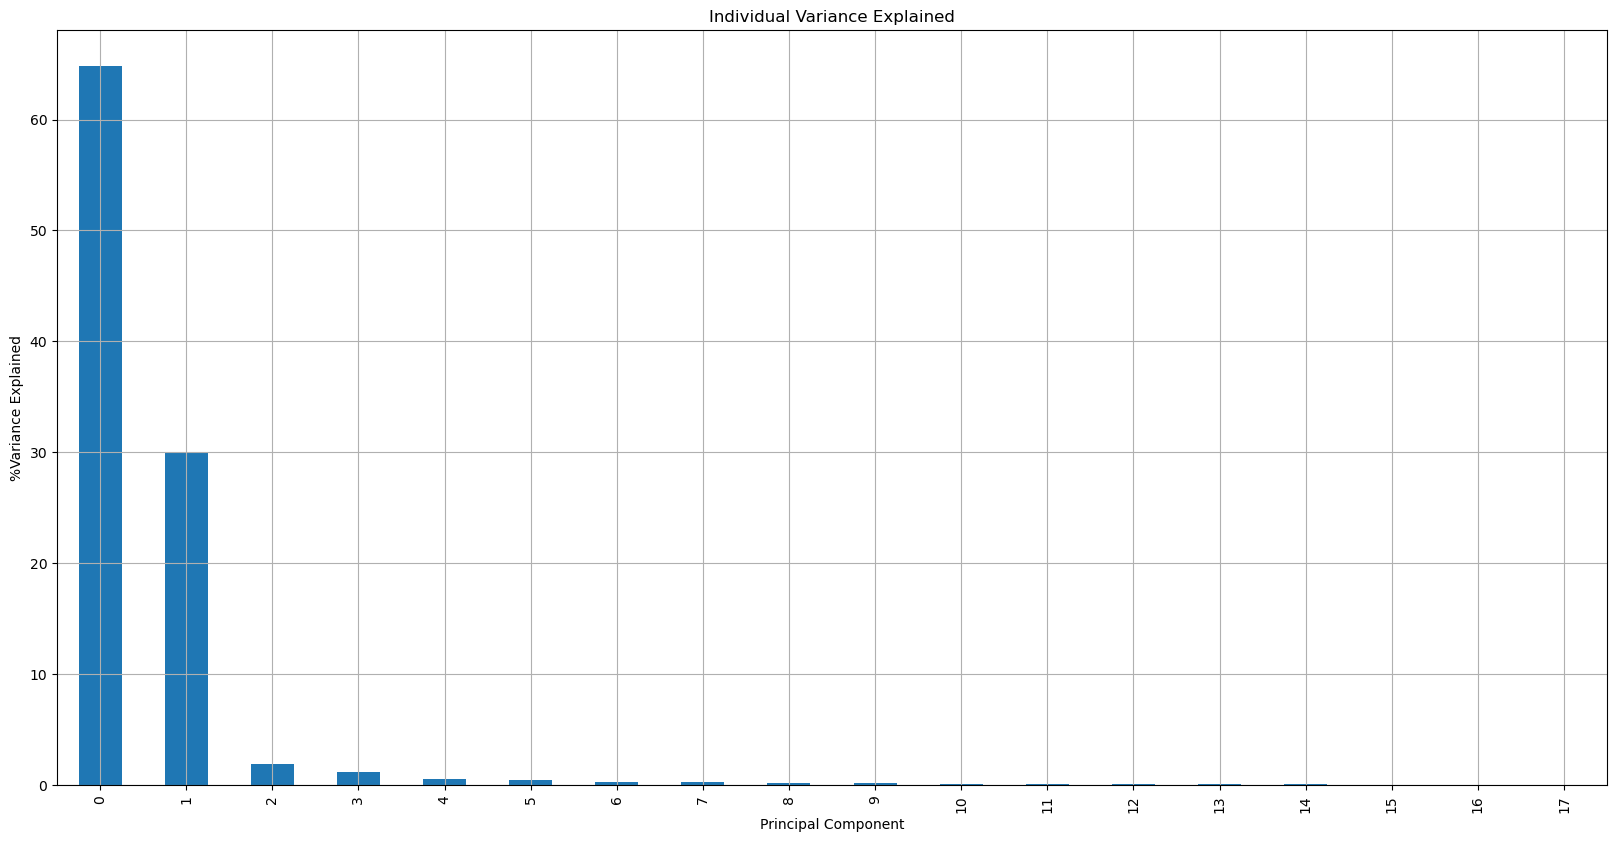

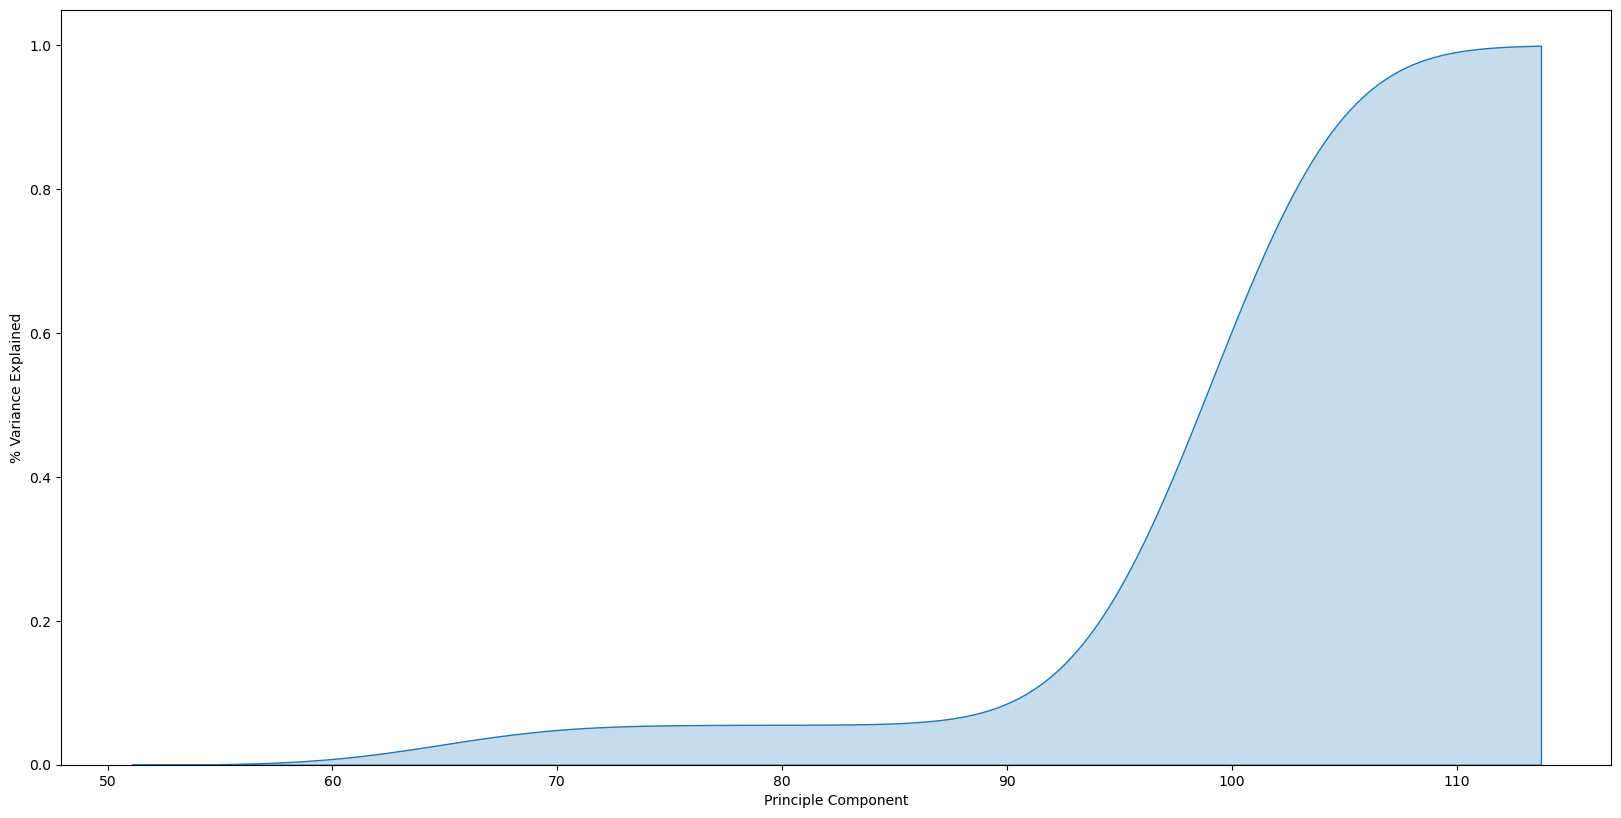

In [ ]:
var_exp=[]
for i in sorted(eig_vals,reverse=True):
    var_exp.append(i/eig_val_tot*100)
cum_var_exp=np.cumsum(var_exp)
var_explained=pd.DataFrame({'Individual Variance Explained':var_exp,'Cumulative Variance Explained':cum_var_exp})
print(var_explained)
var_explained['Individual Variance Explained'].plot(kind='bar',figsize=(20,10),title="Individual Variance Explained",grid=True,xlabel="Principal Component",ylabel="%Variance Explained")
plt.show()
plt.figure(figsize=(20,10),dpi=100)
sns.kdeplot(x=var_explained['Cumulative Variance Explained'],cumulative=True,shade=True)
plt.xlabel("Principle Component")
plt.ylabel("% Variance Explained")
plt.show()

In [ ]:
pca = PCA()
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([6.47680646e-01, 2.99352324e-01, 1.85415820e-02, 1.19106576e-02,
       5.00789238e-03, 4.43669277e-03, 3.26571430e-03, 2.82419148e-03,
       2.02209694e-03, 1.38047318e-03, 8.32150330e-04, 7.05557846e-04,
       5.76817373e-04, 5.40254224e-04, 4.33347362e-04, 3.46526334e-04,
       8.47003212e-05, 5.83751808e-05])

**Model Building after PCA : Decision Tree** 

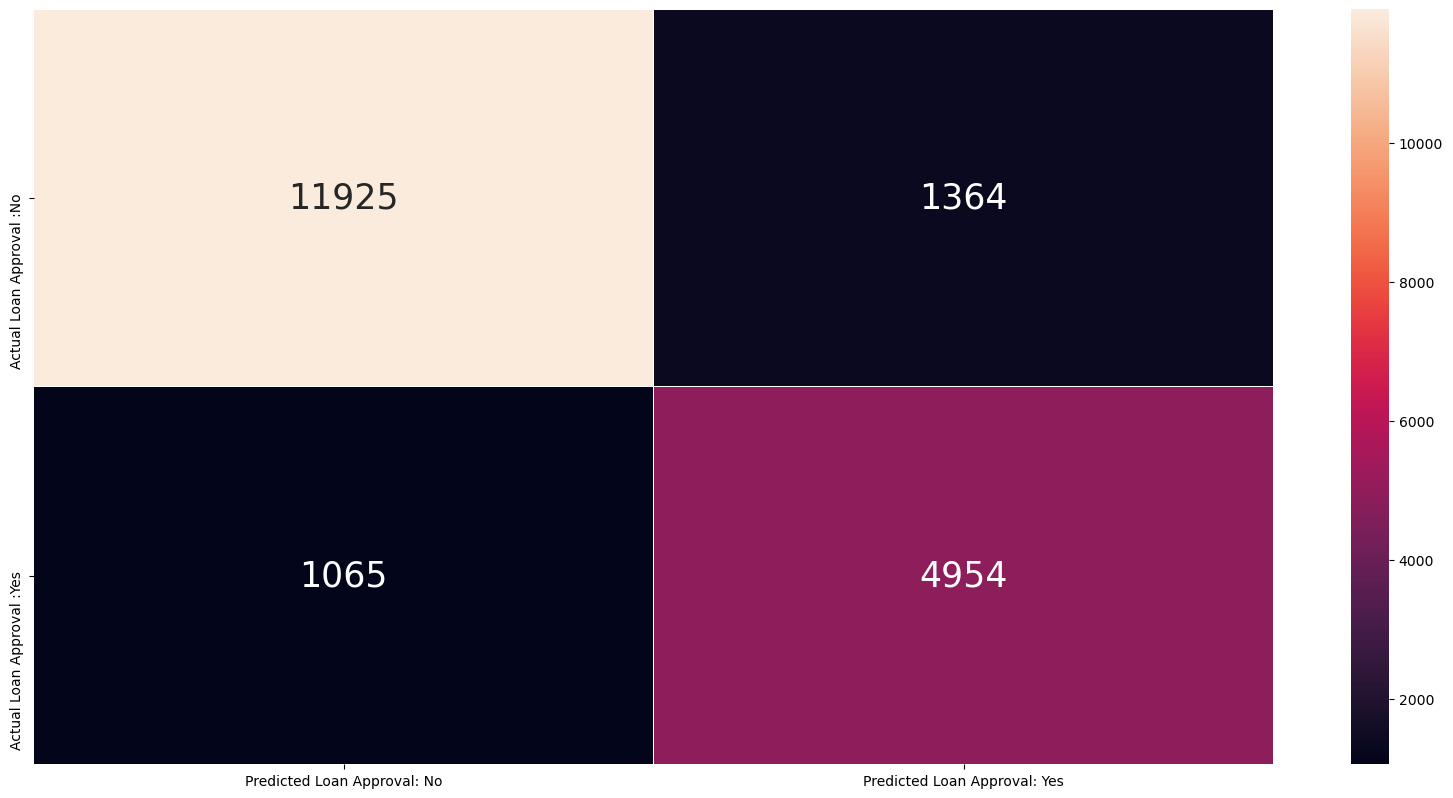

In [ ]:
DT1=tree.DecisionTreeClassifier()
DT1.fit(X_train_2,y_train)
y_pred_2 = DT1.predict(X_test_2)
cm=confusion_matrix(y_test,y_pred_2)
plt.figure(figsize=(20,10),dpi=100)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Loan Approval: No','Predicted Loan Approval: Yes'],index = ['Actual Loan Approval :No','Actual Loan Approval :Yes'])
sns.heatmap(conf_matrix, annot=True, annot_kws = {'size':25}, fmt = 'd',linewidths = 0.3, cbar = True)
plt.savefig("confusion_matrix_Decision_Tree_PCA.png")
plt.show()

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP / (TP+FN)
specificity = TN / (TN+FP)
misclassified=(FP+FN)/(TN+TP+FP+FN)
correct_classified=(TP+TN)/(TN+TP+FP+FN)
print(f"\n\nTrue Positive (TP)={TP}\n\nTrue Negative (TN)={TN}\n\nFalse Positive (FP)={FP}\n\nFalse Negative (FN)={FN}\n\nSensitivity={sensitivity:0.2f}\n\nSpecificity={specificity:0.2f}\n\nMisclassified={misclassified:0.2f}\n\nCorrectly Classified={correct_classified:0.2f}\n\n")



True Positive (TP)=4954

True Negative (TN)=11925

False Positive (FP)=1364

False Negative (FN)=1065

Sensitivity=0.82

Specificity=0.90

Misclassified=0.13

Correctly Classified=0.87




In [ ]:
classification=classification_report(y_test,y_pred_2)
ac = accuracy_score(y_test,y_pred_2)*100
print(f"The Accuracy Score is {ac:0.2f}%\n\nThe classification report is given below\n\n{classification}")

The Accuracy Score is 87.42%

The classification report is given below

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     13289
           1       0.78      0.82      0.80      6019

    accuracy                           0.87     19308
   macro avg       0.85      0.86      0.86     19308
weighted avg       0.88      0.87      0.88     19308



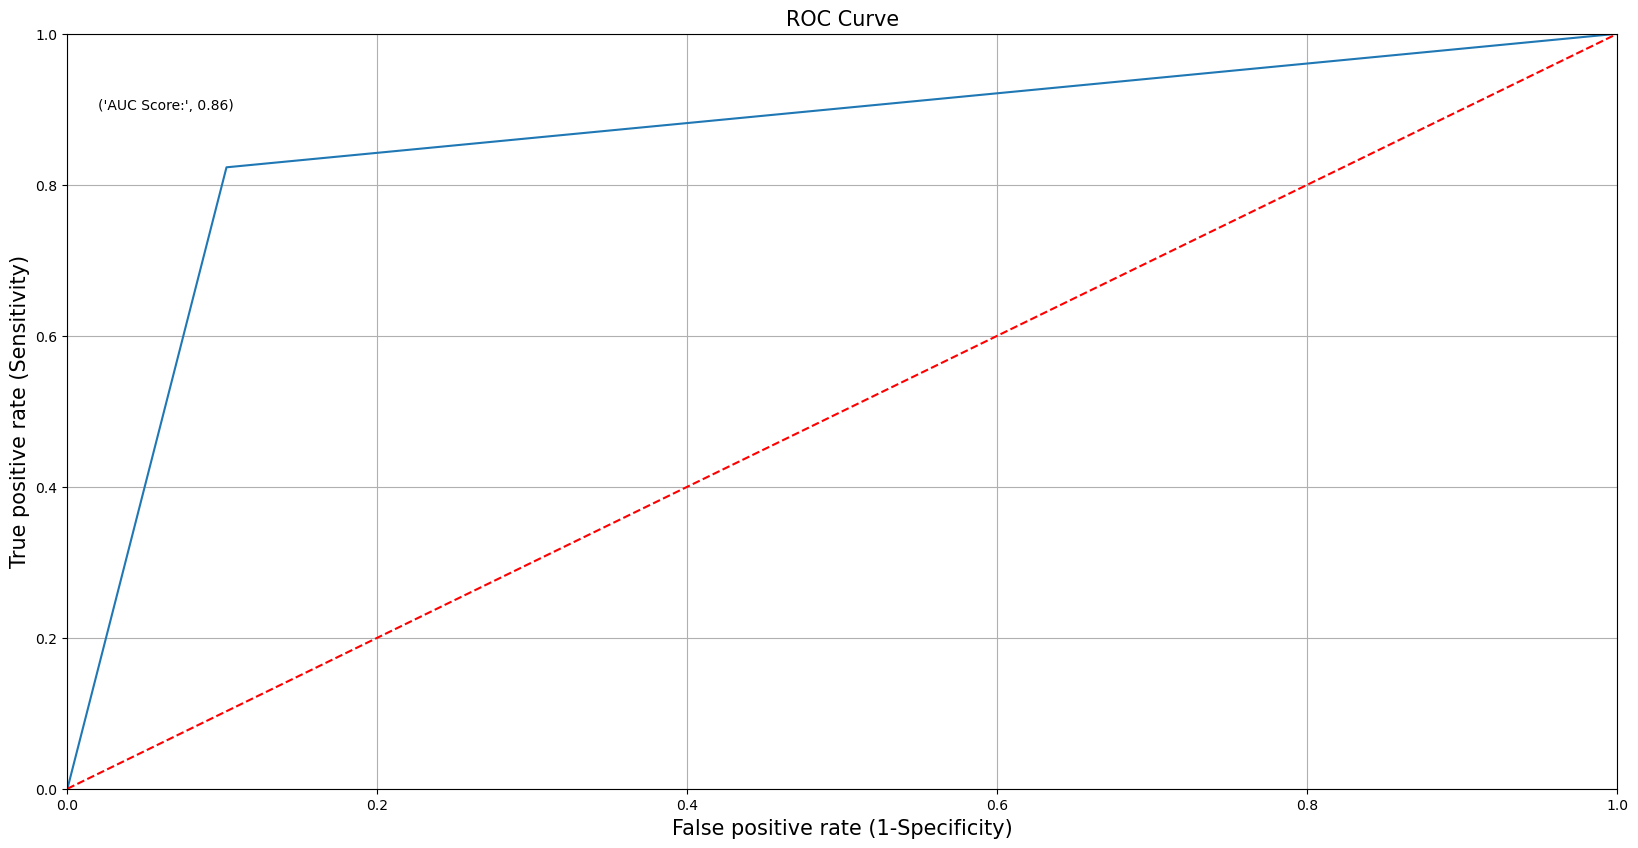

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_2)
plt.figure(figsize=(20,10),dpi=100)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,y_pred_2),3)))
plt.grid(True)
plt.savefig("ROC_AUC_Decision_Tree_PCA.png")
plt.show()

### Using gridsearchcv

In [ ]:
 #create a dictionary of all values we want to test
param_grid = { 'criterion':['gini','entropy'],'max_depth': [4, 5]}
    # decision tree model
dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=5,n_jobs=-1)
    #fit model to data
dtree_gscv.fit(X_train_2, y_train)
print('Best parameters for Extreme Gradient Boositng Classifier: ', dtree_gscv.best_params_, '\n')

y_pred_dt = dtree_gscv.predict(X_test_2)
print(classification_report(y_test, y_pred_dt))

Best parameters for Extreme Gradient Boositng Classifier:  {'criterion': 'gini', 'max_depth': 5} 

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     13289
           1       0.67      0.49      0.57      6019

    accuracy                           0.77     19308
   macro avg       0.73      0.69      0.70     19308
weighted avg       0.75      0.77      0.75     19308



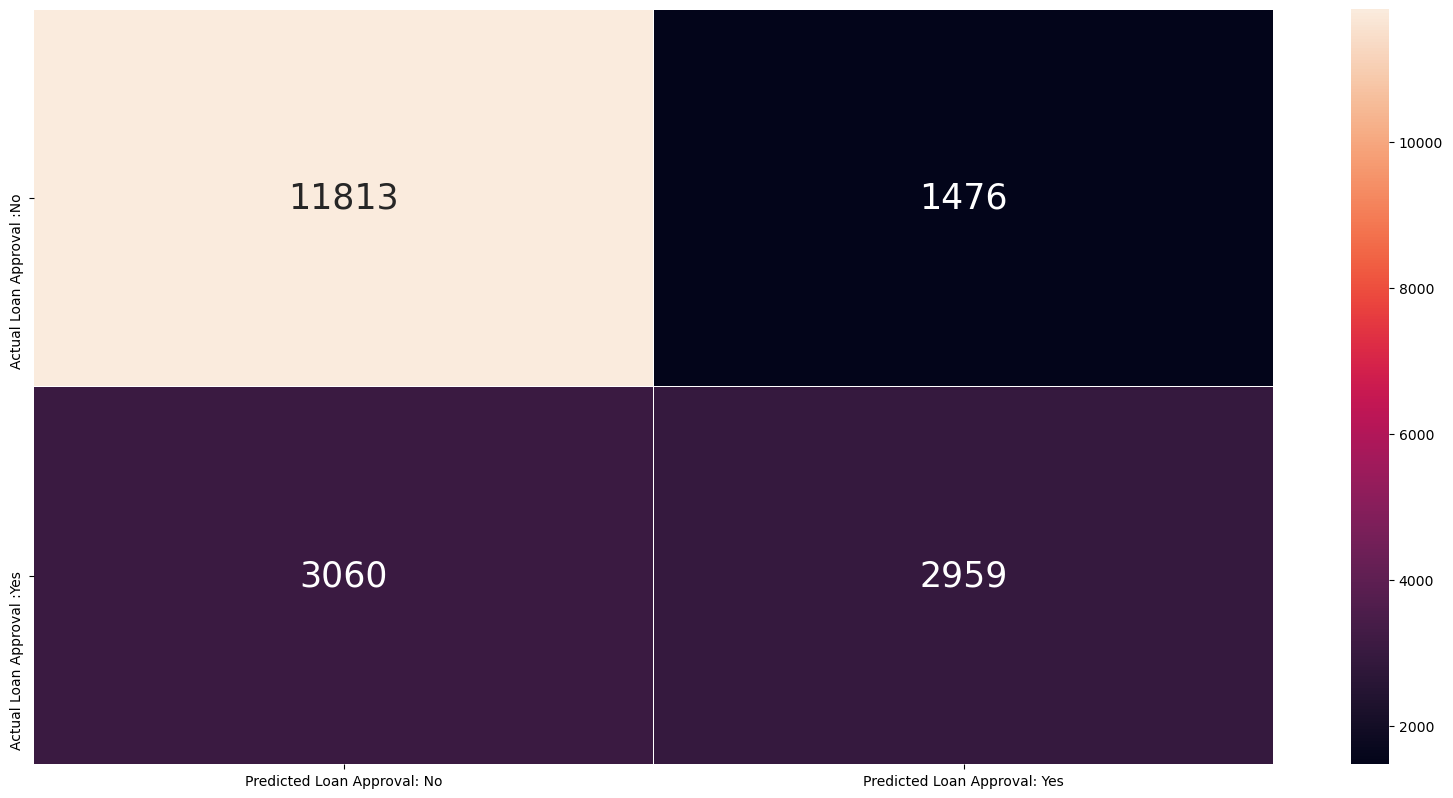

In [ ]:
DT1=tree.DecisionTreeClassifier(criterion='gini',max_depth=5)
DT1.fit(X_train_2,y_train)
y_pred_2 = DT1.predict(X_test_2)
cm=confusion_matrix(y_test,y_pred_2)
plt.figure(figsize=(20,10),dpi=100)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Loan Approval: No','Predicted Loan Approval: Yes'],index = ['Actual Loan Approval :No','Actual Loan Approval :Yes'])
sns.heatmap(conf_matrix, annot=True, annot_kws = {'size':25}, fmt = 'd',linewidths = 0.3, cbar = True)
plt.savefig("confusion_matrix_Decision_Tree_gscv.png")
plt.show()

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP / (TP+FN)
specificity = TN / (TN+FP)
misclassified=(FP+FN)/(TN+TP+FP+FN)
correct_classified=(TP+TN)/(TN+TP+FP+FN)
print(f"\n\nTrue Positive (TP)={TP}\n\nTrue Negative (TN)={TN}\n\nFalse Positive (FP)={FP}\n\nFalse Negative (FN)={FN}\n\nSensitivity={sensitivity:0.2f}\n\nSpecificity={specificity:0.2f}\n\nMisclassified={misclassified:0.2f}\n\nCorrectly Classified={correct_classified:0.2f}\n\n")



True Positive (TP)=2959

True Negative (TN)=11813

False Positive (FP)=1476

False Negative (FN)=3060

Sensitivity=0.49

Specificity=0.89

Misclassified=0.23

Correctly Classified=0.77




In [ ]:
classification=classification_report(y_test,y_pred_2)
ac = accuracy_score(y_test,y_pred_2)*100
print(f"The Accuracy Score is {ac:0.2f}%\n\nThe classification report is given below\n\n{classification}")

The Accuracy Score is 76.51%

The classification report is given below

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     13289
           1       0.67      0.49      0.57      6019

    accuracy                           0.77     19308
   macro avg       0.73      0.69      0.70     19308
weighted avg       0.75      0.77      0.75     19308



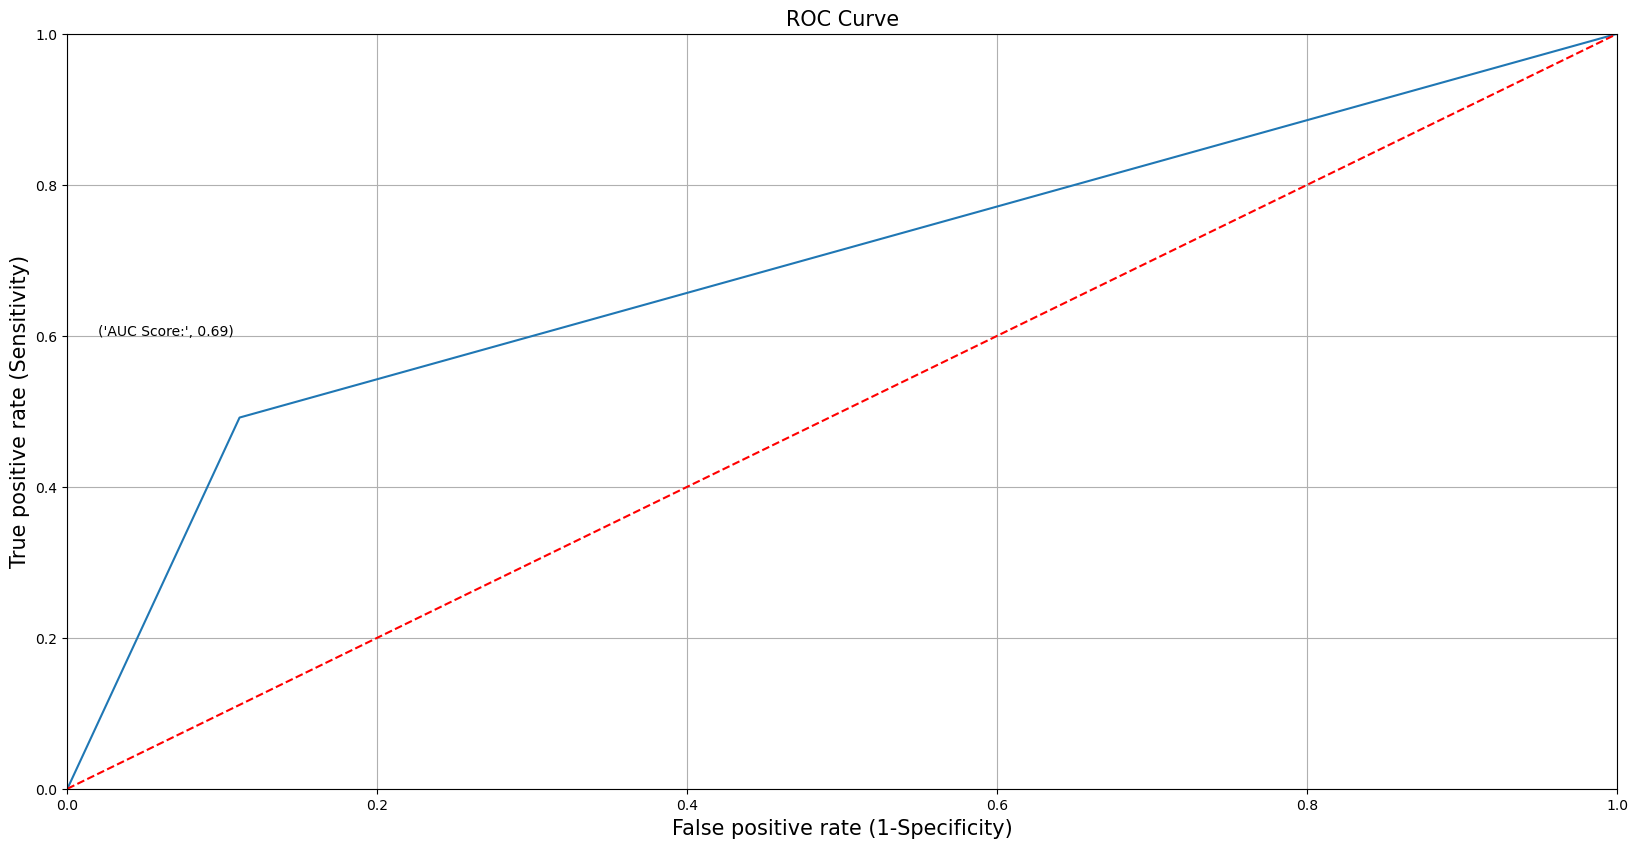

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_2)
plt.figure(figsize=(20,10),dpi=100)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.6, s = ('AUC Score:',round(roc_auc_score(y_test,y_pred_2),3)))
plt.grid(True)
plt.savefig("ROC_AUC_Decision_Tree_gscv.png")
plt.show()

**Model Building after PCA : Random Forest** 

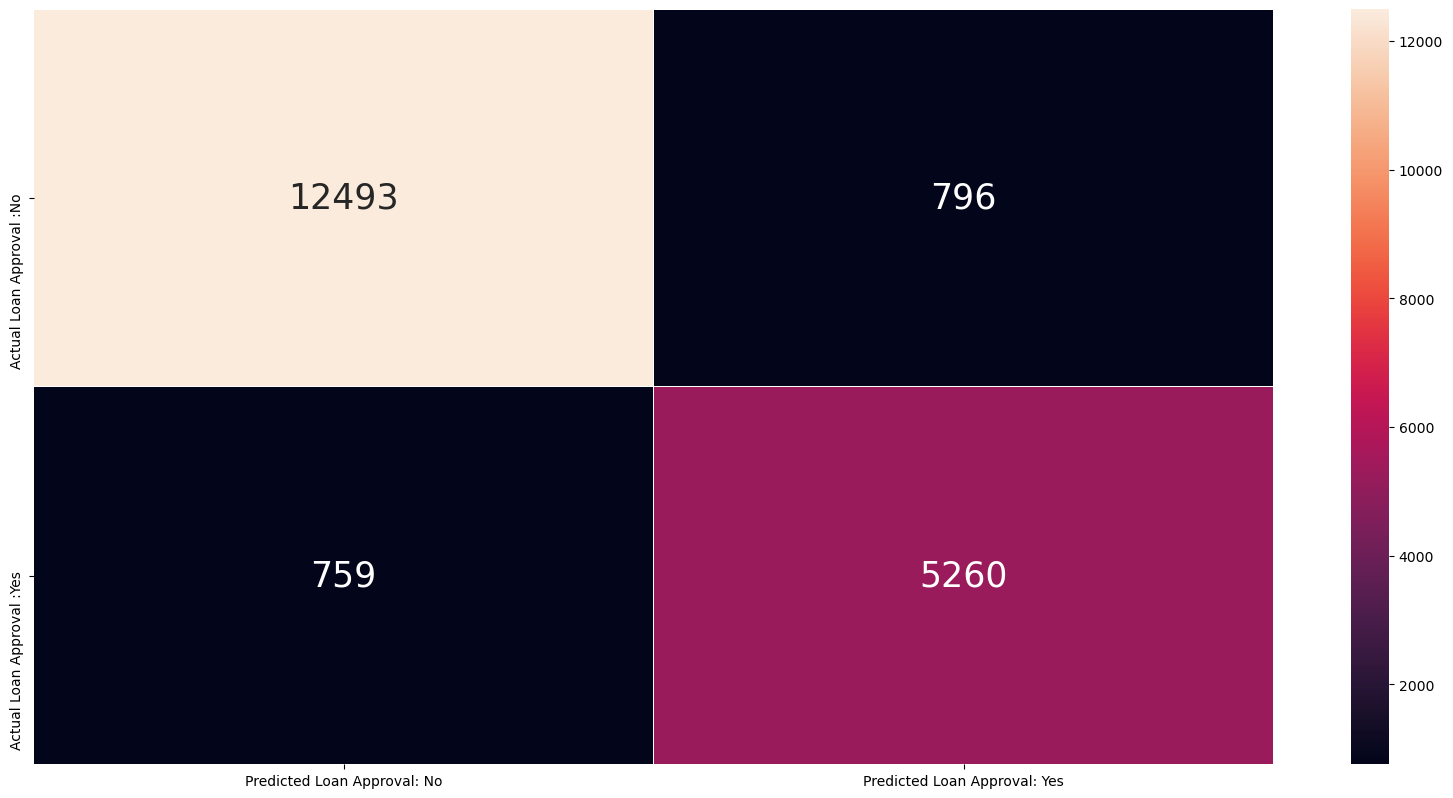

In [ ]:
RF1=RandomForestClassifier()
RF1.fit(X_train_2,y_train)
y_pred_2 = RF1.predict(X_test_2)
cm=confusion_matrix(y_test,y_pred_2)
plt.figure(figsize=(20,10),dpi=100)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Loan Approval: No','Predicted Loan Approval: Yes'],index = ['Actual Loan Approval :No','Actual Loan Approval :Yes'])
sns.heatmap(conf_matrix, annot=True, annot_kws = {'size':25}, fmt = 'd',linewidths = 0.3, cbar = True)
plt.savefig("confusion_matrix_Random_forest_PCA.png")
plt.show()

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP / (TP+FN)
specificity = TN / (TN+FP)
misclassified=(FP+FN)/(TN+TP+FP+FN)
correct_classified=(TP+TN)/(TN+TP+FP+FN)
print(f"\n\nTrue Positive (TP)={TP}\n\nTrue Negative (TN)={TN}\n\nFalse Positive (FP)={FP}\n\nFalse Negative (FN)={FN}\n\nSensitivity={sensitivity:0.2f}\n\nSpecificity={specificity:0.2f}\n\nMisclassified={misclassified:0.2f}\n\nCorrectly Classified={correct_classified:0.2f}\n\n")



True Positive (TP)=5260

True Negative (TN)=12493

False Positive (FP)=796

False Negative (FN)=759

Sensitivity=0.87

Specificity=0.94

Misclassified=0.08

Correctly Classified=0.92




In [ ]:
classification=classification_report(y_test,y_pred_2)
ac = accuracy_score(y_test,y_pred_2)*100
print(f"The Accuracy Score is {ac:0.2f}%\n\nThe classification report is given below\n\n{classification}")

The Accuracy Score is 91.95%

The classification report is given below

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     13289
           1       0.87      0.87      0.87      6019

    accuracy                           0.92     19308
   macro avg       0.91      0.91      0.91     19308
weighted avg       0.92      0.92      0.92     19308



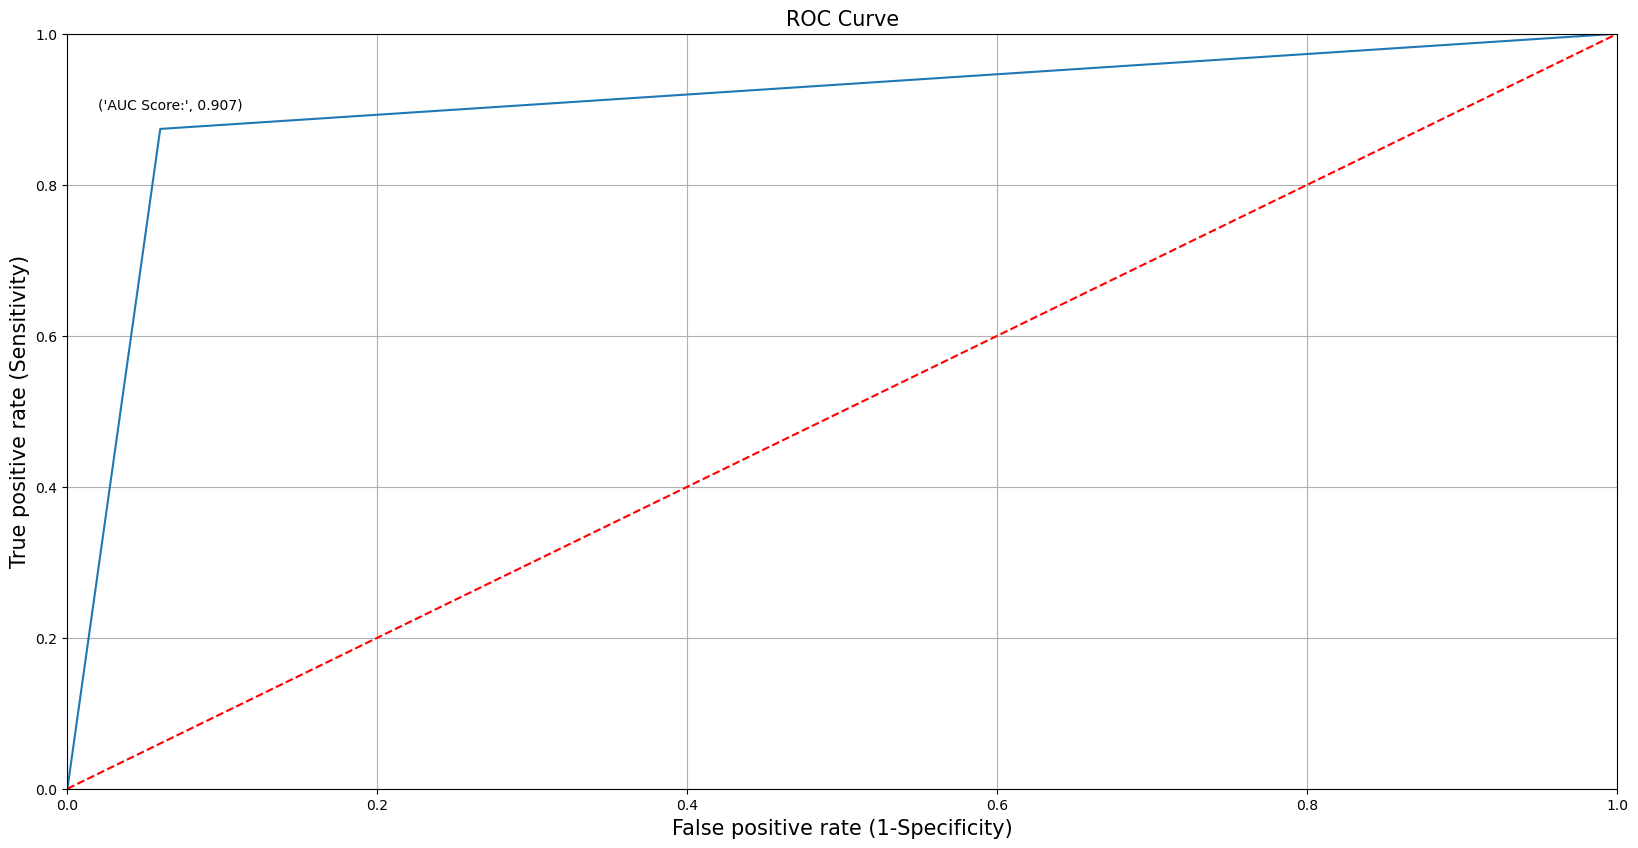

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_2)
plt.figure(figsize=(20,10),dpi=100)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,y_pred_2),3)))
plt.grid(True)
plt.savefig("ROC_AUC_Random_Forest_PCA.png")
plt.show()

### Using gridsearchcv

In [ ]:
param_grid = { 'criterion':['gini','entropy'],'max_depth': [4, 5]}
    # decision tree model
rt_model=RandomForestClassifier()
    #use gridsearch to test all values
rt_gscv = GridSearchCV(rt_model, param_grid, cv=5,n_jobs=-1)
    #fit model to data
rt_gscv.fit(X_train_2, y_train)
print('Best parameters for Extreme Gradient Boositng Classifier: ', rt_gscv.best_params_, '\n')

y_pred_rt = rt_gscv.predict(X_test_2)
print(classification_report(y_test, y_pred_rt))

Best parameters for Extreme Gradient Boositng Classifier:  {'criterion': 'gini', 'max_depth': 5} 

              precision    recall  f1-score   support

           0       0.78      0.97      0.86     13289
           1       0.84      0.39      0.53      6019

    accuracy                           0.79     19308
   macro avg       0.81      0.68      0.70     19308
weighted avg       0.80      0.79      0.76     19308



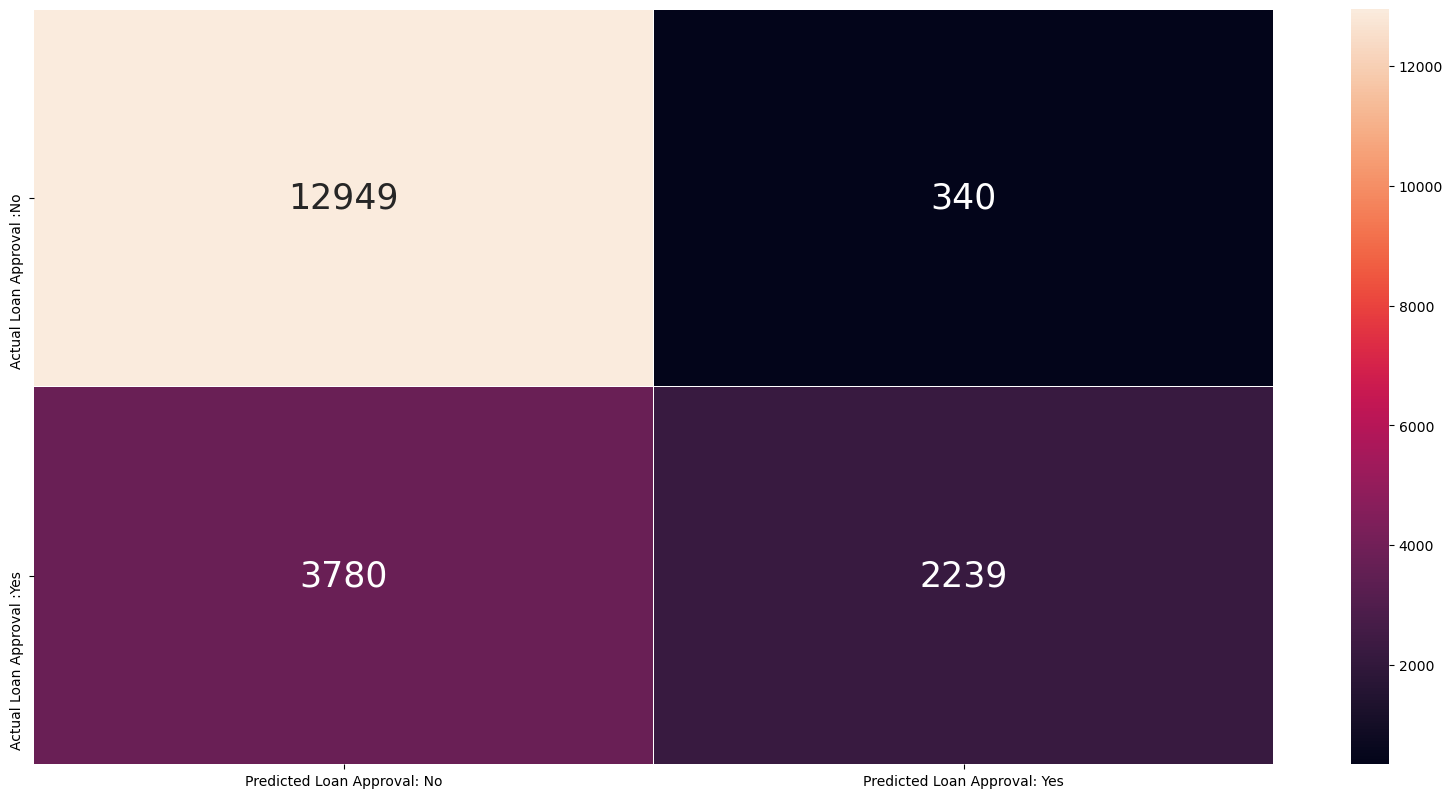

In [ ]:
RF1=RandomForestClassifier(criterion='gini',max_depth=5)
RF1.fit(X_train_2,y_train)
y_pred_2 = RF1.predict(X_test_2)
cm=confusion_matrix(y_test,y_pred_2)
plt.figure(figsize=(20,10),dpi=100)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Loan Approval: No','Predicted Loan Approval: Yes'],index = ['Actual Loan Approval :No','Actual Loan Approval :Yes'])
sns.heatmap(conf_matrix, annot=True, annot_kws = {'size':25}, fmt = 'd',linewidths = 0.3, cbar = True)
plt.savefig("confusion_matrix_Random_forest_gscv.png")
plt.show()

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP / (TP+FN)
specificity = TN / (TN+FP)
misclassified=(FP+FN)/(TN+TP+FP+FN)
correct_classified=(TP+TN)/(TN+TP+FP+FN)
print(f"\n\nTrue Positive (TP)={TP}\n\nTrue Negative (TN)={TN}\n\nFalse Positive (FP)={FP}\n\nFalse Negative (FN)={FN}\n\nSensitivity={sensitivity:0.2f}\n\nSpecificity={specificity:0.2f}\n\nMisclassified={misclassified:0.2f}\n\nCorrectly Classified={correct_classified:0.2f}\n\n")



True Positive (TP)=2239

True Negative (TN)=12949

False Positive (FP)=340

False Negative (FN)=3780

Sensitivity=0.37

Specificity=0.97

Misclassified=0.21

Correctly Classified=0.79




In [ ]:
classification=classification_report(y_test,y_pred_2)
ac = accuracy_score(y_test,y_pred_2)*100
print(f"The Accuracy Score is {ac:0.2f}%\n\nThe classification report is given below\n\n{classification}")

The Accuracy Score is 78.66%

The classification report is given below

              precision    recall  f1-score   support

           0       0.77      0.97      0.86     13289
           1       0.87      0.37      0.52      6019

    accuracy                           0.79     19308
   macro avg       0.82      0.67      0.69     19308
weighted avg       0.80      0.79      0.76     19308



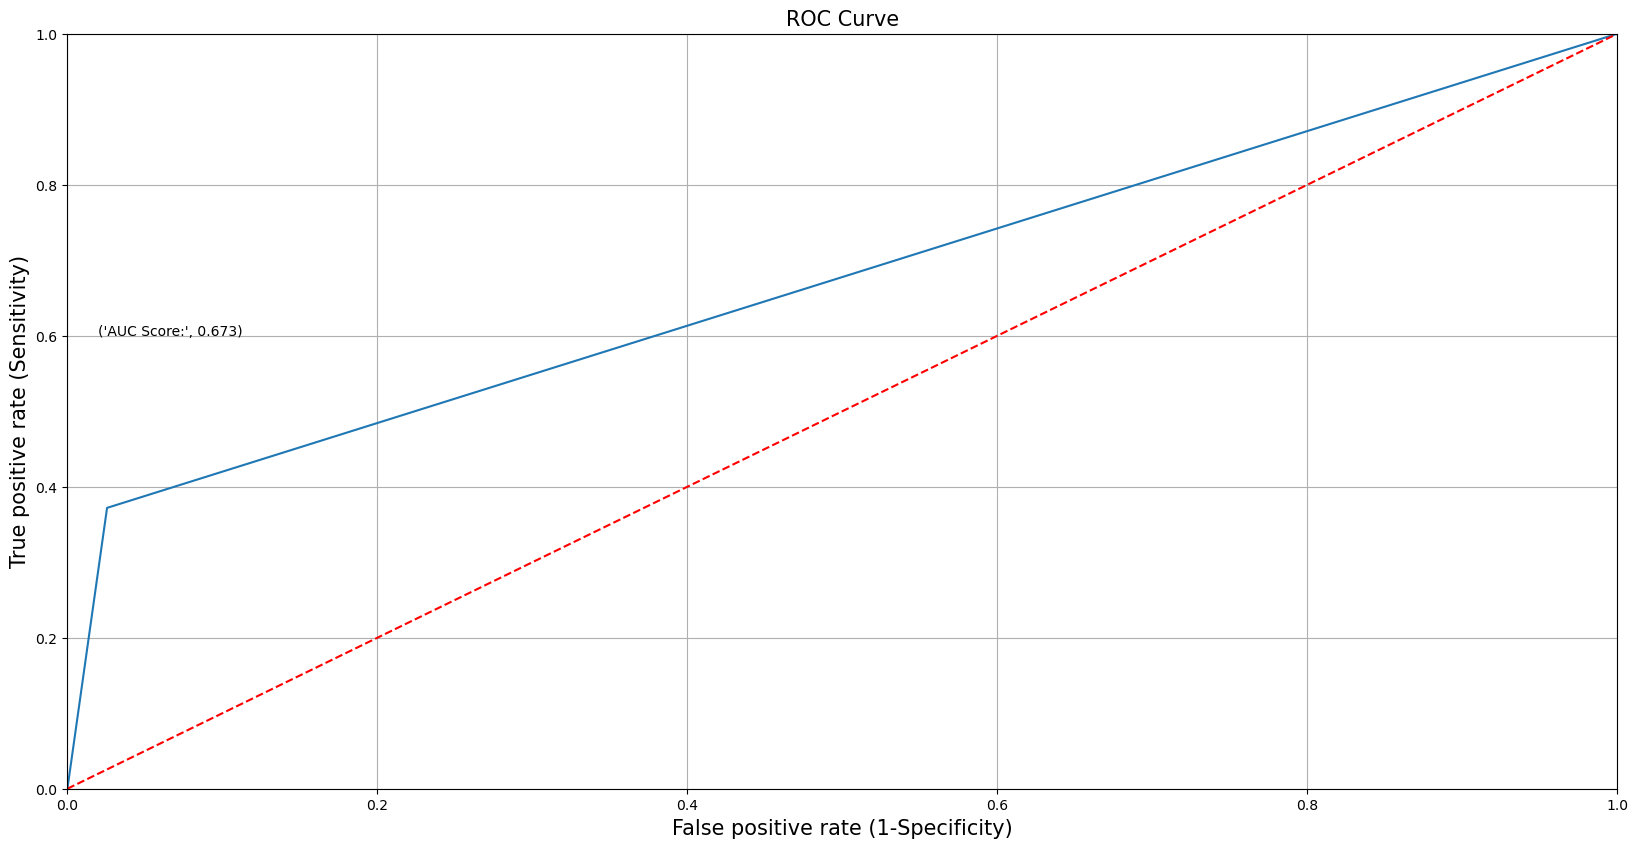

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_2)
plt.figure(figsize=(20,10),dpi=100)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.6, s = ('AUC Score:',round(roc_auc_score(y_test,y_pred_2),3)))
plt.grid(True)
plt.savefig("ROC_AUC_Random_Forest_gscv.png")
plt.show()

### XGBoost_PCA

[21:28:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


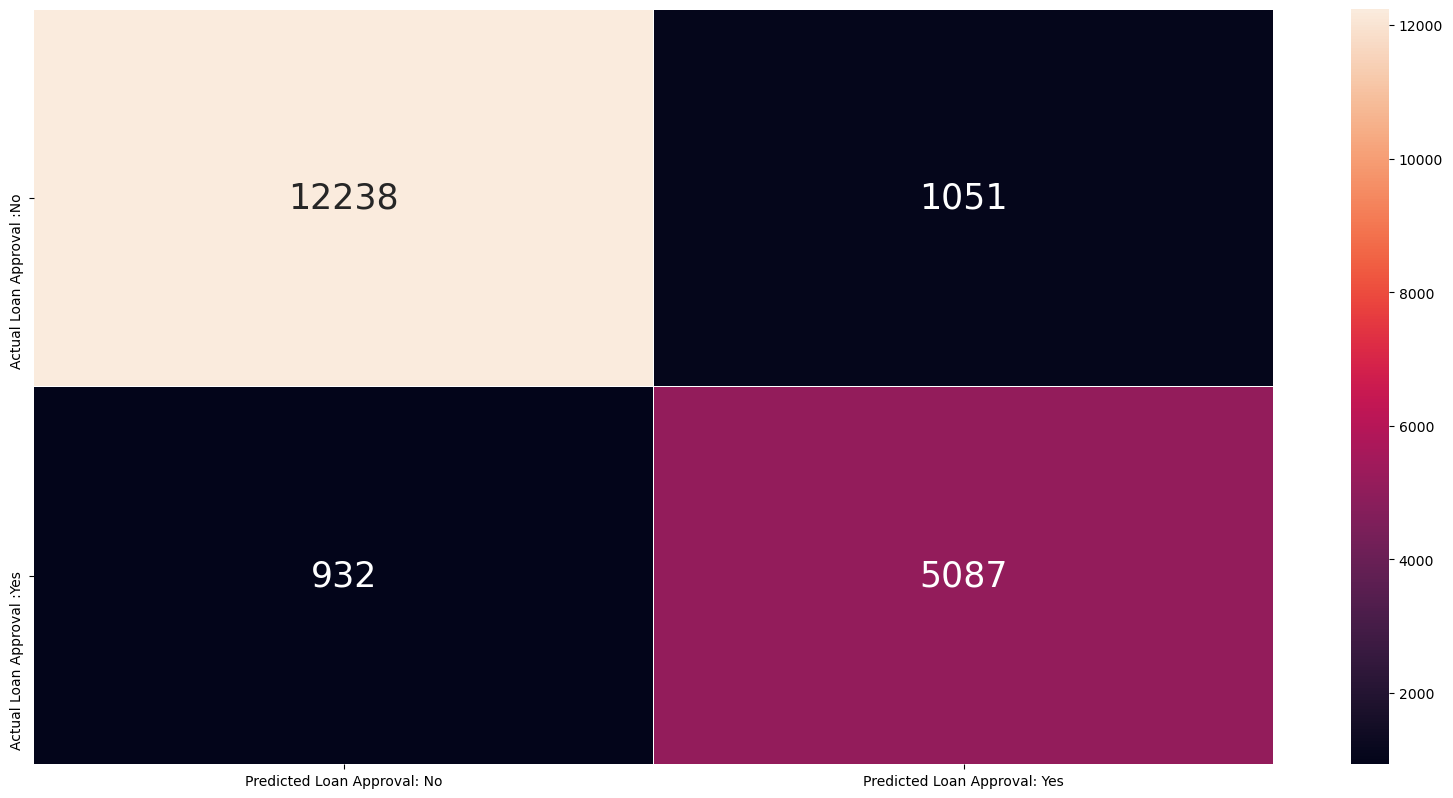

In [ ]:

xgb_model=XGBClassifier(learning_rate=0.1,gamma=1)
xgb_model.fit(X_train_2,y_train)
y_pred_xgb=xgb_model.predict(X_test_2)
cm=confusion_matrix(y_test,y_pred_xgb)

plt.figure(figsize=(20,10),dpi=100)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Loan Approval: No','Predicted Loan Approval: Yes'],index = ['Actual Loan Approval :No','Actual Loan Approval :Yes'])
sns.heatmap(conf_matrix, annot=True, annot_kws = {'size':25}, fmt = 'd',linewidths = 0.3, cbar = True)
plt.savefig("confusion_matrix_XGboost_PCA.png")
plt.show()


In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP / (TP+FN)
specificity = TN / (TN+FP)
misclassified=(FP+FN)/(TN+TP+FP+FN)
correct_classified=(TP+TN)/(TN+TP+FP+FN)
print(f"\n\nTrue Positive (TP)={TP}\n\nTrue Negative (TN)={TN}\n\nFalse Positive (FP)={FP}\n\nFalse Negative (FN)={FN}\n\nSensitivity={sensitivity:0.2f}\n\nSpecificity={specificity:0.2f}\n\nMisclassified={misclassified:0.2f}\n\nCorrectly Classified={correct_classified:0.2f}\n\n")



True Positive (TP)=5087

True Negative (TN)=12238

False Positive (FP)=1051

False Negative (FN)=932

Sensitivity=0.85

Specificity=0.92

Misclassified=0.10

Correctly Classified=0.90




In [ ]:
classification=classification_report(y_test,y_pred_xgb)
ac = accuracy_score(y_test,y_pred_xgb)*100
print(f"The Accuracy Score is {ac:0.2f}%\n\nThe classification report is given below\n\n{classification}")

The Accuracy Score is 89.73%

The classification report is given below

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     13289
           1       0.83      0.85      0.84      6019

    accuracy                           0.90     19308
   macro avg       0.88      0.88      0.88     19308
weighted avg       0.90      0.90      0.90     19308



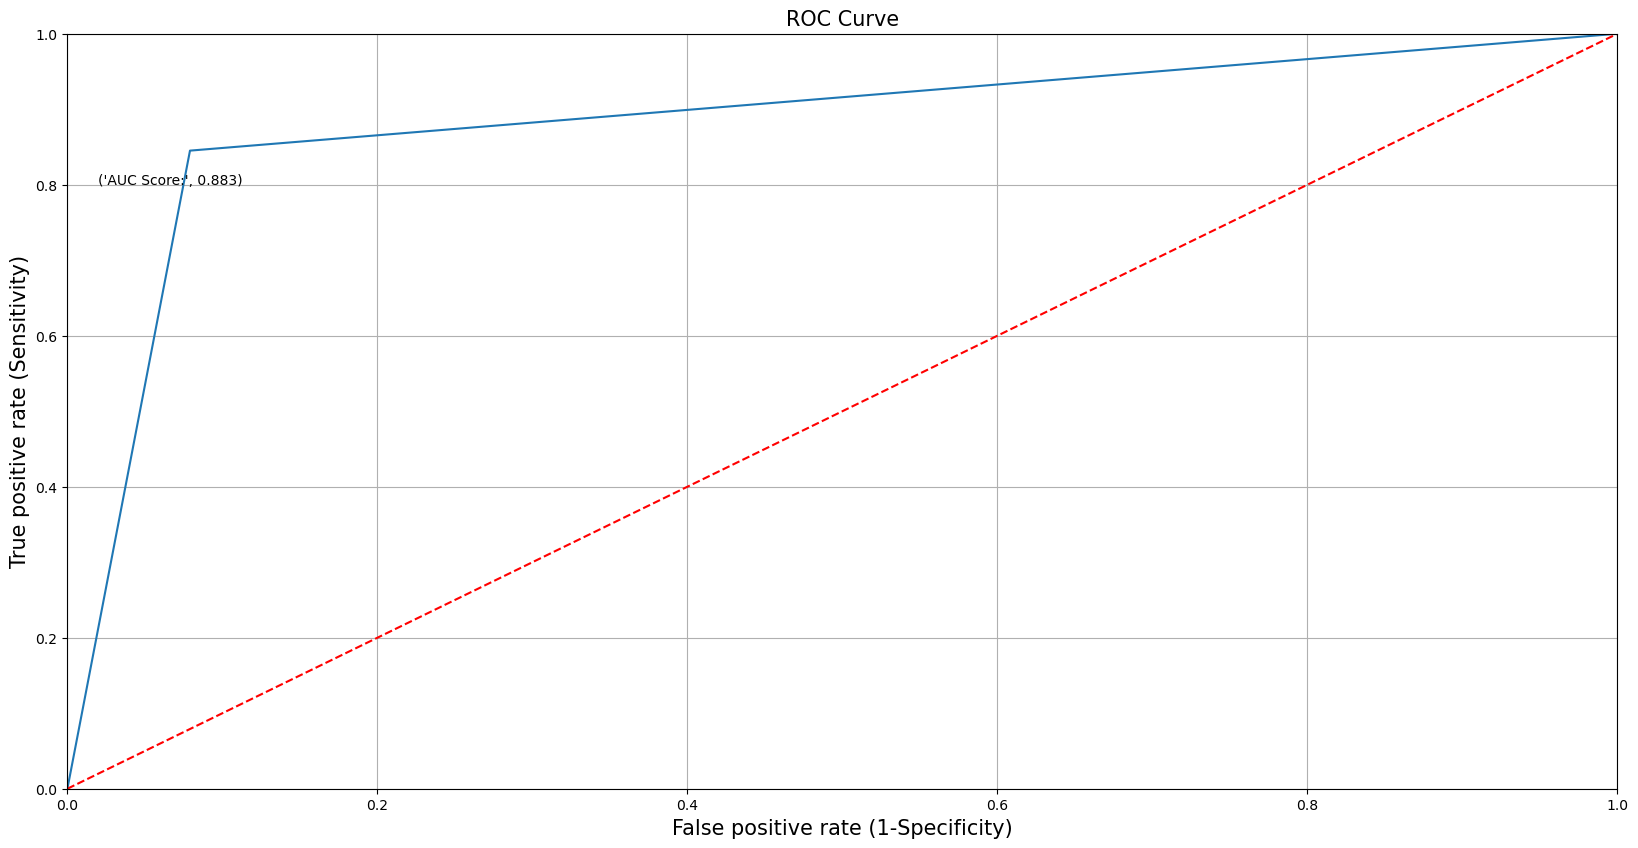

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_xgb)
plt.figure(figsize=(20,10),dpi=100)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(roc_auc_score(y_test,y_pred_xgb),3)))
plt.grid(True)
plt.savefig("ROC_AUC_Xgboost_PCA.png")
plt.show()

Using gridsearchcv

In [ ]:
tuned_paramaters = [{'n_estimators': [100, 120],
                     'learning_rate': [0.1], 
                     'gamma': [2, 5],
                     'max_depth': [4, 5]}]
xgb_model = XGBClassifier(random_state = 8, n_jobs=-1)
xgb_grid = GridSearchCV(estimator = xgb_model, 
                         param_grid = tuned_paramaters, 
                         cv = 5, 
                         n_jobs=-1)
xgb_grid.fit(X_train_2, y_train)
print('Best parameters for Extreme Gradient Boositng Classifier: ', xgb_grid.best_params_, '\n')

y_pred_xgb1 = xgb_grid.predict(X_test_2)
print(classification_report(y_test, y_pred_xgb1))

[21:40:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters for Extreme Gradient Boositng Classifier:  {'gamma': 2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 120} 

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     13289
           1       0.82      0.82      0.82      6019

    accuracy                           0.89     19308
   macro avg       0.87      0.87      0.87     19308
weighted avg       0.89      0.89      0.89     19308



[21:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


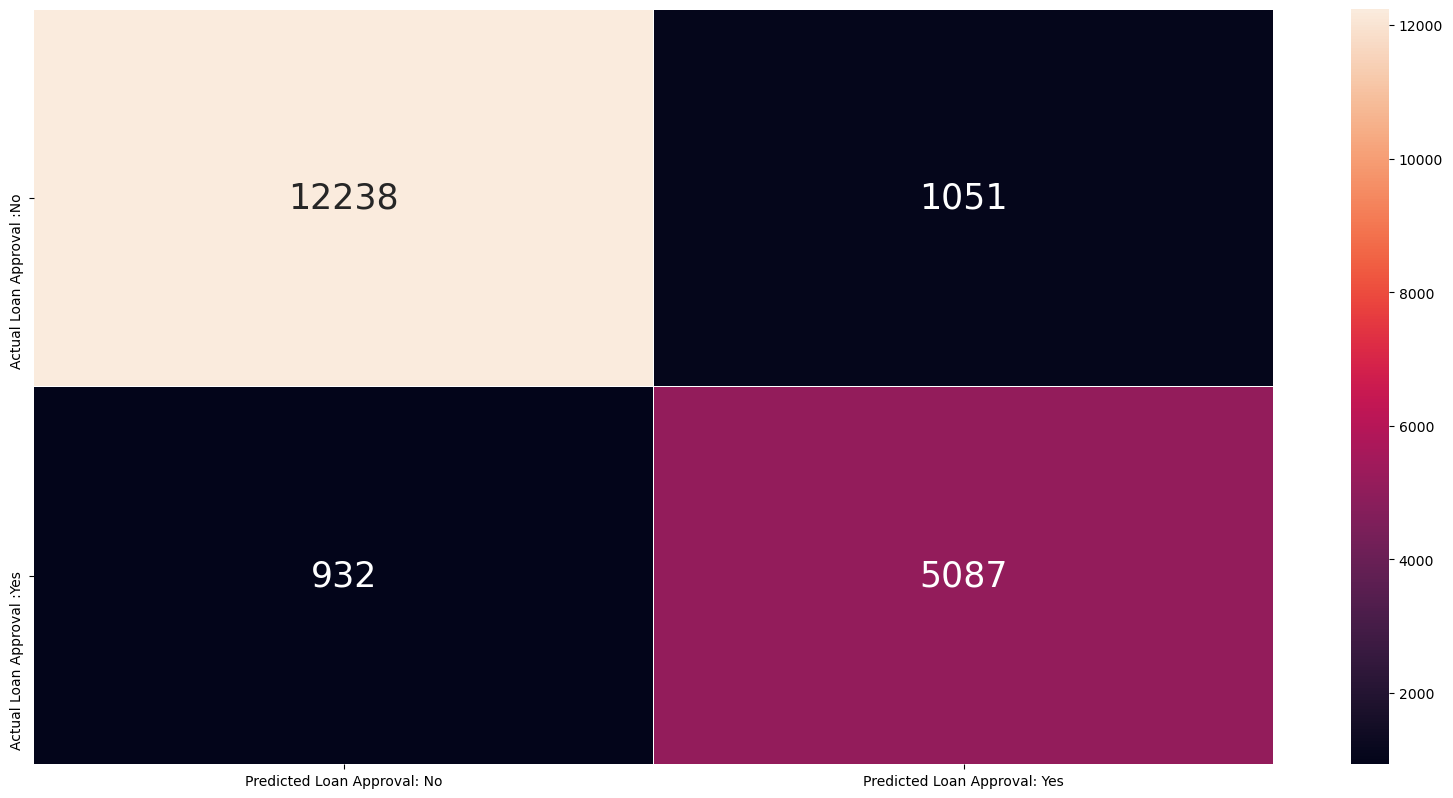

In [ ]:

xgb_model=XGBClassifier(learning_rate=0.1,gamma=1)
xgb_model.fit(X_train_2,y_train)
y_pred_xgb=xgb_model.predict(X_test_2)
cm=confusion_matrix(y_test,y_pred_xgb)

plt.figure(figsize=(20,10),dpi=100)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Loan Approval: No','Predicted Loan Approval: Yes'],index = ['Actual Loan Approval :No','Actual Loan Approval :Yes'])
sns.heatmap(conf_matrix, annot=True, annot_kws = {'size':25}, fmt = 'd',linewidths = 0.3, cbar = True)
plt.savefig("confusion_matrix_XGboost_gscv.png")
plt.show()


In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
sensitivity = TP / (TP+FN)
specificity = TN / (TN+FP)
misclassified=(FP+FN)/(TN+TP+FP+FN)
correct_classified=(TP+TN)/(TN+TP+FP+FN)
print(f"\n\nTrue Positive (TP)={TP}\n\nTrue Negative (TN)={TN}\n\nFalse Positive (FP)={FP}\n\nFalse Negative (FN)={FN}\n\nSensitivity={sensitivity:0.2f}\n\nSpecificity={specificity:0.2f}\n\nMisclassified={misclassified:0.2f}\n\nCorrectly Classified={correct_classified:0.2f}\n\n")



True Positive (TP)=5087

True Negative (TN)=12238

False Positive (FP)=1051

False Negative (FN)=932

Sensitivity=0.85

Specificity=0.92

Misclassified=0.10

Correctly Classified=0.90




In [ ]:
classification=classification_report(y_test,y_pred_xgb)
ac = accuracy_score(y_test,y_pred_xgb)*100
print(f"The Accuracy Score is {ac:0.2f}%\n\nThe classification report is given below\n\n{classification}")

The Accuracy Score is 89.73%

The classification report is given below

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     13289
           1       0.83      0.85      0.84      6019

    accuracy                           0.90     19308
   macro avg       0.88      0.88      0.88     19308
weighted avg       0.90      0.90      0.90     19308



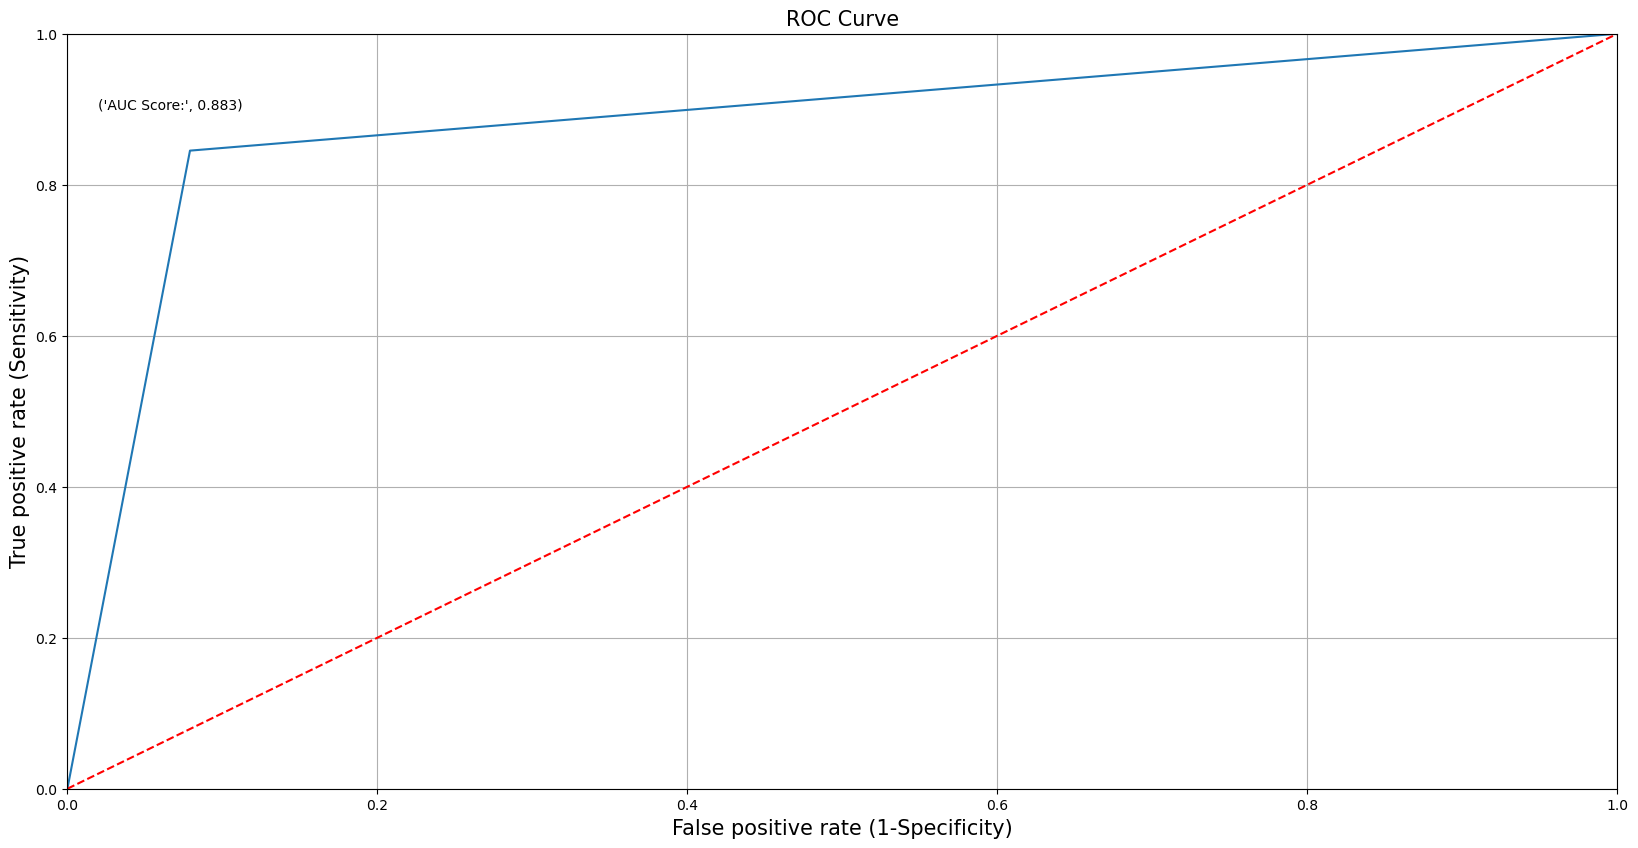

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
cm = confusion_matrix(y_test, y_pred_xgb)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Wheat Seed: No','Predicted Wheat Seed: Yes'],index = ['Actual Wheat Seed :No','Actual Wheat Seed :Yes'])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,  y_pred_xgb),3)))
plt.grid(True)
plt.savefig('ROC_AUC_XGBoost_gscv.png')
plt.show()